# Loading of libraries

In [1]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use
pd.set_option('display.max_colwidth', 100)
import chord as cho
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick

In [2]:
import os
os.getcwd()

'C:\\Users\\g\\Documents\\Jupyter\\Projekt'

In [3]:
os.chdir('c:\\Users\\g\\Documents\\Jupyter\\Projekt')

In [4]:
os.getcwd()

'C:\\Users\\g\\Documents\\Jupyter\\Projekt'

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

"""
Computes MAPE
"""
def mean_absolute_percentage_error(y_true: np.array, y_pred: np.array) -> float:
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

"""
Computes SMAPE
"""
def symetric_mean_absolute_percentage_error(y_true: np.array, y_pred: np.array) -> float:
    return np.mean(np.abs((y_pred - y_true) / ((np.abs(y_true) + np.abs(y_pred))/2.0))) * 100

def weighted_mean_absolute_percentage_error(y_true: np.array, y_pred: np.array) -> float:
    return (np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true))) * 100

def compute_metrics(df: pd.DataFrame) -> pd.DataFrame:
    y_true, y_pred = df['y_true'].values, df['y_pred'].values
    return compute_metrics_raw(y_true, y_pred)

def compute_metrics_raw(y_true: pd.Series, y_pred: pd.Series) -> pd.DataFrame:
    mae, mse, mape, smape, r2, wape = mean_absolute_error(y_true=y_true, y_pred=y_pred), mean_squared_error(y_true=y_true, y_pred=y_pred), mean_absolute_percentage_error(y_true=y_true, y_pred=y_pred), symetric_mean_absolute_percentage_error(y_true=y_true, y_pred=y_pred), r2_score(y_true=y_true, y_pred=y_pred), weighted_mean_absolute_percentage_error(y_true=y_true,y_pred=y_pred)
    return pd.DataFrame.from_records([{'MAE': mae, 'MSE': mse, 'MAPE': mape, 'SMAPE': smape, 'R2': r2, 'WAPE': wape}], index=[0])


In [6]:
from sklearn.model_selection import KFold, train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


In [7]:
from tqdm.notebook import trange, tqdm
from datetime import datetime

In [8]:
import os
os.getcwd()


'C:\\Users\\g\\Documents\\Jupyter\\Projekt'

In [9]:
pd.set_option('max_columns', None)

# Loading a file

In [10]:
df = pd.read_csv('plaques.csv', sep=',', decimal='.')

In [11]:
df

ID  plaque_left_2015  plaque_right_2015  plaque_left_2018  \
0        2               3.3                3.0               3.5   
1        3               2.5                4.8               2.7   
2        4               3.6                1.8               3.3   
3        5               1.9                2.0               2.0   
4        6               3.6                3.1               3.6   
...    ...               ...                ...               ...   
1170  1645               2.0                2.1               2.1   
1171  1646               2.4                1.8               2.4   
1172  1647               2.1                1.8               2.3   
1173  1655               2.5                2.4               2.6   
1174  1656               2.8                3.9               2.7   

      plaque_right_2018  year_of_birth  age  sex  weight  height  \
0                   3.1           1940   75    0      87     170   
1                   4.3           1955   60    1      92     170   
2                   2.0           1949   66    1      84     168   
3                   1.9           1958   57    0     119     168   
4                   3.1           1971   44    1     105     180   
...                 ...            ...  ...  ...     ...     ...   
1170                2.2           1947   68    0     100     170   
1171                1.8           1947   68    0      78     155   
1172                1.8           1962   53    0      68     154   
1173                2.5           1940   75    0      77     160   
1174                3.9           1935   80    1      76     175   

      high_blood_pressure  systolic_BP  diastolic_BP  cholesterol  diabetes  \
0                       1          130            80            0         1   
1                       1          140            80            0         0   
2                       1          140            80            1         1   
3                       1          135            90            0         0   
4                       1          140            80            0         0   
...                   ...          ...           ...          ...       ...   
1170                    1          160            90            0         0   
1171                    1          140            70            1         0   
1172                    1          160           100            1         0   
1173                    1          130            80            0         1   
1174                    1          130            80            1         0   

      alcohol  smoking  
0           0        0  
1           1        0  
2           2        0  
3           0        0  
4           3        1  
...       ...      ...  
1170        1        0  
1171        1        0  
1172        1        0  
1173        0        0  
1174        1        0  

[1175 rows x 17 columns]

In [12]:
df.sex.dtypes

dtype('int64')

In [13]:
df.iloc[:,1:5]

plaque_left_2015  plaque_right_2015  plaque_left_2018  plaque_right_2018
0                  3.3                3.0               3.5                3.1
1                  2.5                4.8               2.7                4.3
2                  3.6                1.8               3.3                2.0
3                  1.9                2.0               2.0                1.9
4                  3.6                3.1               3.6                3.1
...                ...                ...               ...                ...
1170               2.0                2.1               2.1                2.2
1171               2.4                1.8               2.4                1.8
1172               2.1                1.8               2.3                1.8
1173               2.5                2.4               2.6                2.5
1174               2.8                3.9               2.7                3.9

[1175 rows x 4 columns]

# File editing

## Factors

### 1. Age

In [14]:
df['age'] = pd.to_numeric(df['age'])

In [15]:
df['age_class'] = 'youth'
df.loc[(df['age'] >= 90), 'age_class'] = '90'
df.loc[(df['age'] <= 90) & (df['age'] > 80), 'age_class'] = '80'
df.loc[(df['age'] <= 80) & (df['age'] > 70), 'age_class'] = '80'
df.loc[(df['age'] <= 70) & (df['age'] > 60), 'age_class'] = '70'
df.loc[(df['age'] <= 60) & (df['age'] > 50), 'age_class'] = '60'
df.loc[(df['age'] <= 50) & (df['age'] > 40), 'age_class'] = '50'
df.loc[(df['age'] <= 40) & (df['age'] > 30), 'age_class'] = '40'
df.loc[(df['age'] <= 30) & (df['age'] > 20), 'age_class'] = '30'
df.loc[(df['age'] <= 20) & (df['age'] > 10), 'age_class'] = '20'
df.loc[(df['age'] <= 10) & (df['age'] > 0), 'age_class'] = '10'
df.loc[(df['age'].isna()),'age'] = 'miss'

In [16]:
df[df['age'] == 'youth']['age'].count()

0

In [17]:
df['age_class_1'] = 0
df['age_class_1'] = df['age'].apply(lambda x: 1 if x >= 65 else 0)

In [18]:
df_age_state_1 = [df[df['age_class_1'] == 0]['age_class_1'].count(), df[df['age_class_1'] == 1]['age_class_1'].count()]
df_age_state = np.repeat(df_age_state_1, 3)
df_age_state

array([368, 368, 368, 807, 807, 807])

### 2. BMI

In [19]:
df['BMI'] = df['weight']/((df['height']/100)**2)

In [20]:
df['BMI']

0       30.103806
1       31.833910
2       29.761905
3       42.162698
4       32.407407
          ...    
1170    34.602076
1171    32.466181
1172    28.672626
1173    30.078125
1174    24.816327
Name: BMI, Length: 1175, dtype: float64

In [21]:
df['BMI_class'] = 'normal'
df.loc[(df['BMI'] > 40), 'BMI_class'] = '.morbid obese'
df.loc[(df['BMI'] > 30) & (df['BMI'] <= 40), 'BMI_class'] = '.obese'
df.loc[(df['BMI'] > 25) & (df['BMI'] <= 30), 'BMI_class'] = 'overweight'
df.loc[(df['BMI'] > 18.5) & (df['BMI'] <= 25), 'BMI_class'] = 'normal'
df.loc[(df['BMI'] < 18.5), 'BMI_class'] = 'underweight'

In [22]:
df[df['BMI'].isna() == True].BMI.count()

0

In [23]:
df['BMI_class_1'] = 1
df.loc[df.BMI < 25 , 'BMI_class_1'] = 0

In [24]:
df_BMI_state_1 = [df[df['BMI_class_1'] == 0]['BMI_class_1'].count(), df[df['BMI_class_1'] == 1]['BMI_class_1'].count()]
df_BMI_state = np.repeat(df_BMI_state_1, 3)
df_BMI_state

array([245, 245, 245, 930, 930, 930])

### 3.1 Blood Pressure

In [25]:
df['BP_class_1'] = 0
df.loc[(df['systolic_BP'] >= 130) & (df['diastolic_BP'] >= 85), 'BP_class_1'] = 1

In [26]:
df[df['BP_class_1'].isna()]['BP_class_1'].count()

0

In [27]:
df.groupby('BP_class_1').BP_class_1.count()

BP_class_1
0    962
1    213
Name: BP_class_1, dtype: int64

In [28]:
df_BP_state_1 = [df[df['BP_class_1'] == 0]['BP_class_1'].count(), df[df['BP_class_1'] == 1]['BP_class_1'].count()]
df_BP_state = np.repeat(df_BP_state_1, 3)
df_BP_state

array([962, 962, 962, 213, 213, 213])

### 3.2 High blood pressure

In [29]:
df_HBP_state_1 = [df[df['high_blood_pressure'] == 0]['high_blood_pressure'].count(), df[df['high_blood_pressure'] == 1]['high_blood_pressure'].count()]
df_HBP_state = np.repeat(df_HBP_state_1, 3)
df_HBP_state

array([260, 260, 260, 915, 915, 915])

### 4. Alcohol

In [30]:
df['alcohol_class_1'] = 1
df.loc[df.alcohol == 0, 'alcohol_class_1'] = 0

In [31]:
df_alc_1_state_1 = [df[df['alcohol_class_1'] == 0]['alcohol_class_1'].count(), df[df['alcohol_class_1'] == 1]['alcohol_class_1'].count()]
df_alc_1_state = np.repeat(df_alc_1_state_1, 3)
df_alc_1_state

array([478, 478, 478, 697, 697, 697])

### 5. Cholesterol

In [32]:
df_chol_state_1 = [df[df['cholesterol'] == 0]['cholesterol'].count(), df[df['cholesterol'] == 1]['cholesterol'].count()]
df_chol_state = np.repeat(df_chol_state_1, 3)
df_chol_state

array([528, 528, 528, 647, 647, 647])

### 6. Sex

In [33]:
df['sex'] = pd.to_numeric(df['sex'])

In [34]:
df_sex_state_1 = [df[df['sex'] == 0]['sex'].count(), df[df['sex'] == 1]['sex'].count()]
df_sex_state = np.repeat(df_sex_state_1, 3)
df_sex_state

array([665, 665, 665, 510, 510, 510])

### 7. Smoking

In [35]:
df['smoking'] = pd.to_numeric(df['smoking'])

In [36]:
df['smoking_class_1'] = 1
df.loc[df.smoking == 0, 'smoking_class_1'] = 0

In [37]:
df_smoking_1_state_1 = [df[df['smoking_class_1'] == 0]['smoking_class_1'].count(), df[df['smoking_class_1'] == 1]['smoking_class_1'].count()]
df_smoking_1_state = np.repeat(df_smoking_1_state_1, 3)
df_smoking_1_state

array([986, 986, 986, 189, 189, 189])

### 8. Diabetes

In [38]:
df_diab_state_1 = [df[df['diabetes'] == 0]['diabetes'].count(), df[df['diabetes'] == 1]['diabetes'].count()]
df_diab_state = np.repeat(df_diab_state_1, 3)
df_diab_state

array([943, 943, 943, 232, 232, 232])

## State of atherosclerotic plaques

### Left plaque
- ps_diff_L - left plaque thickness difference
- box_diff_L - box plot for left plaque thickness difference krabicový graf pro rozdíl tloušťky levého plátu
- iqr_L - interquartile range (0,3)
- lower_bound_L - (-0,45 ; 45 hodnot menších než dolní fous)
- upper_bound_L - (0,75; 120 hodnot větších než horní fous)
- ps_diff_L - thickness difference (1176 hodnot; průměr 0,212415; smodch = 0,570285, min = -3,3, max = 3,3, kvartily = (0, 0,1, 0,3))
- state_L - threshold: 0,05, (neutral - 324, deterioration - 696, amelioration - 156) 

In [39]:
ps_2015_L = df['plaque_left_2015'].astype(float).copy()

In [40]:
ps_2018_L = df['plaque_left_2018'].astype(float).copy()

In [41]:
ps_diff_L = ps_2018_L
ps_diff_L[ps_2015_L != 0] = (ps_2018_L - ps_2015_L)/ps_2015_L
ps_diff_L[ps_2015_L == 0] = ps_2018_L - ps_2015_L

In [42]:
ps_diff_L 

0       0.060606
1       0.080000
2      -0.083333
3       0.052632
4       0.000000
          ...   
1170    0.050000
1171    0.000000
1172    0.095238
1173    0.040000
1174   -0.035714
Name: plaque_left_2018, Length: 1175, dtype: float64

<AxesSubplot:ylabel='plaque_left_2018'>

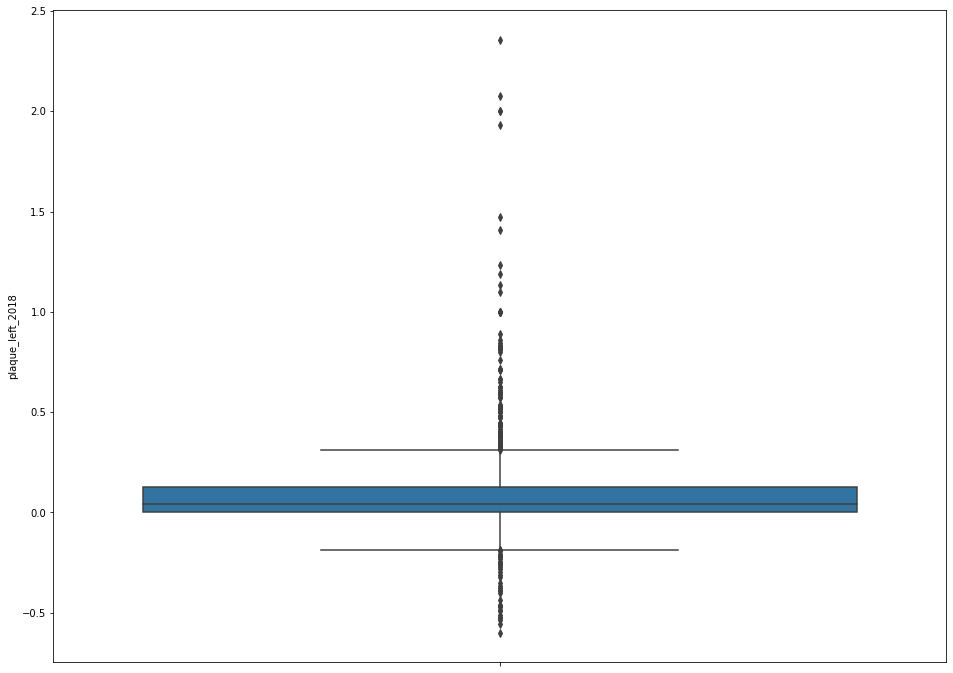

In [43]:
box_diff_L = plt.figure(figsize=(16, 12))
sns.boxplot(y=ps_diff_L)

In [44]:
iqr_L = ps_diff_L.quantile(0.75) - ps_diff_L.quantile(0.25)

In [45]:
iqr_L

0.12499999999999997

In [46]:
lower_bound_L = ps_diff_L.quantile(0.25) - 1.5*iqr_L
lower_bound_L

-0.18749999999999994

In [47]:
upper_bound_L = ps_diff_L.quantile(0.75) + 1.5*iqr_L
upper_bound_L

0.3124999999999999

In [48]:
ps_diff_L.describe()

count    1175.000000
mean        0.091766
std         0.237109
min        -0.600000
25%         0.000000
50%         0.041667
75%         0.125000
max         2.357143
Name: plaque_left_2018, dtype: float64

In [49]:
ps_diff_L.loc[ps_diff_L > upper_bound_L]
ps_diff_L.loc[ps_diff_L > upper_bound_L].shape

(107,)

In [50]:
ps_diff_L.loc[ps_diff_L < lower_bound_L].shape

(37,)

In [51]:
df['state_L'] = 'neutral'
threshold_L= 0.05
df.loc[ps_diff_L > threshold_L,'state_L'] = 'deterioration'
df.loc[ps_diff_L < -threshold_L,'state_L'] = 'amelioration'
df.loc[ps_diff_L.isna(),'state_L'] = 'NA'

In [52]:
df.loc[ps_diff_L.isna(), 'state_L'].count()

0

In [53]:
df.groupby('state_L').state_L.count()

state_L
amelioration     103
deterioration    537
neutral          535
Name: state_L, dtype: int64

In [54]:
df['state_L'].value_counts()

deterioration    537
neutral          535
amelioration     103
Name: state_L, dtype: int64

In [55]:
df.loc[:, 'state_num_L'] = df.loc[:, 'state_L'].replace({'neutral': 0, 'deterioration': -1, 'amelioration': 1})

In [56]:
df

ID  plaque_left_2015  plaque_right_2015  plaque_left_2018  \
0        2               3.3                3.0               3.5   
1        3               2.5                4.8               2.7   
2        4               3.6                1.8               3.3   
3        5               1.9                2.0               2.0   
4        6               3.6                3.1               3.6   
...    ...               ...                ...               ...   
1170  1645               2.0                2.1               2.1   
1171  1646               2.4                1.8               2.4   
1172  1647               2.1                1.8               2.3   
1173  1655               2.5                2.4               2.6   
1174  1656               2.8                3.9               2.7   

      plaque_right_2018  year_of_birth age  sex  weight  height  \
0                   3.1           1940  75    0      87     170   
1                   4.3           1955  60    1      92     170   
2                   2.0           1949  66    1      84     168   
3                   1.9           1958  57    0     119     168   
4                   3.1           1971  44    1     105     180   
...                 ...            ...  ..  ...     ...     ...   
1170                2.2           1947  68    0     100     170   
1171                1.8           1947  68    0      78     155   
1172                1.8           1962  53    0      68     154   
1173                2.5           1940  75    0      77     160   
1174                3.9           1935  80    1      76     175   

      high_blood_pressure  systolic_BP  diastolic_BP  cholesterol  diabetes  \
0                       1          130            80            0         1   
1                       1          140            80            0         0   
2                       1          140            80            1         1   
3                       1          135            90            0         0   
4                       1          140            80            0         0   
...                   ...          ...           ...          ...       ...   
1170                    1          160            90            0         0   
1171                    1          140            70            1         0   
1172                    1          160           100            1         0   
1173                    1          130            80            0         1   
1174                    1          130            80            1         0   

      alcohol  smoking age_class  age_class_1        BMI      BMI_class  \
0           0        0        80            1  30.103806         .obese   
1           1        0        60            0  31.833910         .obese   
2           2        0        70            1  29.761905     overweight   
3           0        0        60            0  42.162698  .morbid obese   
4           3        1        50            0  32.407407         .obese   
...       ...      ...       ...          ...        ...            ...   
1170        1        0        70            1  34.602076         .obese   
1171        1        0        70            1  32.466181         .obese   
1172        1        0        60            0  28.672626     overweight   
1173        0        0        80            1  30.078125         .obese   
1174        1        0        80            1  24.816327         normal   

      BMI_class_1  BP_class_1  alcohol_class_1  smoking_class_1  \
0               1           0                0                0   
1               1           0                1                0   
2               1           0                1                0   
3               1           1                0                0   
4               1           0                1                1   
...           ...         ...              ...              ...   
1170            1           1                1         

### Right plaque
- ps_diff_R - right plaque rozdíl tloušťky
- box_diff_L - box plot of the  of right plaque  pro rozdíl tloušťky pravého plátu
- iqr_L - mezikvartilové rozpětí (0,3)
- lower_bound_L - dolní fous (-0,45 ; 51 hodnot menších než dolní fous)
- upper_bound_L - horní fous (0,75; 112 hodnot větších než horní fous)
- ps_diff_L - rozdíl tloušťky (1176 hodnot; průměr 0,210527; smodch = 0,644211, min = -3,1, max = 5,0 kvartily = (0; 0,1; 0,3))
- state_L - threshold: 0,05, (neutral - 335, deterioration - 657, amelioration - 184)

In [57]:
ps_2015_R = pd.to_numeric(df['plaque_right_2015']).copy()

In [58]:
ps_2018_R = pd.to_numeric(df['plaque_right_2018']).copy()

In [59]:
ps_2018_R

0       3.1
1       4.3
2       2.0
3       1.9
4       3.1
       ... 
1170    2.2
1171    1.8
1172    1.8
1173    2.5
1174    3.9
Name: plaque_right_2018, Length: 1175, dtype: float64

In [60]:
ps_diff_R = ps_2015_R
ps_diff_R[ps_2015_R != 0] = (ps_2018_R - ps_2015_R)/ps_2015_R
ps_diff_R[ps_2015_R == 0] = ps_2018_R - ps_2015_R
ps_diff_R 

0       0.033333
1      -0.104167
2       0.111111
3      -0.050000
4       3.100000
          ...   
1170    0.047619
1171    1.800000
1172    1.800000
1173    0.041667
1174    3.900000
Name: plaque_right_2015, Length: 1175, dtype: float64

<AxesSubplot:ylabel='plaque_right_2015'>

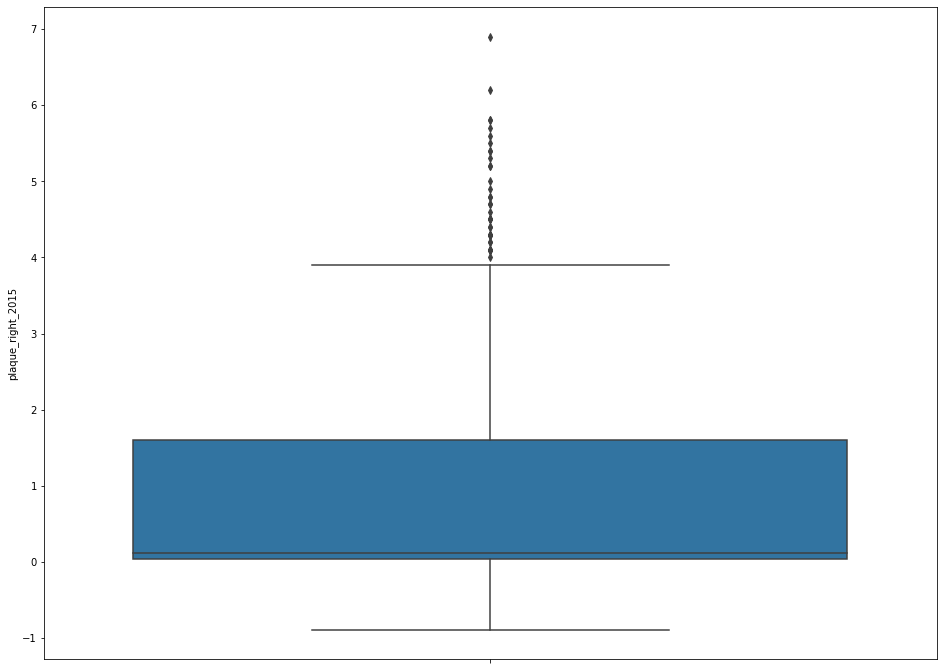

In [61]:
box_diff_R = plt.figure(figsize=(16, 12))
sns.boxplot(y=ps_diff_R)

In [62]:
iqr_R = ps_diff_R.quantile(0.75) - ps_diff_R.quantile(0.25)

In [63]:
iqr_R

1.5615384615384615

In [64]:
lower_bound_R = ps_diff_R.quantile(0.25) - 1.5*iqr_R
lower_bound_R

-2.303846153846154

In [65]:
upper_bound_R = ps_diff_R.quantile(0.75) + 1.5*iqr_R
upper_bound_R

3.9423076923076925

In [66]:
ps_diff_R.describe()

count    1175.000000
mean        0.818585
std         1.296677
min        -0.887500
25%         0.038462
50%         0.125000
75%         1.600000
max         6.900000
Name: plaque_right_2015, dtype: float64

In [67]:
ps_diff_R.loc[ps_diff_R > upper_bound_R].shape

(40,)

In [68]:
ps_diff_R.loc[ps_diff_R < lower_bound_R].shape

(0,)

In [69]:
df['state_R'] = 'neutral'
threshold = 0.05
df.loc[ps_diff_R > threshold,'state_R'] = 'deterioration'
df.loc[ps_diff_R < -threshold,'state_R'] = 'amelioration'
df.loc[ps_diff_R.isna(),'state_R'] = 'NA'

In [70]:
df.loc[ps_diff_R.isna(), 'state_R'].count()

0

In [71]:
df.groupby('state_R').state_R.count()

state_R
amelioration     117
deterioration    818
neutral          240
Name: state_R, dtype: int64

In [72]:
df['state_R'].value_counts()

deterioration    818
neutral          240
amelioration     117
Name: state_R, dtype: int64

In [73]:
df.loc[:, 'state_num_R'] = df.loc[:, 'state_R'].replace({'neutral': 0, 'deterioration': -1, 'amelioration': 1})

# Shallow Copy

In [74]:
dfs = df.copy()

# Factors analysis
- 1. Age (dark red)
- 2. BMI (red)
- 3. Blood Pressure (orange)
- 4. Cholesterol (yellow)
- 5. Alcohol (green)
- 6. Sex (turquoise)
- 7. Smoking (lilac)
- 8. Diabetes (violet)

## 1. Age

In [75]:
dfs.state_L.value_counts()

deterioration    537
neutral          535
amelioration     103
Name: state_L, dtype: int64

In [76]:
dfs['age'].describe()

count     1175
unique      52
top         72
freq        69
Name: age, dtype: int64

In [77]:
dfs['age'].median()

69.0

In [78]:
dfs[dfs['state_L'] == 'deterioration']['age'].mean()

68.16759776536313

In [79]:
dfs[dfs['state_L'] == 'amelioration']['age'].mean()

68.25242718446601

In [80]:
dfs[dfs['state_L'] == 'neutral']['age'].mean()

67.93644859813084

In [81]:
dfs[dfs['state_L'] == 'neutral']['age'].describe()

count     535
unique     50
top        72
freq       36
Name: age, dtype: int64

<AxesSubplot:ylabel='age'>

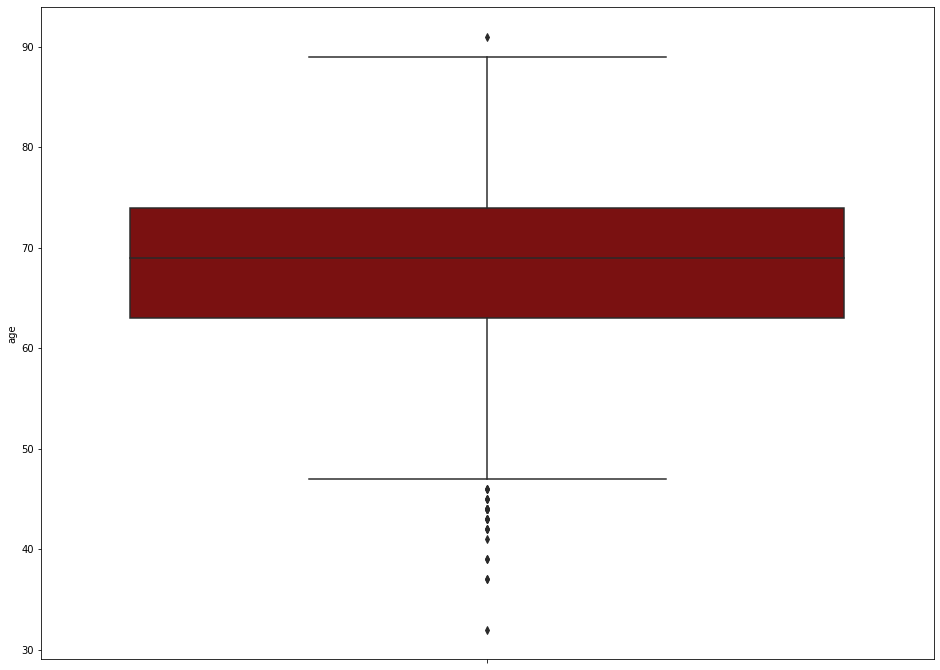

In [82]:
boxplot_age = plt.figure(figsize=(16, 12))
sns.boxplot(data=df, y='age', color='Darkred')

In [83]:
iqr_age = dfs['age'].quantile(0.75) - dfs['age'].quantile(0.25)

In [84]:
iqr_age

11.0

In [85]:
lower_bound_age = dfs['age'].quantile(0.25) - 1.5*iqr_age
lower_bound_age

46.5

In [86]:
upper_bound_age = dfs['age'].quantile(0.75) + 1.5*iqr_age
upper_bound_age

90.5

In [87]:
dfs.age.loc[dfs.age > upper_bound_age].shape

(1,)

In [88]:
dfs.age.loc[dfs.age < lower_bound_age].shape

(28,)

### left plaque

In [89]:
df_age_L = df.groupby(['age_class_1', 'state_L']).state_L.count().reset_index(name='count_L').rename({'age_class_1': 'older than 65 years'}, axis = 1)
df_age_L

older than 65 years        state_L  count_L
0                    0   amelioration       31
1                    0  deterioration      164
2                    0        neutral      173
3                    1   amelioration       72
4                    1  deterioration      373
5                    1        neutral      362

In [90]:
df_age_L['percent_L'] = df_age_L['count_L']/df_age_state * 100
df_age_L

older than 65 years        state_L  count_L  percent_L
0                    0   amelioration       31   8.423913
1                    0  deterioration      164  44.565217
2                    0        neutral      173  47.010870
3                    1   amelioration       72   8.921933
4                    1  deterioration      373  46.220570
5                    1        neutral      362  44.857497

Text(0, 0.5, 'The difference of width of the plaque (%)')

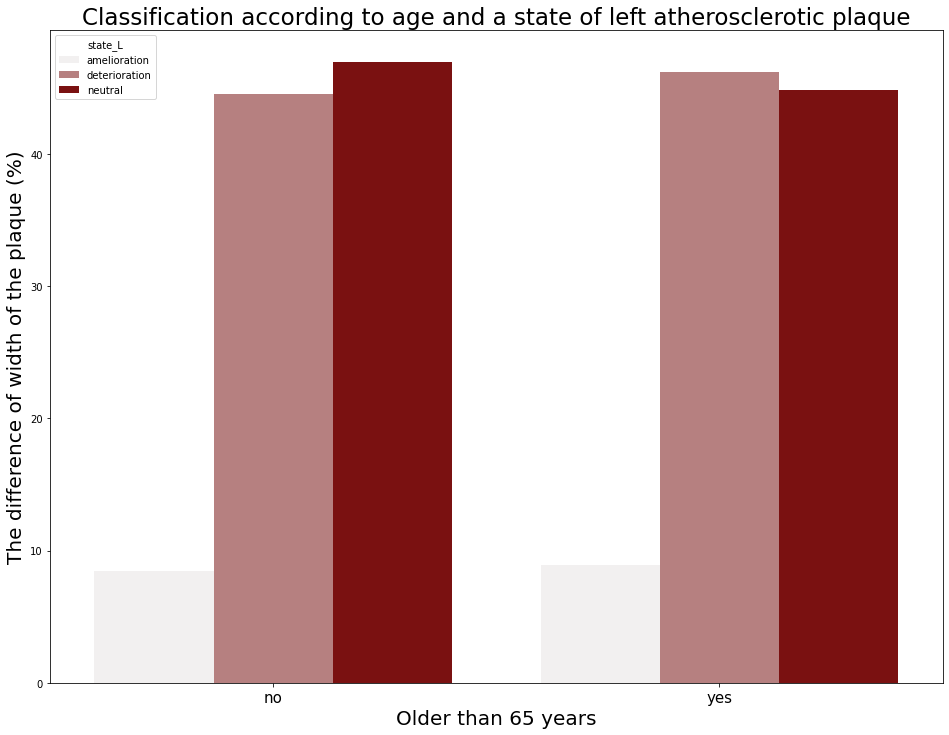

In [91]:
barchar_age_L = plt.figure(figsize=(16, 12))
sns.barplot(data=df_age_L, y='percent_L', hue='state_L', x='older than 65 years', color='darkred')

#set_xticks(range(len(s_x)+1))
plt.xticks([0, 1],['no', 'yes'], fontsize = 15)

plt.title('Classification according to age and a state of left atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('Older than 65 years', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('The difference of width of the plaque (%)', fontsize = 20) # y-axis label with fontsize 15

Text(0, 0.5, 'Representation in the group (%)')

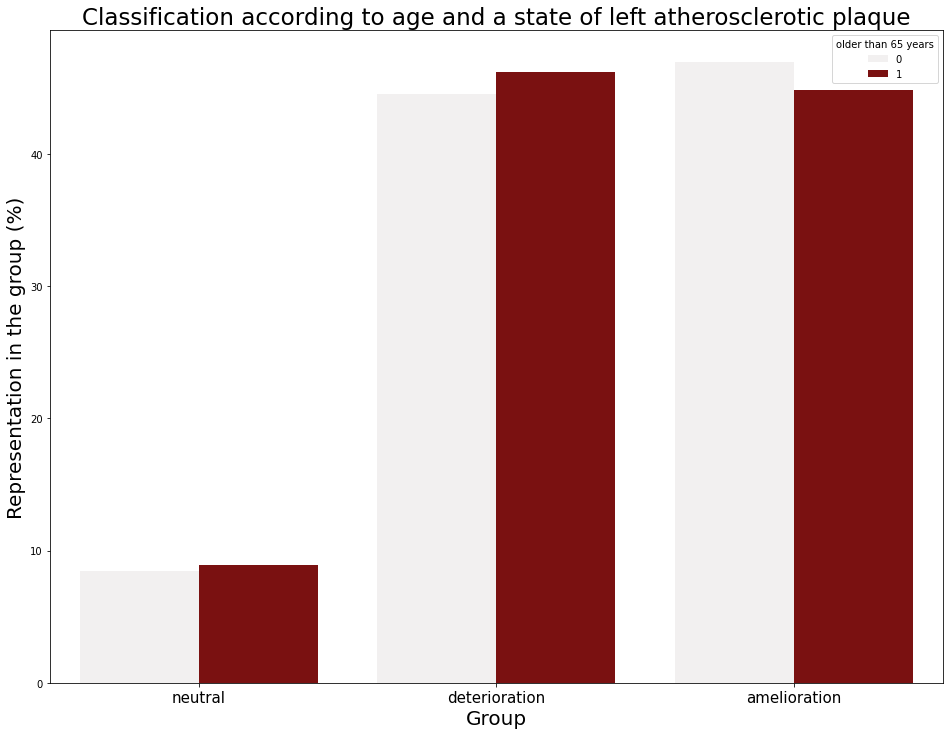

In [92]:
barchar_age_L_1 = plt.figure(figsize=(16, 12))
sns.barplot(data=df_age_L, y='percent_L', hue='older than 65 years', x='state_L', color='darkred')

#set_xticks(range(len(s_x)+1))
plt.xticks([0, 1, 2],['neutral', 'deterioration', 'amelioration'], fontsize = 15)

plt.title('Classification according to age and a state of left atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('Group', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Representation in the group (%)', fontsize = 20) # y-axis label with fontsize 15

Text(0, 0.5, 'Age')

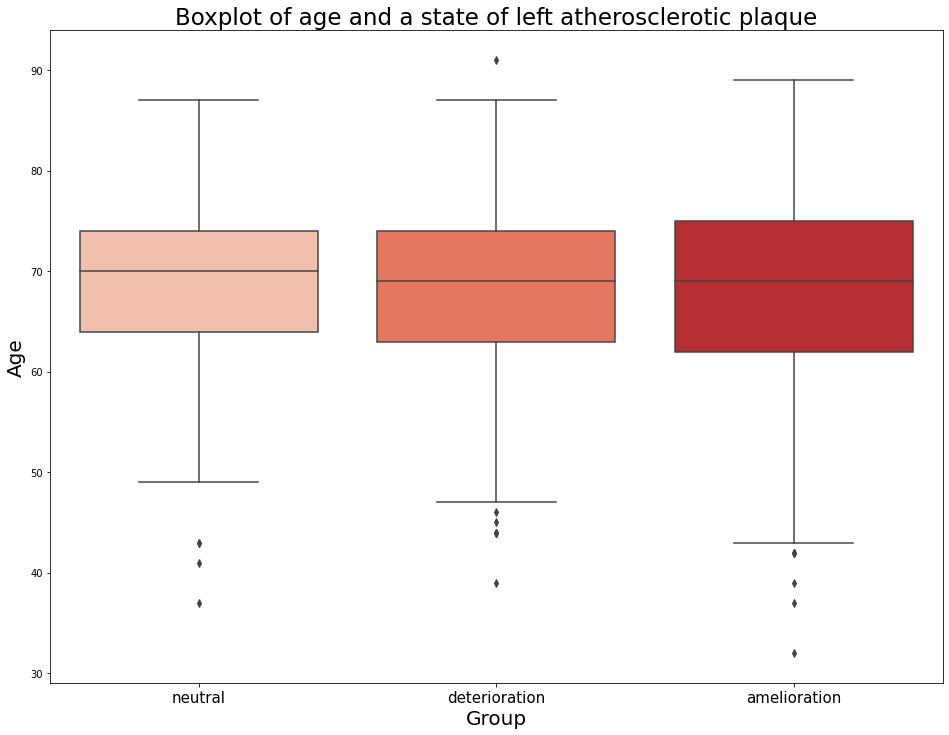

In [93]:
boxplot_age_L = plt.figure(figsize=(16, 12))
sns.boxplot(data=dfs.sort_values(by='state_L'), y='age', x='state_L', palette='Reds')

plt.xticks([0, 1, 2],['neutral', 'deterioration' , 'amelioration'], fontsize = 15)
plt.title('Boxplot of age and a state of left atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('Group', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Age', fontsize = 20) # y-axis label with fontsize 15

In [94]:
pd.crosstab(dfs.age_class, df.state_L)

state_L    amelioration  deterioration  neutral
age_class                                      
40                    1              1        3
50                    4             17       24
60                   10             75       79
70                   43            206      194
80                   45            237      235
90                    0              1        0

Text(87.0, 0.5, 'Age')

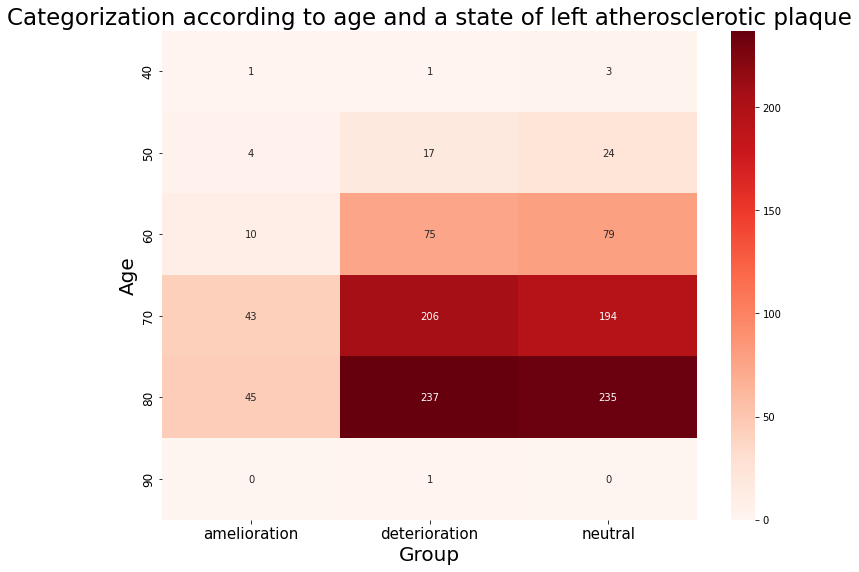

In [95]:
heat_age_L = plt.figure(figsize=(12,9))
sns.heatmap(pd.crosstab(dfs.age_class, df.state_L), annot=True, cmap='Reds', fmt='g')

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 12)
plt.title('Categorization according to age and a state of left atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('Group', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Age', fontsize = 20) # y-axis label with fontsize 15

### right plaque


In [96]:
df_age_R = df.groupby(['age_class_1', 'state_R']).state_R.count().reset_index(name='count_R').rename({'age_class_1': 'older than 65 years'}, axis = 1)
df_age_R

older than 65 years        state_R  count_R
0                    0   amelioration       44
1                    0  deterioration      258
2                    0        neutral       66
3                    1   amelioration       73
4                    1  deterioration      560
5                    1        neutral      174

In [97]:
df_age_R['percent_R'] = df_age_R['count_R']/df_age_state * 100
df_age_R

older than 65 years        state_R  count_R  percent_R
0                    0   amelioration       44  11.956522
1                    0  deterioration      258  70.108696
2                    0        neutral       66  17.934783
3                    1   amelioration       73   9.045849
4                    1  deterioration      560  69.392813
5                    1        neutral      174  21.561338

Text(0, 0.5, 'The difference of width of the plaque (%)')

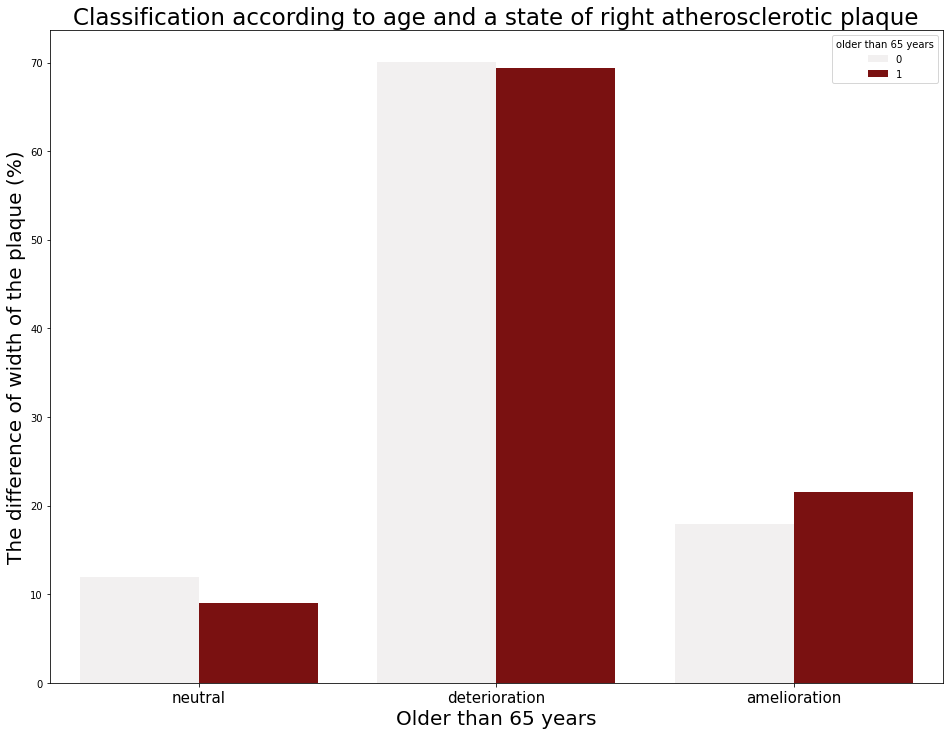

In [98]:
barchar_age_R = plt.figure(figsize=(16, 12))
sns.barplot(data=df_age_R, y='percent_R', hue='older than 65 years', x='state_R', color='darkred')

#set_xticks(range(len(s_x)+1))
#plt.legend( fontsize = 12)

plt.xticks([0, 1, 2],['neutral', 'deterioration' , 'amelioration'], fontsize = 15)
plt.title('Classification according to age and a state of right atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('Older than 65 years', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('The difference of width of the plaque (%)', fontsize = 20) # y-axis label with fontsize 15

Text(0, 0.5, 'The difference of width of the plaque (%)')

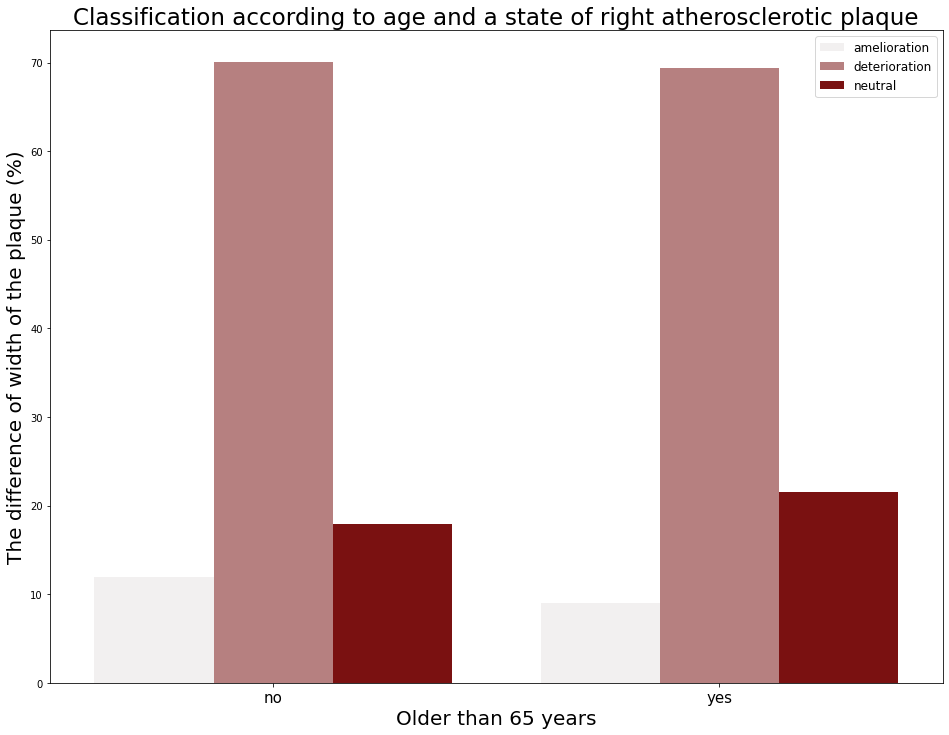

In [99]:
barchar_age_R_1 = plt.figure(figsize=(16, 12))
sns.barplot(data=df_age_R, y='percent_R', hue='state_R', x='older than 65 years', color='darkred')

#set_xticks(range(len(s_x)+1))
plt.legend(fontsize = 12)
plt.xticks([0, 1],['no', 'yes'], fontsize = 15)
plt.title('Classification according to age and a state of right atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('Older than 65 years', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('The difference of width of the plaque (%)', fontsize = 20) # y-axis label with fontsize 15

In [100]:
pd.crosstab(dfs.age_class, df.state_R)

state_R    amelioration  deterioration  neutral
age_class                                      
40                    1              3        1
50                    9             26       10
60                   19            118       27
70                   46            313       84
80                   42            357      118
90                    0              1        0

Text(87.0, 0.5, 'Age')

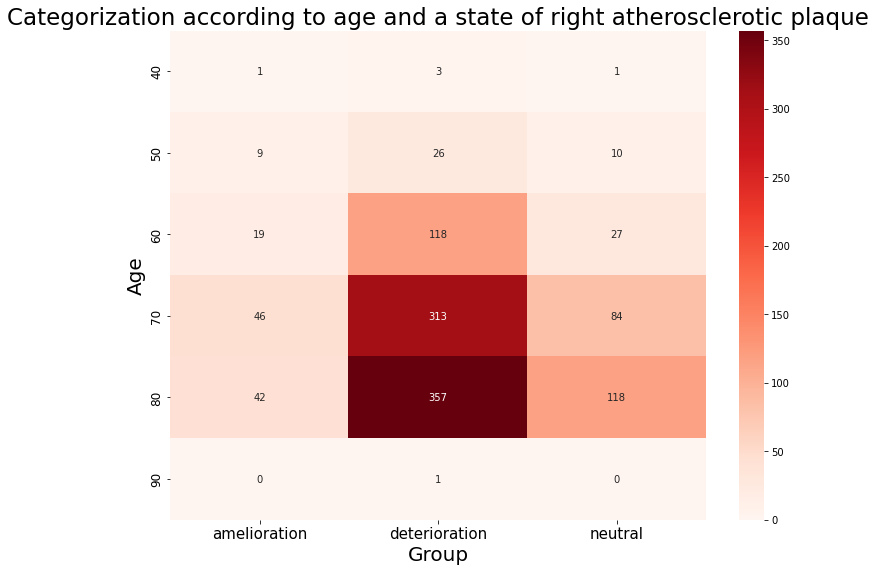

In [101]:
heat_age_R = plt.figure(figsize=(12,9))
sns.heatmap(pd.crosstab(dfs.age_class, df.state_R), annot=True, cmap='Reds', fmt='g')

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 12)
plt.title('Categorization according to age and a state of right atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('Group', fontsize = 20) # x-axis label with fontsize 20
plt.ylabel('Age', fontsize = 20) # y-axis label with fontsize 20

Text(0, 0.5, 'Age')

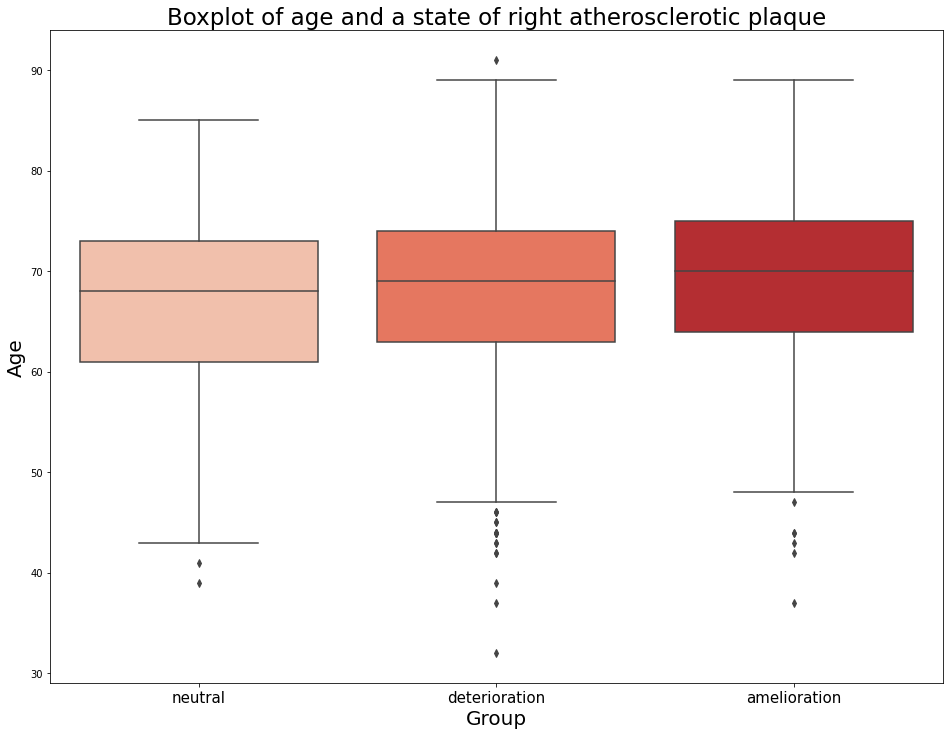

In [102]:
boxplot_age_R = plt.figure(figsize=(16, 12))
sns.boxplot(data=dfs.sort_values(by='state_R'), y='age', x='state_R', palette="Reds")

plt.xticks([0, 1, 2],['neutral', 'deterioration' , 'amelioration'], fontsize = 15)
plt.title('Boxplot of age and a state of right atherosclerotic plaque', fontsize = 23) # title with fontsize 20
plt.xlabel('Group', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Age', fontsize = 20) # y-axis label with fontsize 15

## 2. Weight (BMI)

<AxesSubplot:ylabel='BMI'>

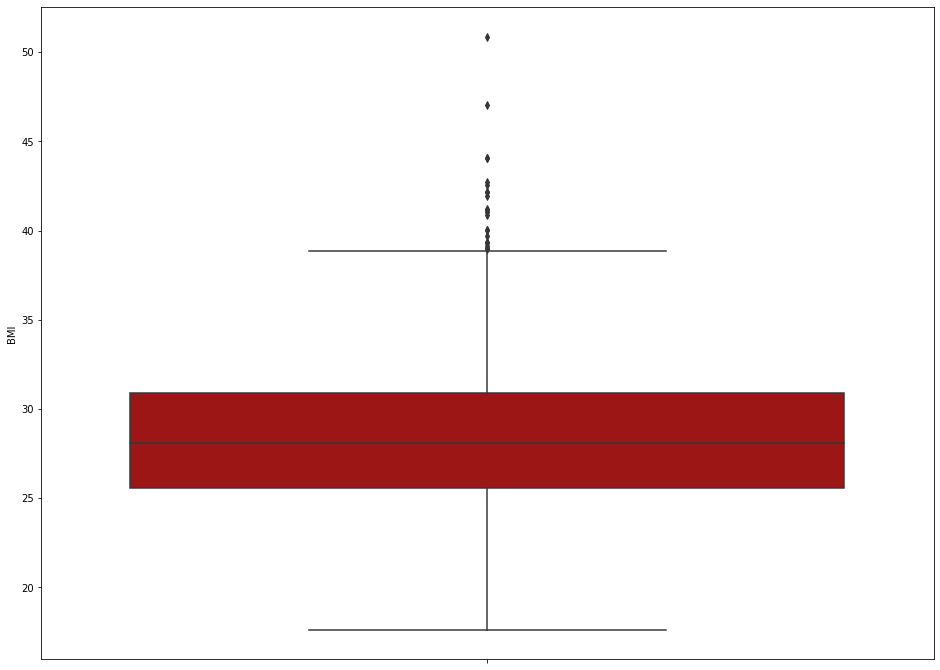

In [103]:
boxplot_bmi = plt.figure(figsize=(16, 12))
sns.boxplot(y=df['BMI'], color=(0.7,0.0,0.0,0.1))

In [104]:
df['BMI'].describe()

count    1175.000000
mean       28.487864
std         4.274917
min        17.625381
25%        25.578582
50%        28.081633
75%        30.896314
max        50.874962
Name: BMI, dtype: float64

fig_weight = plt.figure(figsize=(16, 12))
plt.pie(dfs_BMI['percent_BMI'])

### left plaque

In [105]:
df_BMI_L = df.groupby(['BMI_class_1', 'state_L']).state_L.count().reset_index(name='count_L').rename({'BMI_class_1': 'BMI overweight and higher'}, axis = 1)
df_BMI_L

BMI overweight and higher        state_L  count_L
0                          0   amelioration       23
1                          0  deterioration      110
2                          0        neutral      112
3                          1   amelioration       80
4                          1  deterioration      427
5                          1        neutral      423

In [106]:
df_BMI_L['percent_L'] = df_BMI_L['count_L']/df_BMI_state * 100
df_BMI_L

BMI overweight and higher        state_L  count_L  percent_L
0                          0   amelioration       23   9.387755
1                          0  deterioration      110  44.897959
2                          0        neutral      112  45.714286
3                          1   amelioration       80   8.602151
4                          1  deterioration      427  45.913978
5                          1        neutral      423  45.483871

Text(0, 0.5, 'Group distribution (%)')

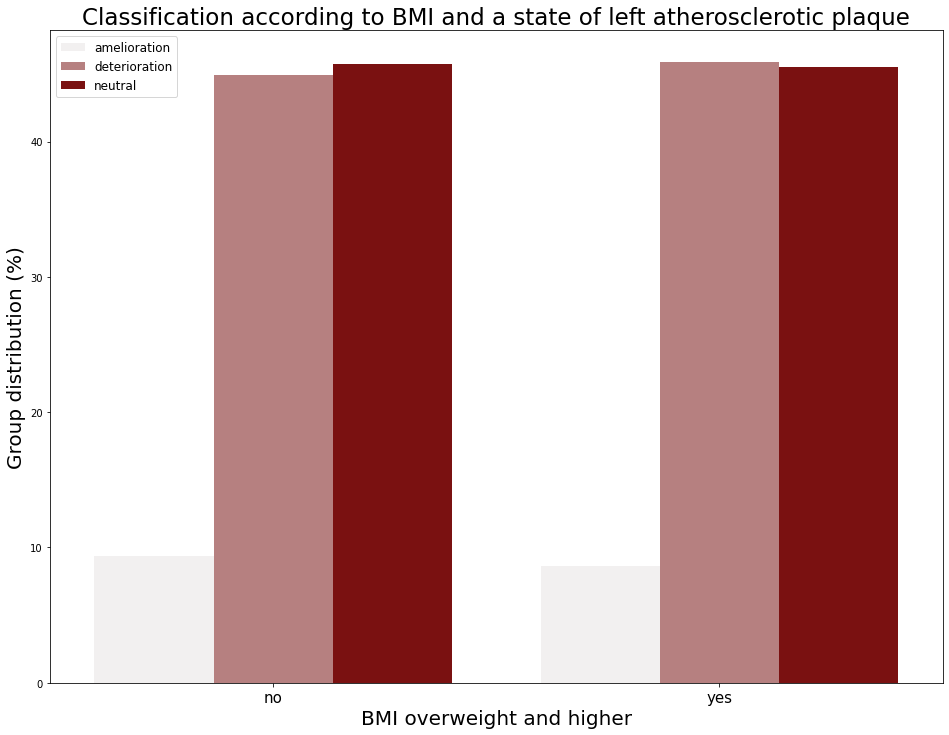

In [107]:
barchar_bmi_L = plt.figure(figsize=(16, 12))
sns.barplot(data=df_BMI_L, y='percent_L', hue='state_L', x='BMI overweight and higher', color='darkred')

#set_xticks(range(len(s_x)+1))
plt.legend(fontsize = 12)
plt.xticks([0, 1],['no', 'yes'], fontsize = 15)
plt.title('Classification according to BMI and a state of left atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('BMI overweight and higher', fontsize = 20) # x-axis label with fontsize 20
plt.ylabel('Group distribution (%)', fontsize = 20) # y-axis label with fontsize 20

Text(0, 0.5, 'Distribution of the group(%)')

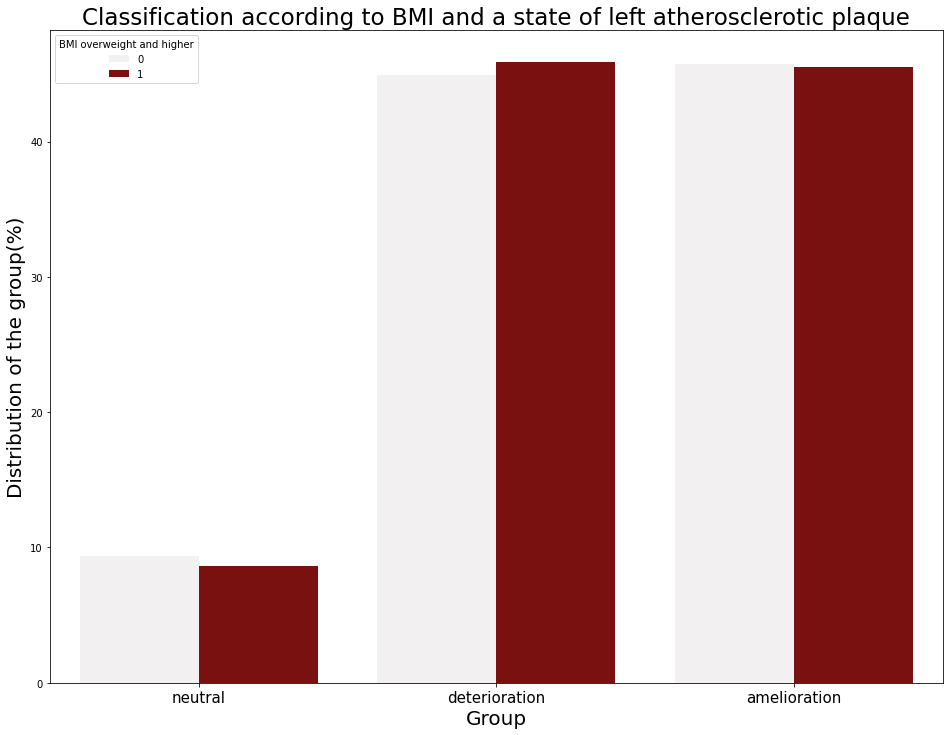

In [108]:
barchar_bmi_L_1 = plt.figure(figsize=(16, 12))
sns.barplot(data=df_BMI_L, y='percent_L', hue='BMI overweight and higher', x='state_L', color='darkred')

#set_xticks(range(len(s_x)+1))
plt.xticks([0, 1, 2],['neutral', 'deterioration' , 'amelioration'], fontsize = 15)

plt.title('Classification according to BMI and a state of left atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('Group', fontsize = 20) # x-axis label with fontsize 20
plt.ylabel('Distribution of the group(%)', fontsize = 20) # y-axis label with fontsize 20

In [109]:
pd.crosstab(dfs.BMI_class, df.state_L)

state_L        amelioration  deterioration  neutral
BMI_class                                          
.morbid obese             1              9        5
.obese                   35            170      184
normal                   23            107      110
overweight               44            247      234
underweight               0              4        2

Text(87.0, 0.5, 'BMI index')

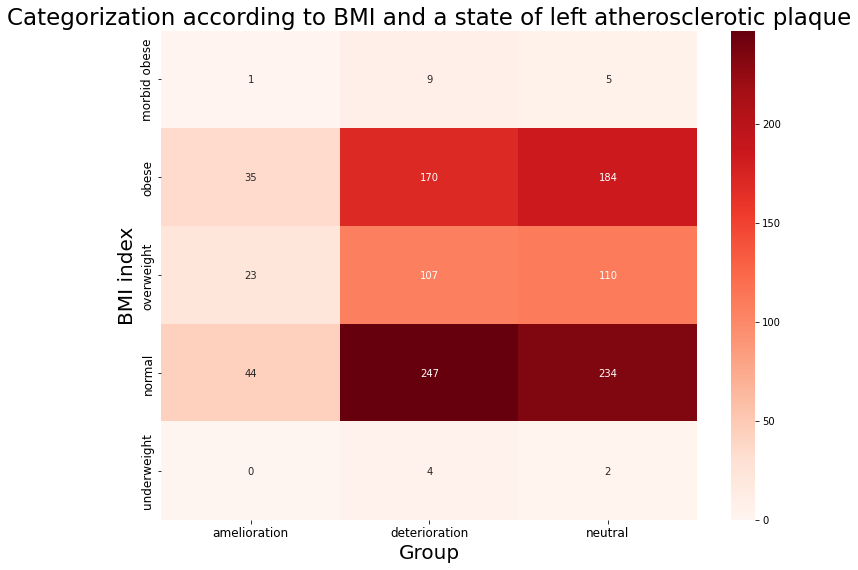

In [110]:
heatmap_bmi_L = plt.figure(figsize=(12,9))
sns.heatmap(pd.crosstab(dfs.BMI_class, df.state_L), annot=True, cmap='Reds', fmt='g', color = 'lightblue',
yticklabels=('morbid obese', 'obese', 'overweight', 'normal', 'underweight'))

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Categorization according to BMI and a state of left atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('Group', fontsize = 20) # x-axis label with fontsize 20
plt.ylabel('BMI index', fontsize = 20) # y-axis label with fontsize 20

cho.Chord(df_BMI_L['BMI_class'], df_BMI_L['state_L'])

Text(0, 0.5, 'Group')

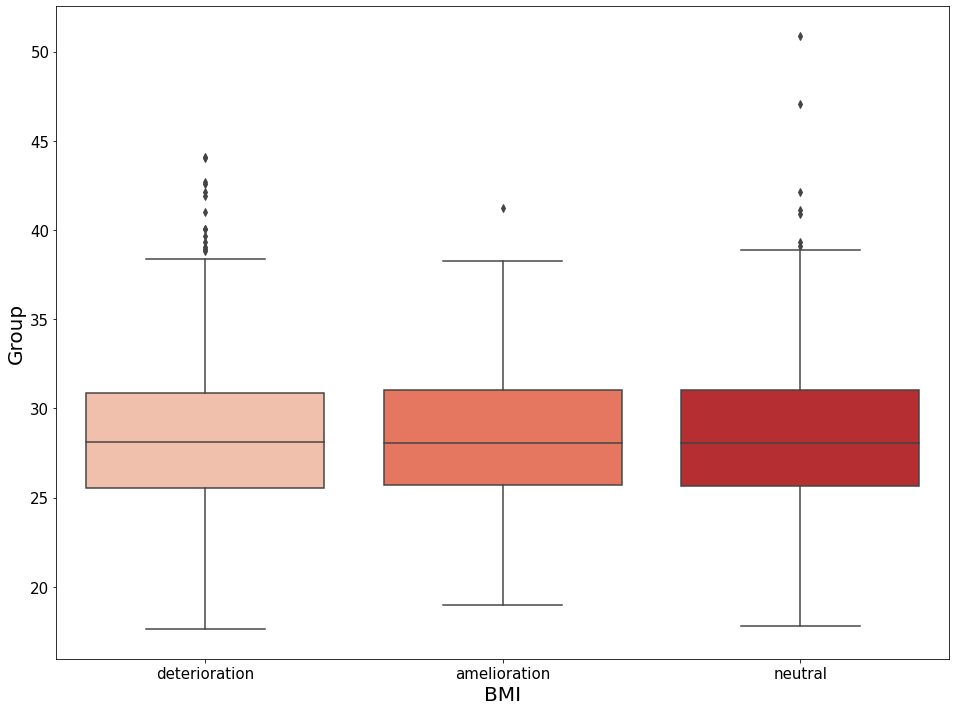

In [111]:
boxplot_bmi_L = plt.figure(figsize=(16, 12))
sns.boxplot(data=dfs, y='BMI', x='state_L', palette='Reds')

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("BMI", fontsize = 20)
plt.ylabel("Group", fontsize = 20)

Text(0, 0.5, 'The difference of width of the plaque (%)')

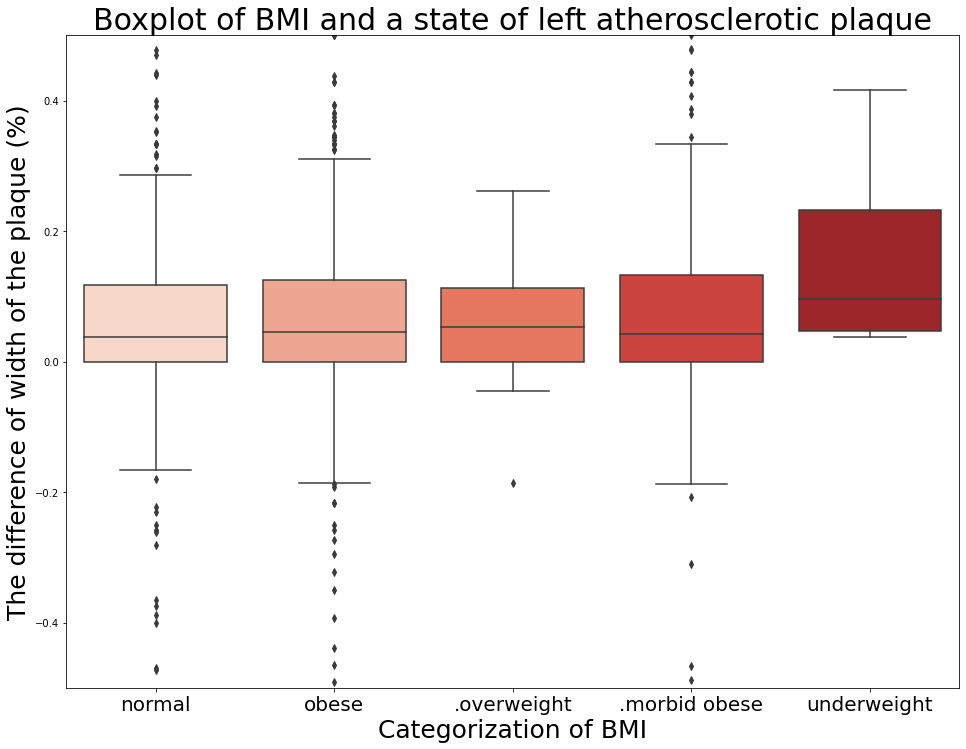

In [112]:
boxplot_bmi_L_1 = plt.figure(figsize=(16, 12))
#sns.boxplot(data=dfs[~(dfs['BMI_class'] == 'underweight')], y=ps_diff_L, x='BMI_class').set(ylim=(-0.5,0.5))
sns.boxplot(data=dfs, y=ps_diff_L, x='BMI_class', palette='Reds').set(ylim=(-0.5, 0.5))
#sns.boxplot(data=dfs, y=ps_diff_L, x='BMI_class', palette='Reds')
plt.xticks([0, 1, 2, 3, 4],['normal', 'obese', '.overweight', '.morbid obese', 'underweight'], fontsize = 20)

plt.title('Boxplot of BMI and a state of left atherosclerotic plaque', fontsize = 30) # title with fontsize 20
plt.xlabel('Categorization of BMI', fontsize = 25) # x-axis label with fontsize 15
plt.ylabel('The difference of width of the plaque (%)', fontsize = 25) # y-axis label with fontsize 15

In [113]:
dfs[dfs.BMI_class =='underweight']

ID  plaque_left_2015  plaque_right_2015  plaque_left_2018  \
246  327               4.0                3.4               4.2   
271  374               2.1                3.5               2.4   
374  523               2.6                2.5               2.7   
403  572               1.2                1.8               1.7   
437  622               2.2                2.2               2.3   
544  758               1.9                3.3               2.4   

     plaque_right_2018  year_of_birth age  sex  weight  height  \
246                3.8           1938  77    0      49     163   
271                3.7           1936  79    0      44     158   
374                2.4           1946  69    0      45     159   
403                1.2           1957  58    0      53     173   
437                2.3           1958  57    0      59     179   
544                4.7           1958  57    0      56     175   

     high_blood_pressure  systolic_BP  diastolic_BP  cholesterol  diabetes  \
246                    1          120            60            0         0   
271                    1          120            80            0         0   
374                    0          120            80            0         0   
403                    0          130            70            0         0   
437                    0          130            80            0         0   
544                    1          130            80            0         0   

     alcohol  smoking age_class  age_class_1        BMI    BMI_class  \
246        0        0        80            1  18.442546  underweight   
271        1        0        80            1  17.625381  underweight   
374        0        0        70            1  17.799929  underweight   
403        1        0        60            0  17.708577  underweight   
437        1        1        60            0  18.413907  underweight   
544        1        1        60            0  18.285714  underweight   

     BMI_class_1  BP_class_1  alcohol_class_1  smoking_class_1        state_L  \
246            0           0                0                0  deterioration   
271            0           0                1                0  deterioration   
374            0           0                0                0        neutral   
403            0           0                1                0  deterioration   
437            0           0                1                1        neutral   
544            0           0                1                1  deterioration   

     state_num_L        state_R  state_num_R  
246           -1  deterioration           -1  
271           -1  deterioration           -1  
374            0        neutral            0  
403           -1   amelioration            1  
437            0        neutral            0  
544           -1  deterioration           -1

In [114]:
df.iloc[:,1:5]

plaque_left_2015  plaque_right_2015  plaque_left_2018  plaque_right_2018
0                  3.3                3.0               3.5                3.1
1                  2.5                4.8               2.7                4.3
2                  3.6                1.8               3.3                2.0
3                  1.9                2.0               2.0                1.9
4                  3.6                3.1               3.6                3.1
...                ...                ...               ...                ...
1170               2.0                2.1               2.1                2.2
1171               2.4                1.8               2.4                1.8
1172               2.1                1.8               2.3                1.8
1173               2.5                2.4               2.6                2.5
1174               2.8                3.9               2.7                3.9

[1175 rows x 4 columns]

### right plaque

In [115]:
df_BMI_R = df.groupby(['BMI_class_1', 'state_R']).state_R.count().reset_index(name='count_R').rename({'BMI_class_1': 'BMI overweight and higher'}, axis = 1)
df_BMI_R

BMI overweight and higher        state_R  count_R
0                          0   amelioration       29
1                          0  deterioration      177
2                          0        neutral       39
3                          1   amelioration       88
4                          1  deterioration      641
5                          1        neutral      201

In [116]:
df_BMI_R['percent_R'] = df_BMI_R['count_R']/df_BMI_state * 100
df_BMI_R

BMI overweight and higher        state_R  count_R  percent_R
0                          0   amelioration       29  11.836735
1                          0  deterioration      177  72.244898
2                          0        neutral       39  15.918367
3                          1   amelioration       88   9.462366
4                          1  deterioration      641  68.924731
5                          1        neutral      201  21.612903

Text(0, 0.5, 'Representation in the group (%)')

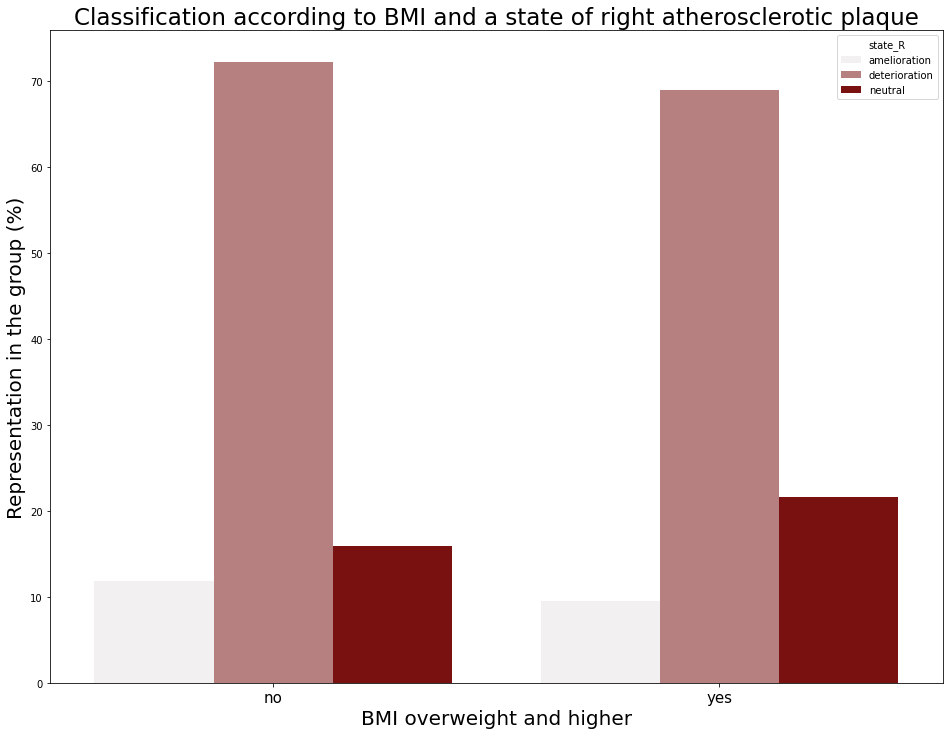

In [117]:
barchar_bmi_R = plt.figure(figsize=(16, 12))
sns.barplot(data=df_BMI_R, y='percent_R', hue='state_R', x='BMI overweight and higher', color='darkred')

#set_xticks(range(len(s_x)+1))
plt.xticks([0, 1],['no', 'yes'], fontsize = 15)

plt.title('Classification according to BMI and a state of right atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('BMI overweight and higher', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Representation in the group (%)', fontsize = 20) # y-axis label with fontsize 15

Text(0, 0.5, 'Representation in the group (%)')

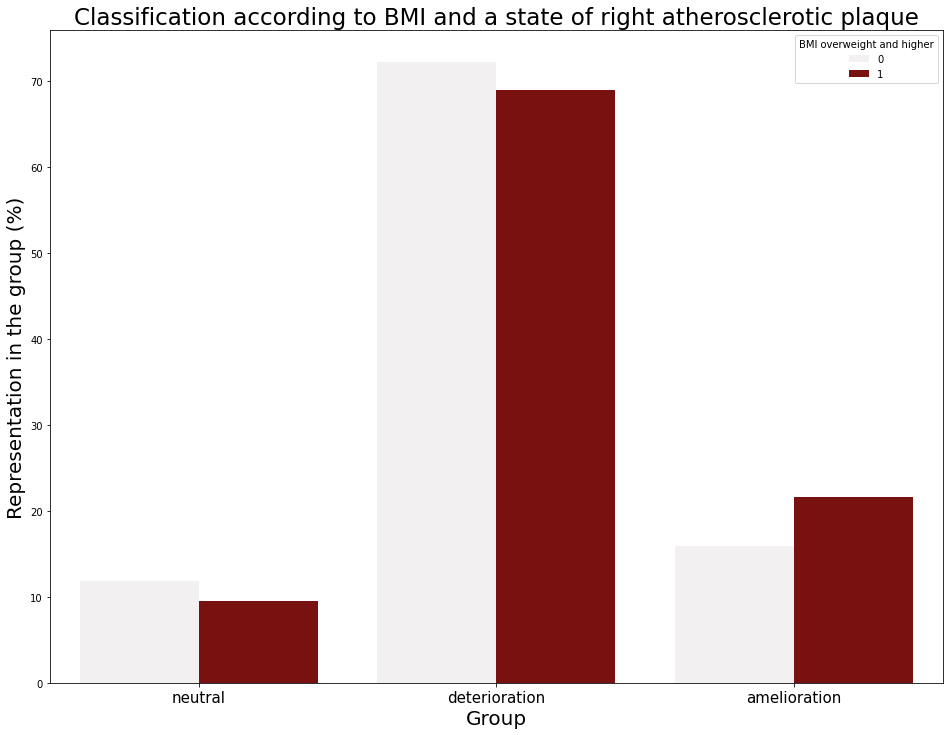

In [118]:
barchar_bmi_R_1 = plt.figure(figsize=(16, 12))
sns.barplot(data=df_BMI_R, y='percent_R', hue='BMI overweight and higher', x='state_R', color='darkred')

#set_xticks(range(len(s_x)+1))
plt.xticks([0, 1, 2],['neutral', 'deterioration' , 'amelioration'], fontsize = 15)

plt.title('Classification according to BMI and a state of right atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('Group', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Representation in the group (%)', fontsize = 20) # y-axis label with fontsize 15

Text(0, 0.5, 'BMI')

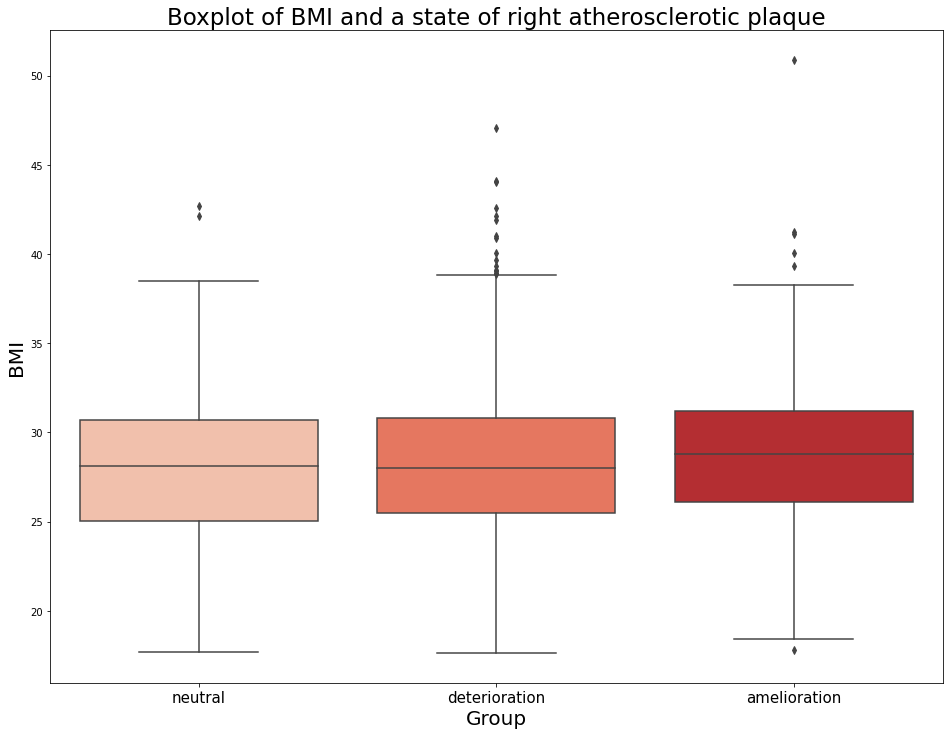

In [119]:
boxplot_bmi_R = plt.figure(figsize=(16, 12))
box = sns.boxplot(data=dfs.sort_values(by='state_R'), y='BMI', x='state_R', palette="Reds")

plt.xticks([0, 1, 2],['neutral', 'deterioration' , 'amelioration'], fontsize = 15)
plt.title('Boxplot of BMI and a state of right atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('Group', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('BMI', fontsize = 20) # y-axis label with fontsize 15

In [120]:
pd.crosstab(dfs.BMI_class, df.state_R)

state_R        amelioration  deterioration  neutral
BMI_class                                          
.morbid obese             2              9        4
.obese                   34            259       96
normal                   28            175       37
overweight               52            372      101
underweight               1              3        2

Text(87.0, 0.5, 'BMI classification')

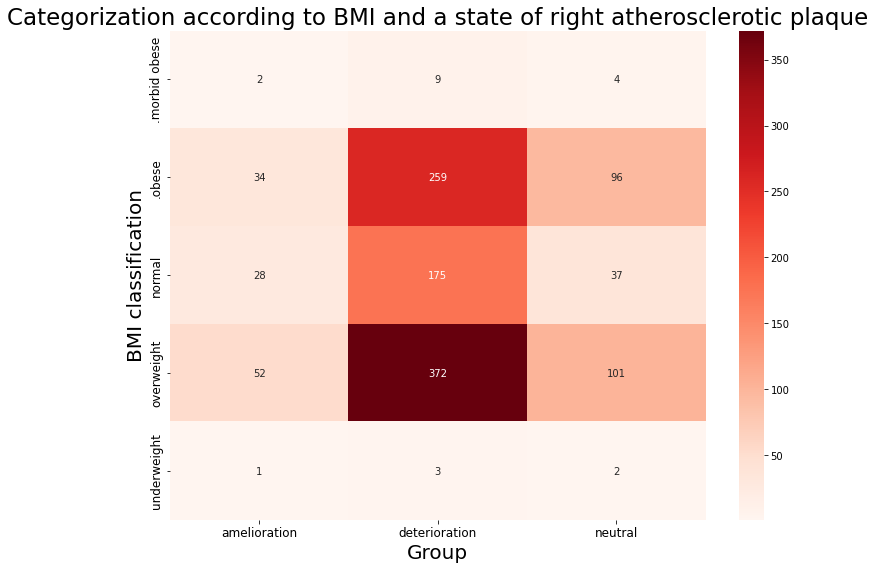

In [121]:
heat_bmi_R = plt.figure(figsize=(12,9))
sns.heatmap(pd.crosstab(dfs.BMI_class, df.state_R), annot=True, cmap='Reds', fmt='g')

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Categorization according to BMI and a state of right atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('Group', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('BMI classification', fontsize = 20) # y-axis label with fontsize 15

## 3.1 Blood Pressure

In [122]:
dfs['systolic_BP'].describe()

count    1175.000000
mean      134.171064
std        12.343418
min        90.000000
25%       130.000000
50%       130.000000
75%       140.000000
max       240.000000
Name: systolic_BP, dtype: float64

In [123]:
iqr_systolic_BP = dfs['systolic_BP'].quantile(0.75) - dfs['systolic_BP'].quantile(0.25)
iqr_systolic_BP

10.0

Text(0, 0.5, 'Systolic blood pressure')

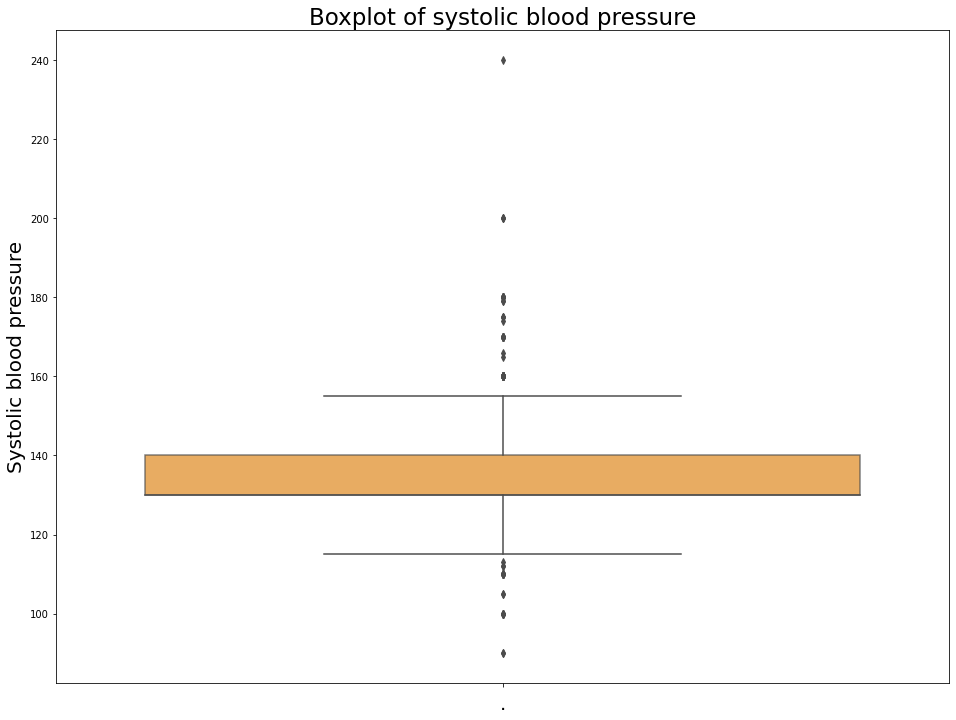

In [124]:
boxplot_systolic_bp = plt.figure(figsize=(16, 12))
sns.boxplot(y=dfs['systolic_BP'], color='Darkorange', boxprops=dict(alpha=0.7))

#plt.xticks([0, 1, 2],['neutral', 'deterioration' , 'amelioration'], fontsize = 15)
plt.title('Boxplot of systolic blood pressure', fontsize = 23) # title with fontsize 23
plt.xlabel('.', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Systolic blood pressure', fontsize = 20) # y-axis label with fontsize 15

In [125]:
df.diastolic_BP.loc[df.diastolic_BP > 85].shape

(191,)

In [126]:
df.diastolic_BP.loc[df.diastolic_BP < 77].shape

(243,)

dfs = dfs[~(dfs.diastolic_BP > 90)]

dfs = dfs[~(dfs.diastolic_BP < 70)]

In [127]:
dfs.shape

(1175, 29)

In [128]:
dfs['diastolic_BP'].describe()

count    1175.000000
mean       79.908085
std         8.932077
min        40.000000
25%        80.000000
50%        80.000000
75%        80.000000
max       185.000000
Name: diastolic_BP, dtype: float64

In [129]:
iqr_systolic_BP = dfs['systolic_BP'].quantile(0.75) - dfs['systolic_BP'].quantile(0.25)
iqr_systolic_BP

10.0

In [130]:
lower_bound_systolic_BP = dfs['systolic_BP'].quantile(0.25) - 1.5*iqr_systolic_BP
lower_bound_systolic_BP

115.0

In [131]:
upper_bound_systolic_BP = dfs['systolic_BP'].quantile(0.75) + 1.5*iqr_systolic_BP
upper_bound_systolic_BP

155.0

In [132]:
dfs.systolic_BP.loc[dfs.systolic_BP > upper_bound_systolic_BP].shape

(59,)

In [133]:
dfs.systolic_BP.loc[dfs.systolic_BP < lower_bound_systolic_BP].shape

(25,)

Text(0, 0.5, 'Diastolic blood pressure')

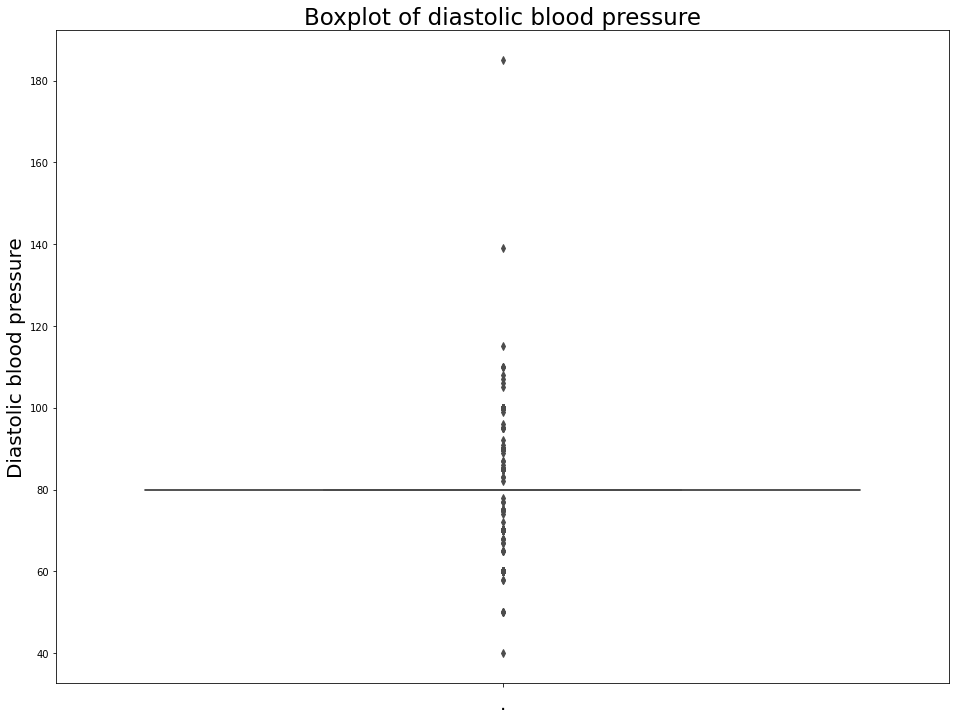

In [134]:
fig_systolic_bp = plt.figure(figsize=(16, 12))
sns.boxplot(y=dfs['diastolic_BP'], color='orange')

#plt.xticks([0, 1, 2],['neutral', 'deterioration' , 'amelioration'], fontsize = 15)
plt.title('Boxplot of diastolic blood pressure', fontsize = 23) # title with fontsize 23
plt.xlabel('.', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Diastolic blood pressure', fontsize = 20) # y-axis label with fontsize 15

In [135]:
iqr_diastolic_BP = dfs['diastolic_BP'].quantile(0.75) - dfs['diastolic_BP'].quantile(0.25)

In [136]:
iqr_diastolic_BP

0.0

In [137]:
lower_bound_diastolic_BP = dfs['diastolic_BP'].quantile(0.25) - 1.5*iqr_diastolic_BP
lower_bound_diastolic_BP

80.0

In [138]:
upper_bound_diastolic_BP = dfs['diastolic_BP'].quantile(0.75) + 1.5*iqr_diastolic_BP
upper_bound_diastolic_BP

80.0

In [139]:
dfs.diastolic_BP.loc[dfs.diastolic_BP > upper_bound_diastolic_BP].shape

(221,)

In [140]:
dfs.diastolic_BP.loc[dfs.diastolic_BP < lower_bound_diastolic_BP].shape

(246,)

### left plaque

In [141]:
dfs['systolic_BP'].median()

130.0

In [142]:
dfs[dfs['state_L'] == 'deterioration']['systolic_BP'].median()

130.0

Text(0, 0.5, 'Systolic blood pressure')

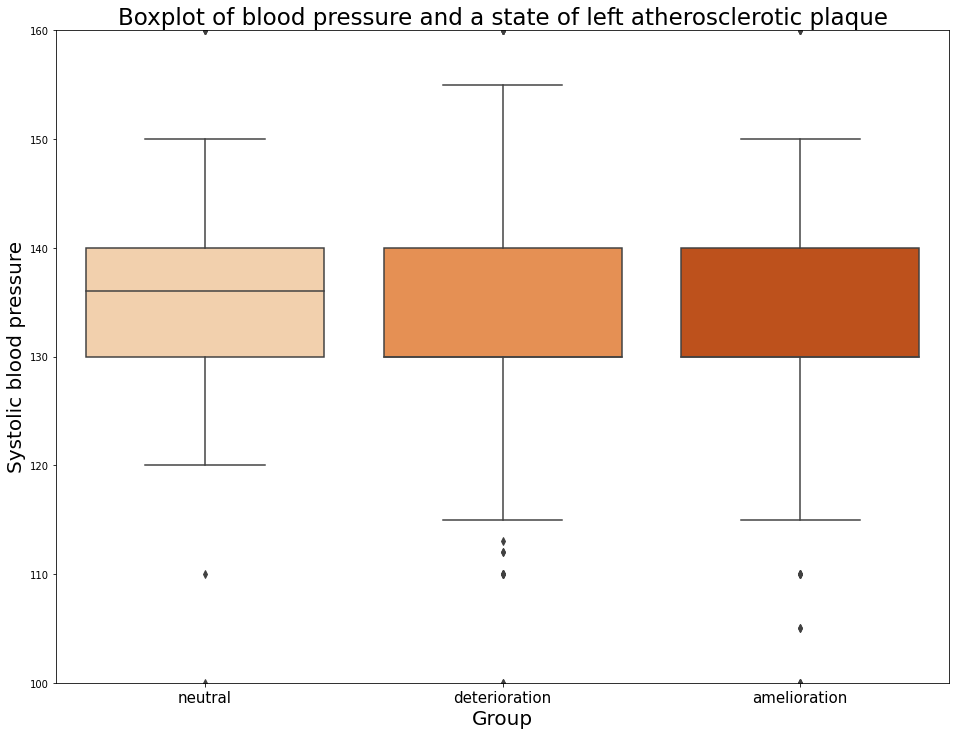

In [143]:
boxplot_systolic_bp_L = plt.figure(figsize=(16, 12))
sns.boxplot(data=dfs.sort_values(by='state_L'), y='systolic_BP', x='state_L', palette='Oranges').set(ylim=(100, 160))

plt.xticks([0, 1, 2],['neutral', 'deterioration' , 'amelioration'], fontsize = 15)
plt.title('Boxplot of blood pressure and a state of left atherosclerotic plaque', fontsize = 23) # title with fontsize
plt.xlabel('Group', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Systolic blood pressure', fontsize = 20) # y-axis label with fontsize 15

Text(0, 0.5, 'Diastolic blood pressure')

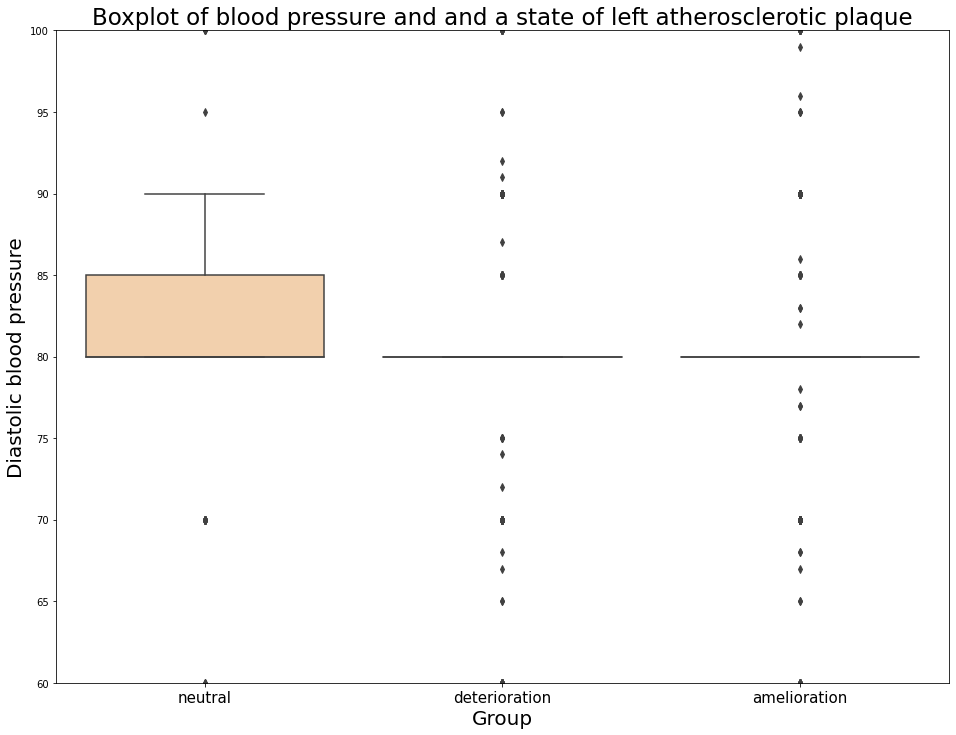

In [144]:
boxplot_diastolic_bp_L = plt.figure(figsize=(16, 12))
sns.boxplot(data=dfs.sort_values(by='state_L'), y='diastolic_BP', x='state_L', palette='Oranges').set(ylim =(60,100))


plt.xticks([0, 1, 2],['neutral', 'deterioration' , 'amelioration'], fontsize = 15)
plt.title('Boxplot of blood pressure and and a state of left atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('Group', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Diastolic blood pressure', fontsize = 20) # y-axis label with fontsize 15

In [145]:
df_BP_L = dfs.groupby(['BP_class_1', 'state_L']).state_L.count().reset_index(name='count_L')
df_BP_L

BP_class_1        state_L  count_L
0           0   amelioration       76
1           0  deterioration      438
2           0        neutral      448
3           1   amelioration       27
4           1  deterioration       99
5           1        neutral       87

In [146]:
df_BP_L['percent_L'] = df_BP_L['count_L']/df_BP_state * 100
df_BP_L

BP_class_1        state_L  count_L  percent_L
0           0   amelioration       76   7.900208
1           0  deterioration      438  45.530146
2           0        neutral      448  46.569647
3           1   amelioration       27  12.676056
4           1  deterioration       99  46.478873
5           1        neutral       87  40.845070

Text(0, 0.5, 'Representation in the group (%)')

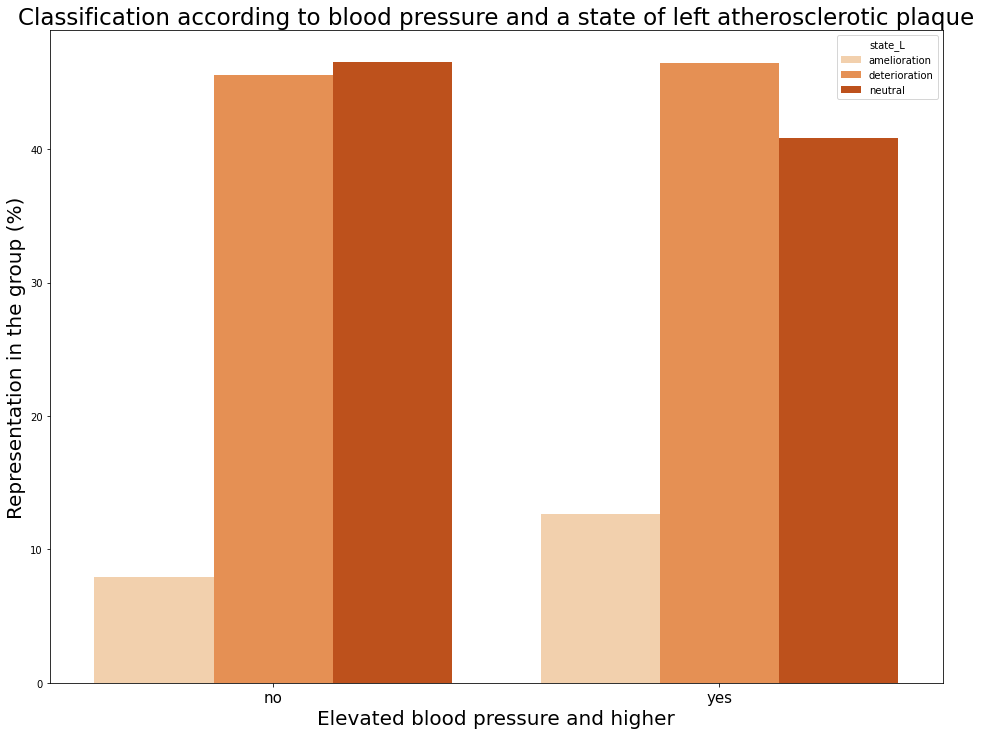

In [147]:
barchar_bp_L = plt.figure(figsize=(16, 12))
sns.barplot(data=df_BP_L, y='percent_L', x='BP_class_1', hue='state_L', palette='Oranges')

plt.xticks([0, 1],['no', 'yes'], fontsize = 15)
plt.title('Classification according to blood pressure and a state of left atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('Elevated blood pressure and higher', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Representation in the group (%)', fontsize = 20) # y-axis label with fontsize 15

Text(0, 0.5, 'Representation in the group (%)')

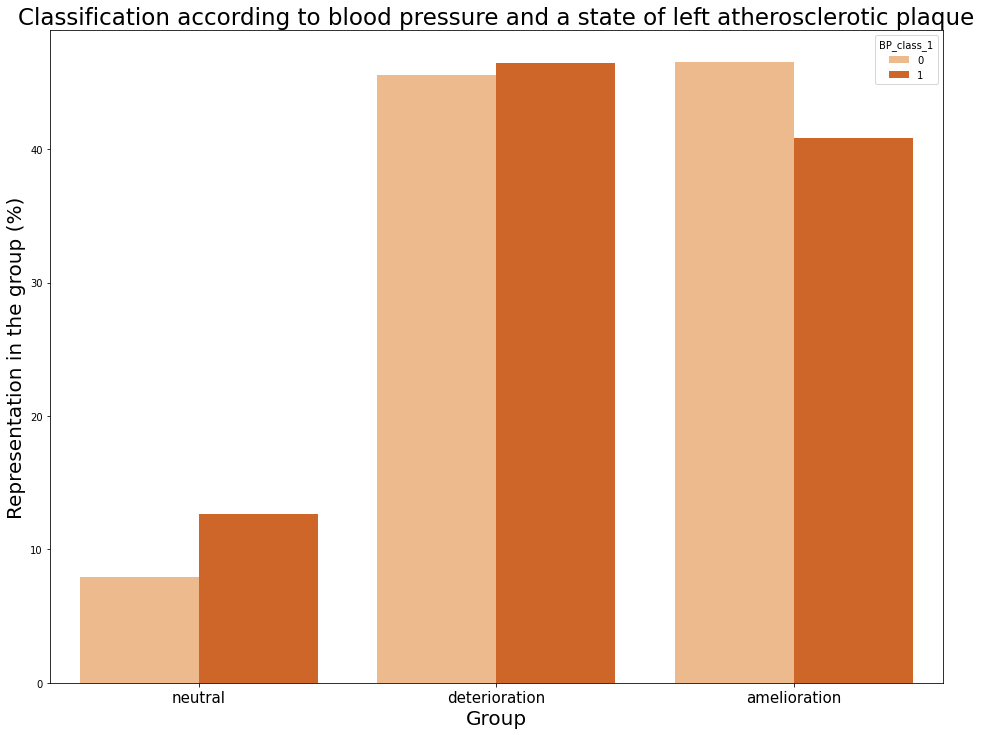

In [148]:
barchar_bp_L_1 = plt.figure(figsize=(16, 12))
sns.barplot(data=df_BP_L, y='percent_L', x='state_L', hue='BP_class_1', palette='Oranges')

plt.xticks([0, 1, 2],['neutral', 'deterioration' , 'amelioration'], fontsize = 15)
plt.title('Classification according to blood pressure and a state of left atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('Group', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Representation in the group (%)', fontsize = 20) # y-axis label with fontsize 15

Text(87.0, 0.5, 'Elevated blood pressure')

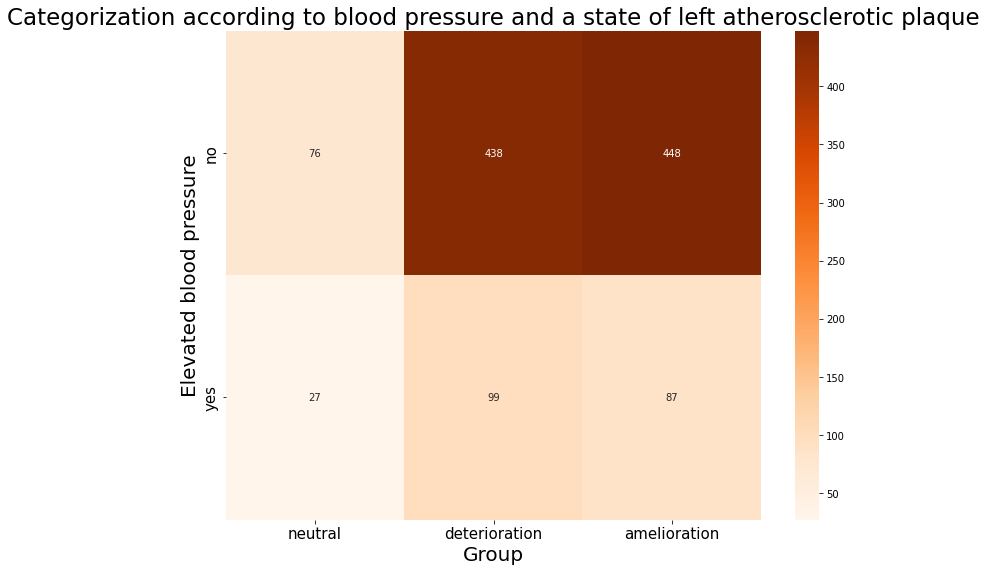

In [149]:
heat_bp_L = plt.figure(figsize=(12,9))
sns.heatmap(pd.crosstab(dfs.BP_class_1, df.state_L), annot=True, cmap='Oranges', fmt='g')


plt.xticks([0.5, 1.5, 2.5], ['neutral', 'deterioration' , 'amelioration'], fontsize = 15)
plt.yticks([0.5, 1.5], ['no', 'yes'], fontsize = 15)
plt.title('Categorization according to blood pressure and a state of left atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('Group', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Elevated blood pressure', fontsize = 20) # y-axis label with fontsize 15

### right plaque

Text(0, 0.5, 'Systolic blood pressure')

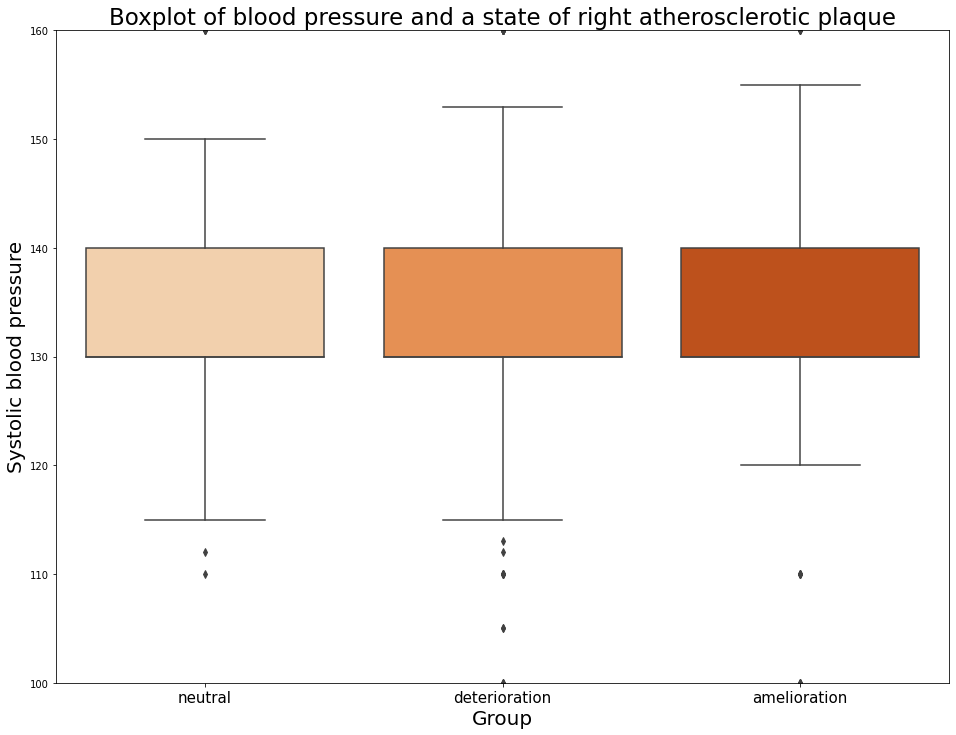

In [150]:
bocplot_systolic_bp_R = plt.figure(figsize=(16, 12))
sns.boxplot(data=dfs.sort_values(by='state_R'), y='systolic_BP', x='state_R', palette='Oranges').set(ylim=(100, 160))

plt.xticks([0, 1, 2],['neutral', 'deterioration' , 'amelioration'], fontsize = 15)
plt.title('Boxplot of blood pressure and a state of right atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('Group', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Systolic blood pressure', fontsize = 20) # y-axis label with fontsize 15

Text(0, 0.5, 'Diastolic blood pressure')

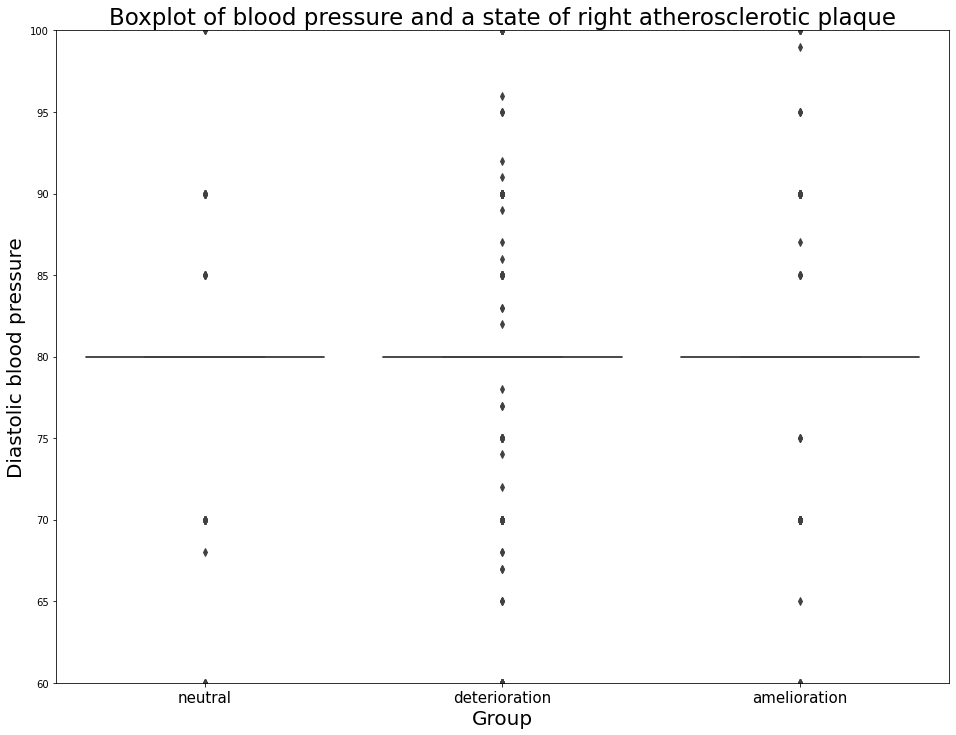

In [151]:
boxplot_diastolic_bp_R = plt.figure(figsize=(16, 12))
sns.boxplot(data=dfs.sort_values(by='state_R'), y='diastolic_BP', x='state_R', palette='Oranges').set(ylim =(60,100))


plt.xticks([0, 1, 2],['neutral', 'deterioration' , 'amelioration'], fontsize = 15)
plt.title('Boxplot of blood pressure and a state of right atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('Group', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Diastolic blood pressure', fontsize = 20) # y-axis label with fontsize 15

In [152]:
df_BP_R = dfs.groupby(['BP_class_1', 'state_R']).state_R.count().reset_index(name='count')
df_BP_R

BP_class_1        state_R  count
0           0   amelioration     98
1           0  deterioration    670
2           0        neutral    194
3           1   amelioration     19
4           1  deterioration    148
5           1        neutral     46

In [153]:
df_BP_R['percent_R'] = df_BP_R['count']/df_BP_state * 100
df_BP_R

BP_class_1        state_R  count  percent_R
0           0   amelioration     98  10.187110
1           0  deterioration    670  69.646570
2           0        neutral    194  20.166320
3           1   amelioration     19   8.920188
4           1  deterioration    148  69.483568
5           1        neutral     46  21.596244

Text(0, 0.5, 'Representation in the group (%)')

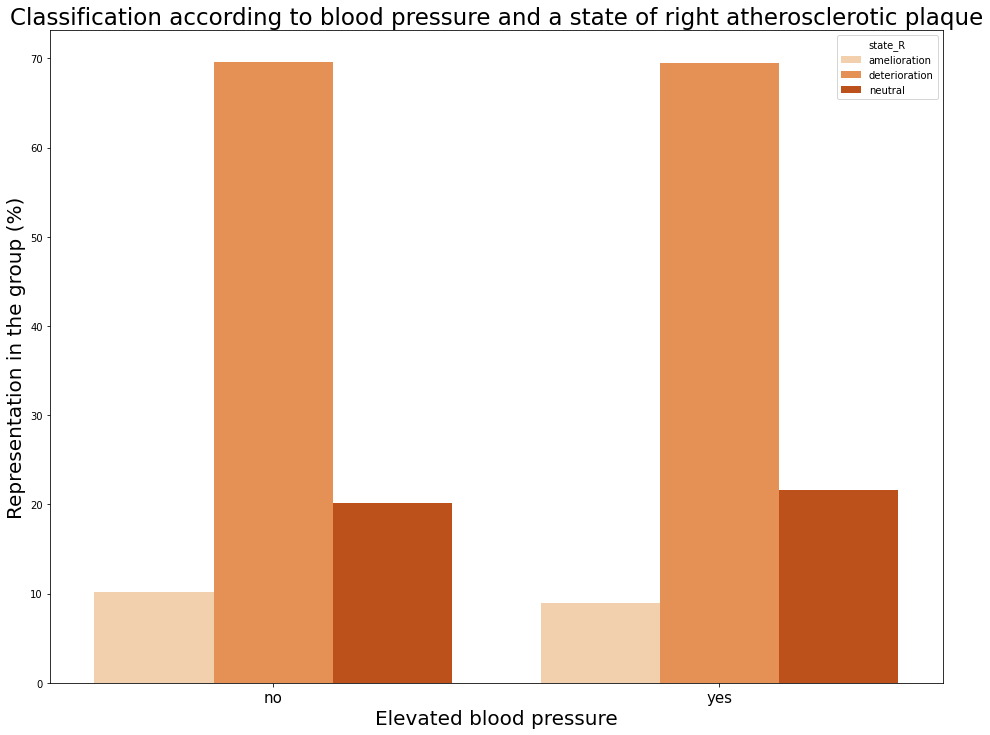

In [154]:
barchar_bp_R = plt.figure(figsize=(16, 12))
sns.barplot(data=df_BP_R, y='percent_R', x='BP_class_1', hue='state_R', palette='Oranges')

plt.xticks([0, 1],['no', 'yes'], fontsize = 15)
plt.title('Classification according to blood pressure and a state of right atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('Elevated blood pressure', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Representation in the group (%)', fontsize = 20) # y-axis label with fontsize 15

Text(0, 0.5, 'Representation in the group (%)')

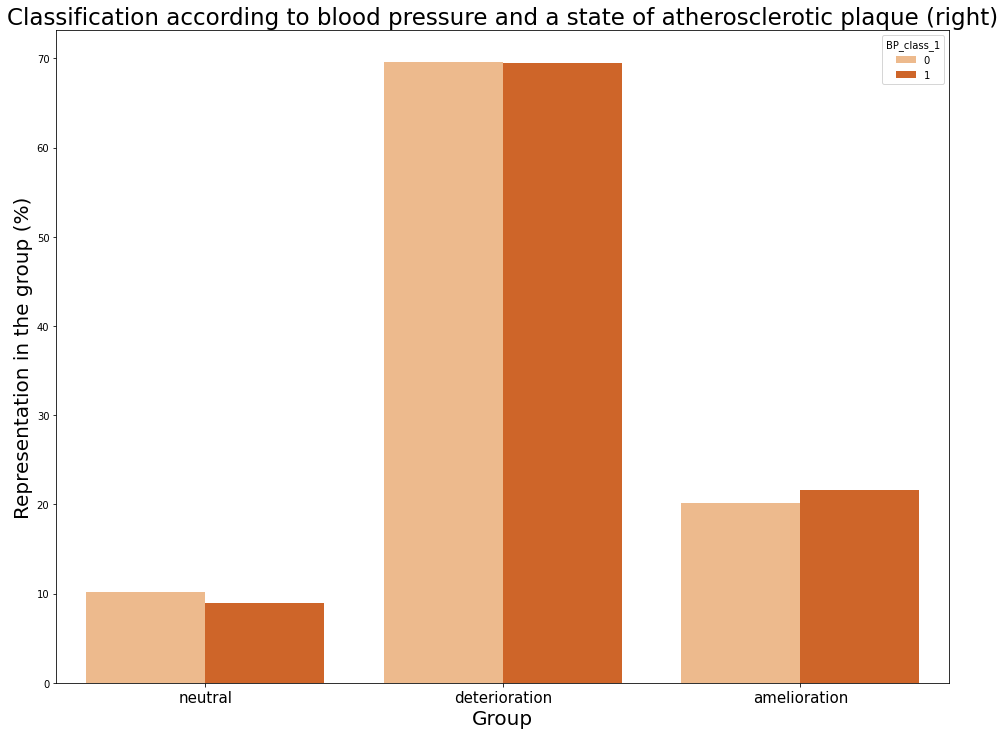

In [155]:
barchar_bp_R_1 = plt.figure(figsize=(16, 12))
sns.barplot(data=df_BP_R, y='percent_R', x='state_R', hue='BP_class_1', palette='Oranges')

plt.xticks([0, 1, 2],['neutral', 'deterioration' , 'amelioration'], fontsize=15)
plt.title('Classification according to blood pressure and a state of atherosclerotic plaque (right)', fontsize = 23) # title with fontsize 23
plt.xlabel('Group', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Representation in the group (%)', fontsize = 20) # y-axis label with fontsize 15

Text(87.0, 0.5, 'Elevated blood pressure and higher')

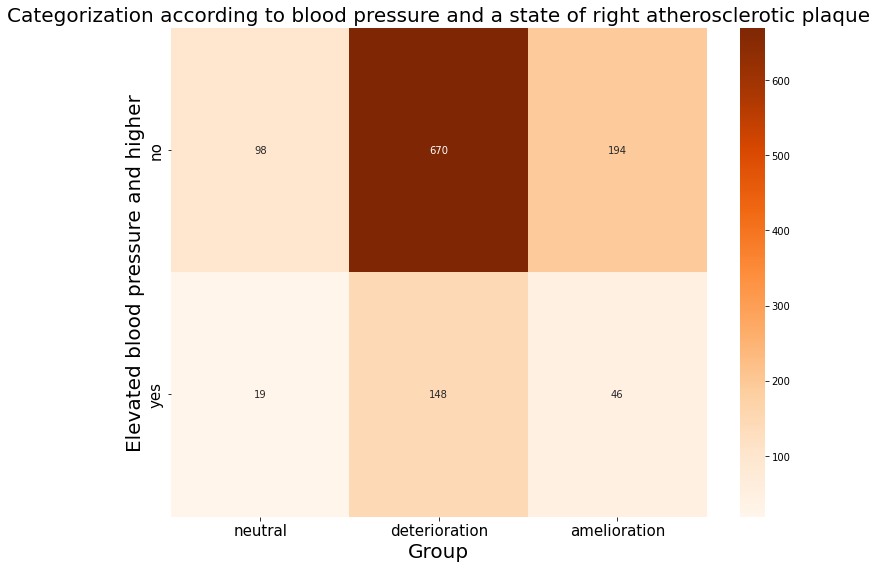

In [156]:
heat_bp_R = plt.figure(figsize=(12,9))
sns.heatmap(pd.crosstab(dfs.BP_class_1, df.state_R), annot=True, cmap='Oranges', fmt='g')

plt.xticks([0.5, 1.5, 2.5],['neutral', 'deterioration' , 'amelioration'], fontsize = 15)
plt.yticks([0.5, 1.5],['no', 'yes'], fontsize = 15)
plt.title('Categorization according to blood pressure and a state of right atherosclerotic plaque', fontsize = 20) # title with fontsize 20
plt.xlabel('Group', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Elevated blood pressure and higher', fontsize = 20) # y-axis label with fontsize 15

## 3.2 High blood pressure
- High blood pressure (1,0): df_HBP

In [157]:
df_HBP = df.high_blood_pressure.value_counts().reset_index(name='count').rename({'index': 'high blood pressure'}, axis=1)
#df_HBP = df_HBP[::-1]
df_HBP

high blood pressure  count
0                    1    915
1                    0    260

Text(0, 0.5, 'Count')

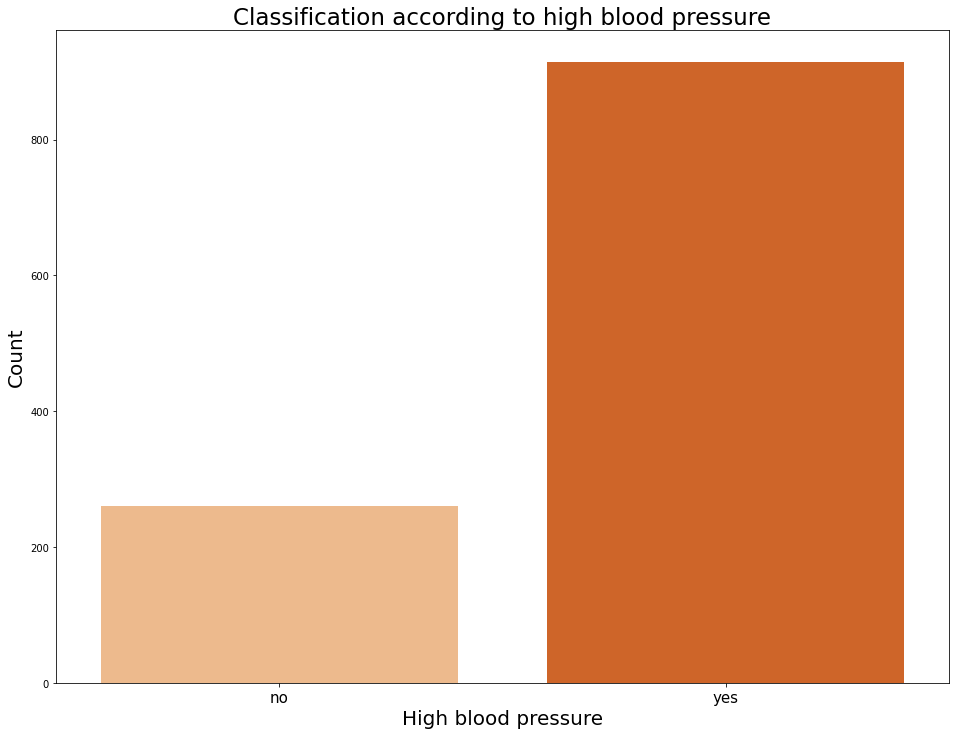

In [158]:
barchar_hbp_count = plt.figure(figsize=(16, 12))
sns.barplot(data = df_HBP, x='high blood pressure', y='count', palette='Oranges')

plt.xticks([0, 1],['no', 'yes'], fontsize=15)
plt.title('Classification according to high blood pressure', fontsize = 23) # title with fontsize 23
plt.xlabel('High blood pressure', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Count', fontsize = 20) # y-axis label with fontsize 15

In [159]:
df_HBP_sum = [df_HBP.sum()[1], df_HBP.sum()[1]]

In [160]:
df_HBP.sum()[1]

1175

In [161]:
df_HBP['percent'] = df_HBP['count']/df_HBP_sum * 100
df_HBP

high blood pressure  count   percent
0                    1    915  77.87234
1                    0    260  22.12766

Text(0, 0.5, 'Representation in the group (%)')

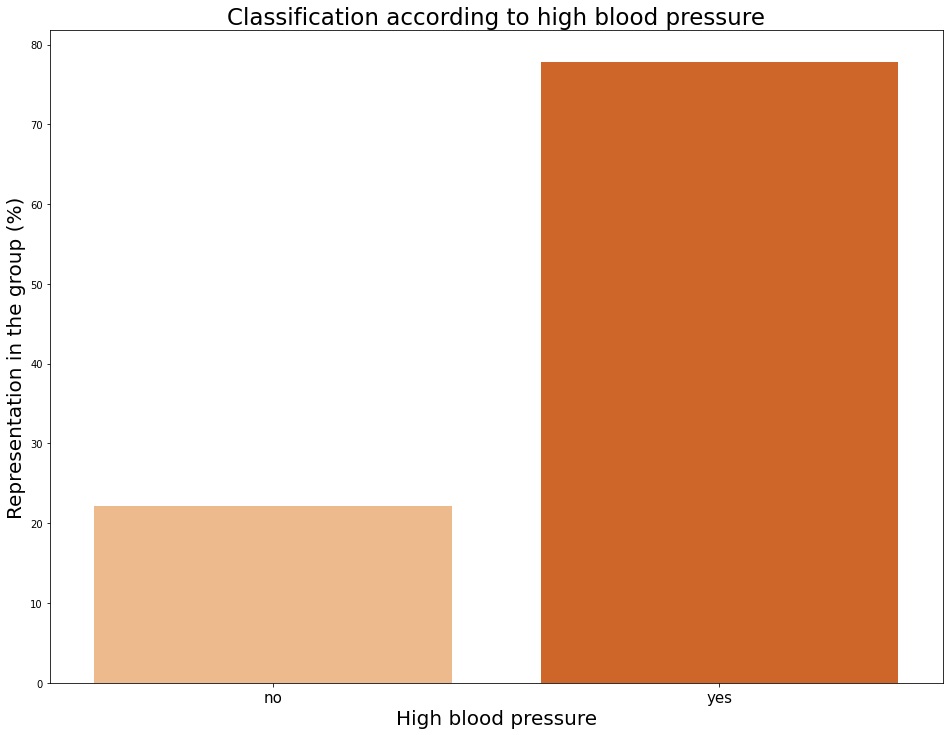

In [162]:
barchar_hbp_percent = plt.figure(figsize=(16, 12))

sns.barplot(data = df_HBP, x='high blood pressure', y='percent', palette='Oranges')

plt.xticks([0, 1],['no', 'yes'], fontsize=15)
plt.title('Classification according to high blood pressure', fontsize = 23) # title with fontsize 23
plt.xlabel('High blood pressure', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Representation in the group (%)', fontsize = 20) # y-axis label with fontsize 15

### left plaque

In [163]:
df_HBP_L = dfs.groupby(['high_blood_pressure', 'state_L']).state_L.count().reset_index(name='count_L')
df_HBP_L

high_blood_pressure        state_L  count_L
0                    0   amelioration       25
1                    0  deterioration      111
2                    0        neutral      124
3                    1   amelioration       78
4                    1  deterioration      426
5                    1        neutral      411

In [164]:
df_HBP_L['percent_L'] = df_HBP_L['count_L']/df_HBP_state * 100
df_HBP_L

high_blood_pressure        state_L  count_L  percent_L
0                    0   amelioration       25   9.615385
1                    0  deterioration      111  42.692308
2                    0        neutral      124  47.692308
3                    1   amelioration       78   8.524590
4                    1  deterioration      426  46.557377
5                    1        neutral      411  44.918033

Text(0, 0.5, 'Representation in the group (%)')

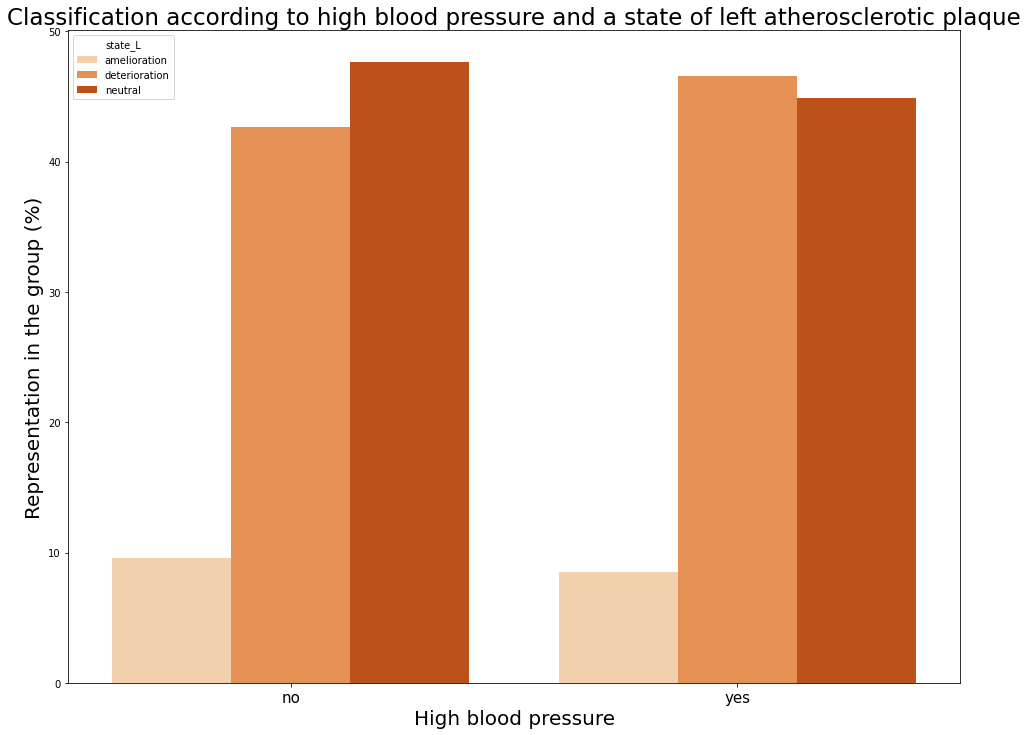

In [165]:
barchar_hbp_L = plt.figure(figsize=(16, 12))
sns.barplot(data=df_HBP_L, y='percent_L', x='high_blood_pressure', hue='state_L', palette='Oranges', )

plt.xticks([0, 1],['no', 'yes'], fontsize=15)
plt.title('Classification according to high blood pressure and a state of left atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('High blood pressure', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Representation in the group (%)', fontsize = 20) # y-axis label with fontsize 15

Text(0.5, 0, 'Group (%)')

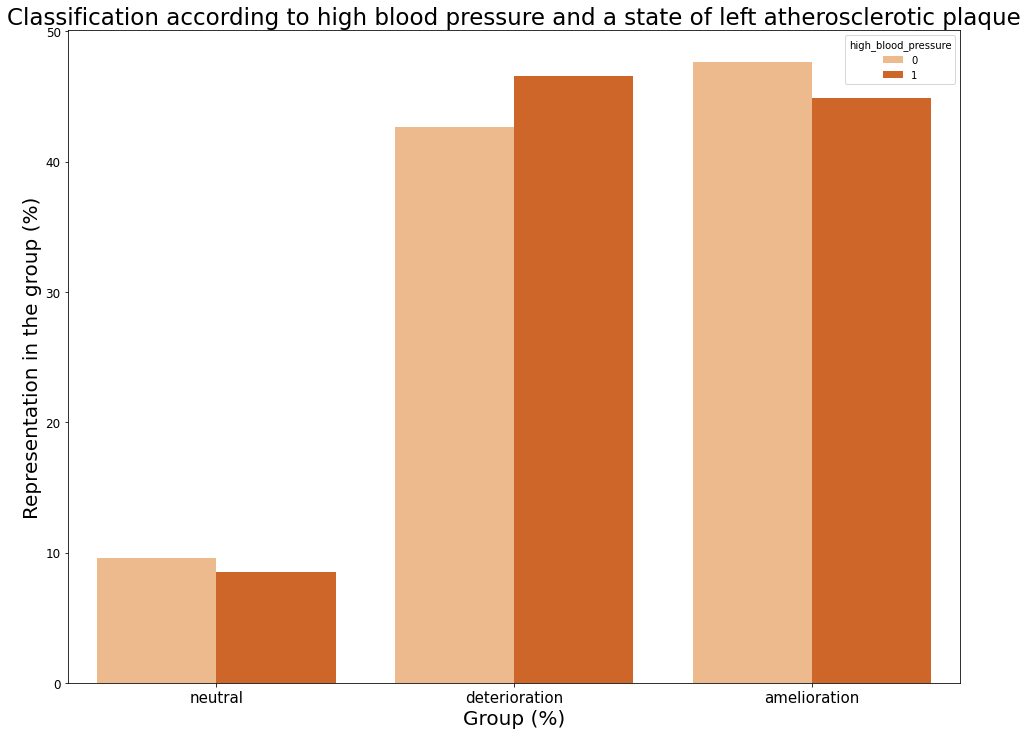

In [166]:
barchar_hbp_L_1 = plt.figure(figsize=(16, 12))
sns.barplot(data=df_HBP_L, y='percent_L', x='state_L', hue='high_blood_pressure', palette='Oranges')

plt.xticks([0, 1, 2],['neutral', 'deterioration' , 'amelioration'], fontsize = 15)
plt.yticks(fontsize = 12)
plt.title('Classification according to high blood pressure and a state of left atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.ylabel('Representation in the group (%)', fontsize = 20) # x-axis label with fontsize 15
plt.xlabel('Group (%)', fontsize = 20) # y-axis label with fontsize 15

In [167]:
pd.crosstab(df.high_blood_pressure, df.state_L)

state_L              amelioration  deterioration  neutral
high_blood_pressure                                      
0                              25            111      124
1                              78            426      411

Text(87.0, 0.5, 'High blood pressure')

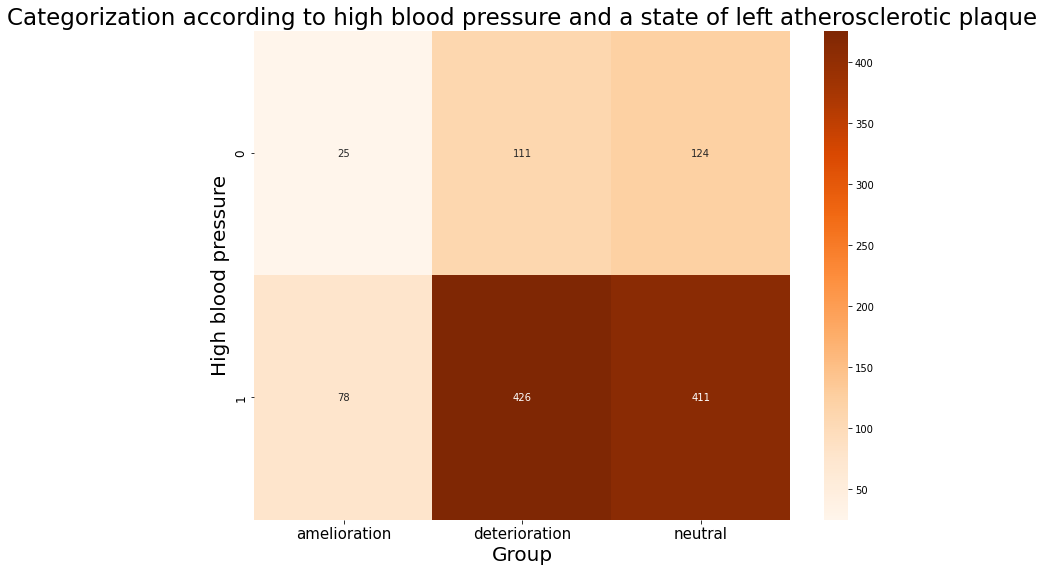

In [168]:
heat_hbp_L = plt.figure(figsize=(12,9))
sns.heatmap(pd.crosstab(df.high_blood_pressure, df.state_L), annot=True, cmap='Oranges', fmt='g')

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 12)
plt.title('Categorization according to high blood pressure and a state of left atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('Group', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('High blood pressure', fontsize = 20) # y-axis label with fontsize 15

### right plaque

In [169]:
df_HBP_R = dfs.groupby(['high_blood_pressure', 'state_R']).state_R.count().reset_index(name='count_R')
df_HBP_R

high_blood_pressure        state_R  count_R
0                    0   amelioration       29
1                    0  deterioration      188
2                    0        neutral       43
3                    1   amelioration       88
4                    1  deterioration      630
5                    1        neutral      197

In [170]:
df_HBP_R['percent_R'] = df_HBP_R['count_R']/df_HBP_state * 100
df_HBP_R

high_blood_pressure        state_R  count_R  percent_R
0                    0   amelioration       29  11.153846
1                    0  deterioration      188  72.307692
2                    0        neutral       43  16.538462
3                    1   amelioration       88   9.617486
4                    1  deterioration      630  68.852459
5                    1        neutral      197  21.530055

Text(0, 0.5, 'Representation in the group (%)')

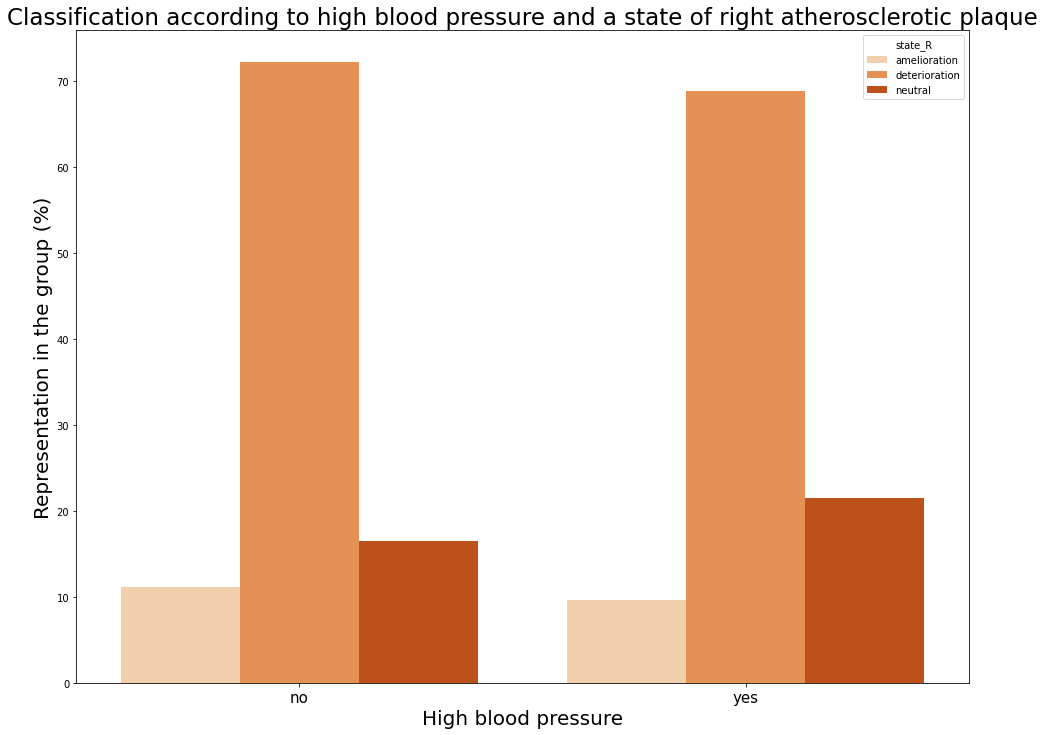

In [171]:
barchar_hbp_R = plt.figure(figsize=(16, 12))
sns.barplot(data=df_HBP_R, y='percent_R', x='high_blood_pressure', hue='state_R', palette='Oranges')

plt.xticks([0, 1],['no', 'yes'], fontsize = 15)
plt.title('Classification according to high blood pressure and a state of right atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('High blood pressure', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Representation in the group (%)', fontsize = 20) # y-axis label with fontsize 15

Text(0.5, 0, 'Group')

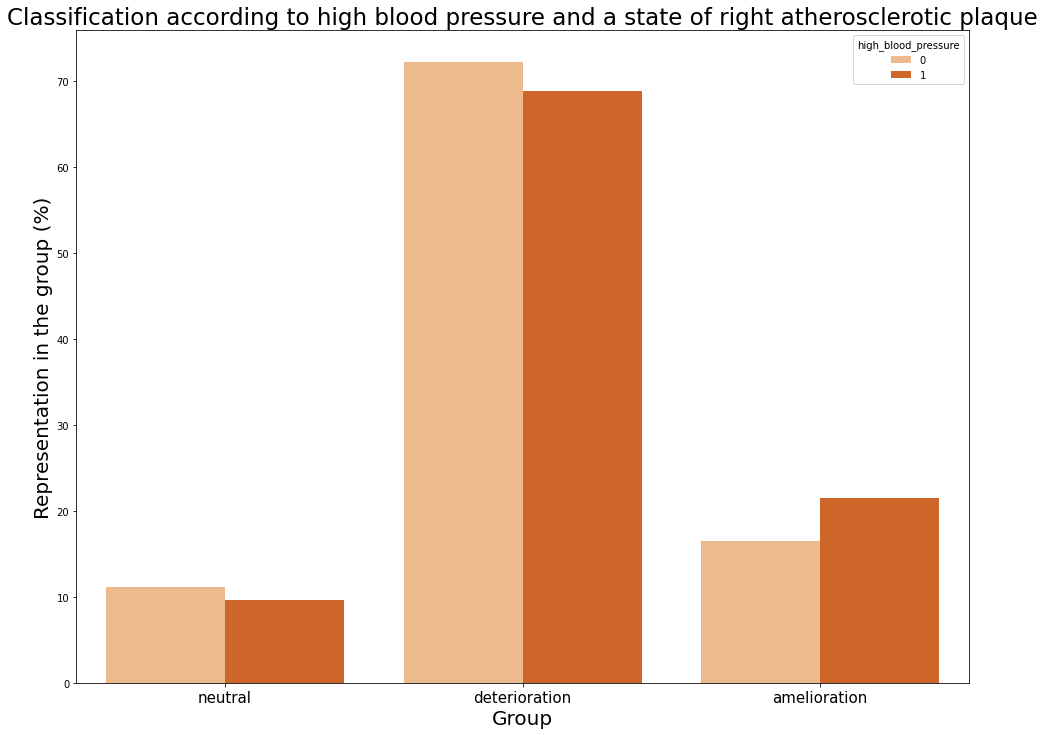

In [172]:
barchar_hbp_R_1 = plt.figure(figsize=(16, 12))
sns.barplot(data=df_HBP_R, y='percent_R', x='state_R', hue='high_blood_pressure', palette='Oranges')

plt.xticks([0, 1, 2],['neutral', 'deterioration' , 'amelioration'], fontsize = 15)
plt.title('Classification according to high blood pressure and a state of right atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.ylabel('Representation in the group (%)', fontsize = 20) # x-axis label with fontsize 15
plt.xlabel('Group', fontsize = 20) # y-axis label with fontsize 15

In [173]:
pd.crosstab(df.high_blood_pressure, df.state_R)

state_R              amelioration  deterioration  neutral
high_blood_pressure                                      
0                              29            188       43
1                              88            630      197

Text(87.0, 0.5, 'High blood pressure')

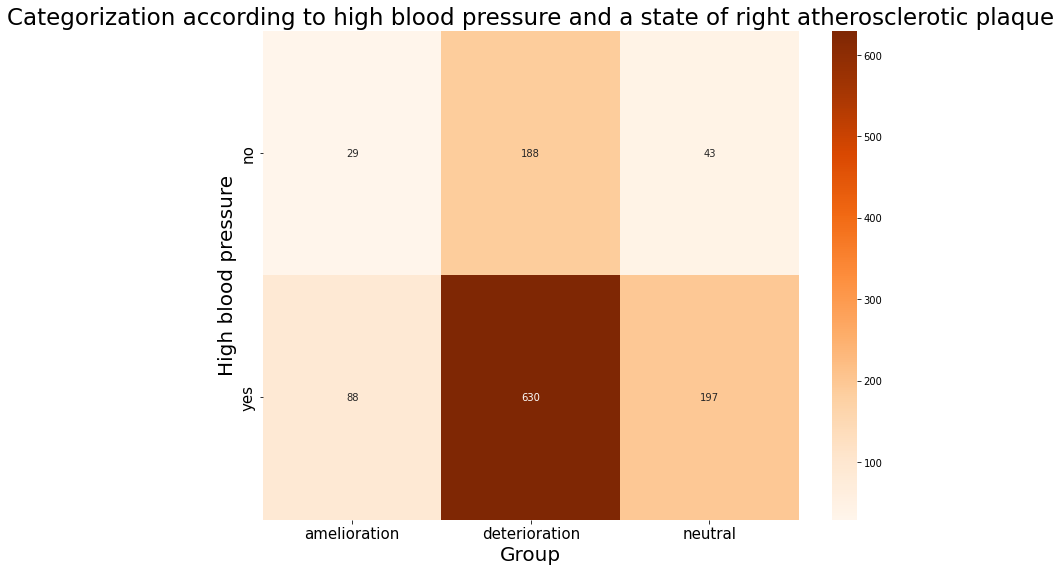

In [174]:
heat_hbp_R = plt.figure(figsize=(12,9))
sns.heatmap(pd.crosstab(df.high_blood_pressure, df.state_R), annot=True, cmap='Oranges', fmt='g')

plt.xticks(fontsize = 15)
plt.yticks([0.5, 1.5], ['no', 'yes'], fontsize = 15)
plt.title('Categorization according to high blood pressure and a state of right atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('Group', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('High blood pressure', fontsize = 20) # y-axis label with fontsize 15

## 4. Cholesterol

In [175]:
df.cholesterol.value_counts().reset_index(name='count').rename({'index': 'cholesterol'}, axis=1)

cholesterol  count
0            1    647
1            0    528

Text(0, 0.5, 'Count')

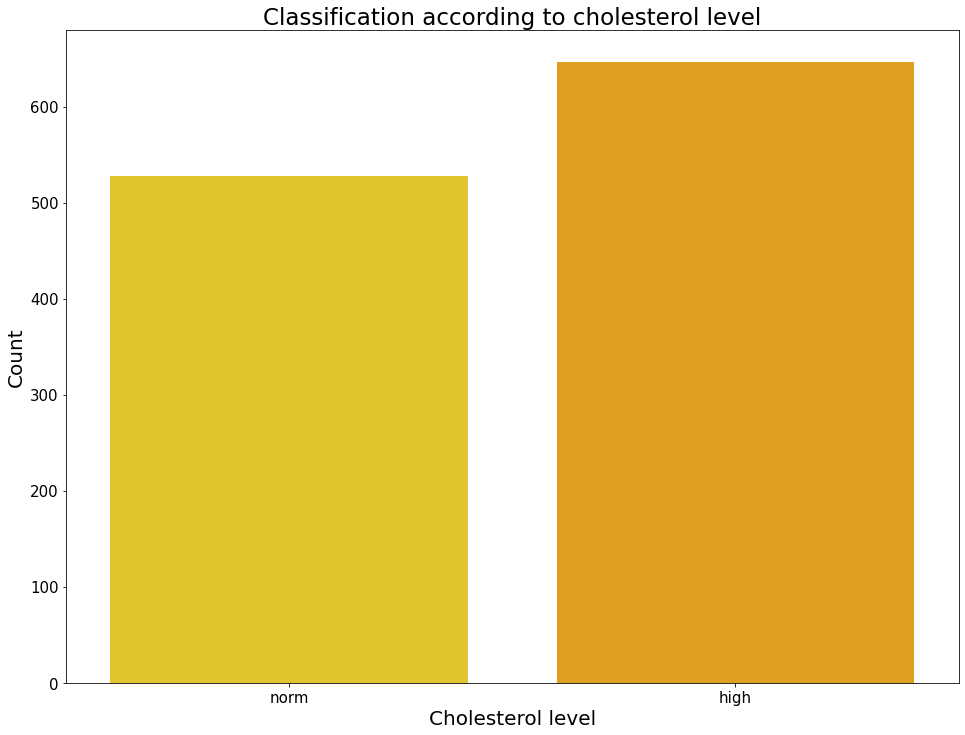

In [176]:
barchar_chol_count = plt.figure(figsize=(16, 12))
sns.barplot(data = df.cholesterol.value_counts().reset_index(name='count').rename({'index': 'cholesterol'}, axis=1), x='cholesterol', y='count', palette='Wistia')

plt.xticks([0, 1], ['norm', 'high'], fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Classification according to cholesterol level', fontsize = 23) # title with fontsize 23
plt.xlabel('Cholesterol level', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Count', fontsize = 20) # y-axis label with fontsize 15

In [177]:
df_chol_sum = df.cholesterol.value_counts().reset_index(name='count').rename({'index': 'cholesterol'}, axis=1)['count'].sum()

In [178]:
df_chol = df.cholesterol.value_counts().reset_index(name='count').rename({'index': 'cholesterol'}, axis=1)

In [179]:
df_chol['percent'] = df_chol['count'] / df_chol_sum * 100
df_chol

cholesterol  count   percent
0            1    647  55.06383
1            0    528  44.93617

Text(0, 0.5, 'Percent (%)')

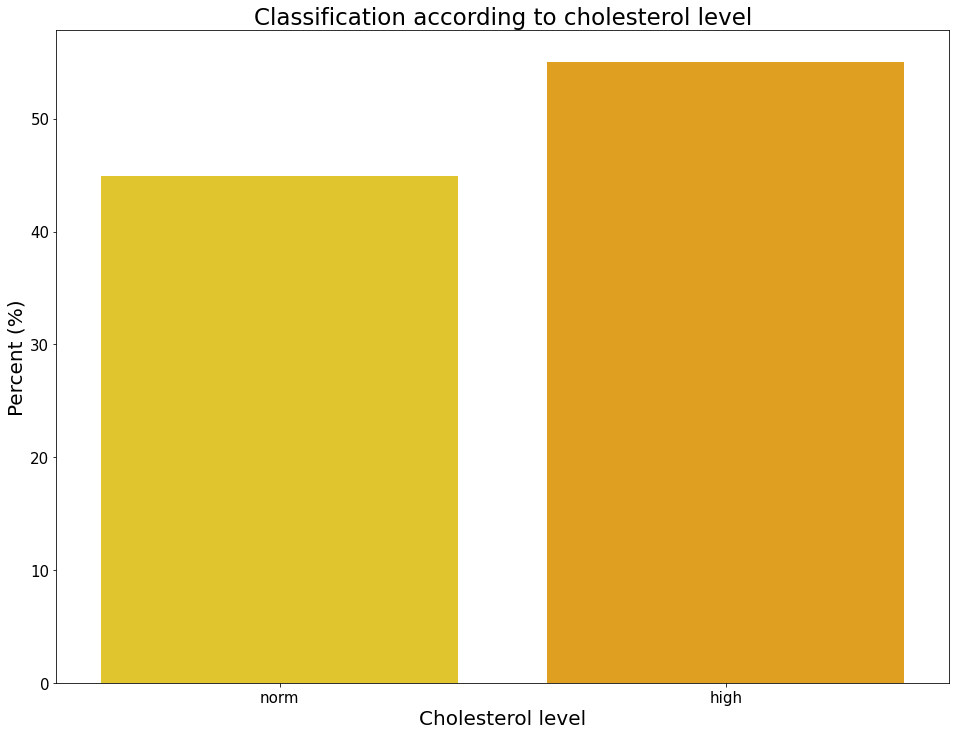

In [180]:
barchar_chol_percent = plt.figure(figsize=(16, 12))

sns.barplot(data = df_chol, x='cholesterol', y='percent', palette='Wistia')

plt.xticks([0, 1], ['norm', 'high'], fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Classification according to cholesterol level', fontsize = 23) # title with fontsize 23
plt.xlabel('Cholesterol level', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Percent (%)', fontsize = 20) # y-axis label with fontsize 15

### left plaque

In [181]:
df_chol_L = dfs.groupby(['cholesterol', 'state_L']).state_L.count().reset_index(name='count_L')
df_chol_L

cholesterol        state_L  count_L
0            0   amelioration       52
1            0  deterioration      229
2            0        neutral      247
3            1   amelioration       51
4            1  deterioration      308
5            1        neutral      288

In [182]:
df_chol_L.describe()

cholesterol     count_L
count     6.000000    6.000000
mean      0.500000  195.833333
std       0.547723  115.289924
min       0.000000   51.000000
25%       0.000000   96.250000
50%       0.500000  238.000000
75%       1.000000  277.750000
max       1.000000  308.000000

In [183]:
df_chol_L['percent_L'] = df_chol_L['count_L']/df_chol_state * 100
df_chol_L

cholesterol        state_L  count_L  percent_L
0            0   amelioration       52   9.848485
1            0  deterioration      229  43.371212
2            0        neutral      247  46.780303
3            1   amelioration       51   7.882535
4            1  deterioration      308  47.604328
5            1        neutral      288  44.513138

Text(0, 0.5, 'The difference of width of the plaque (%)')

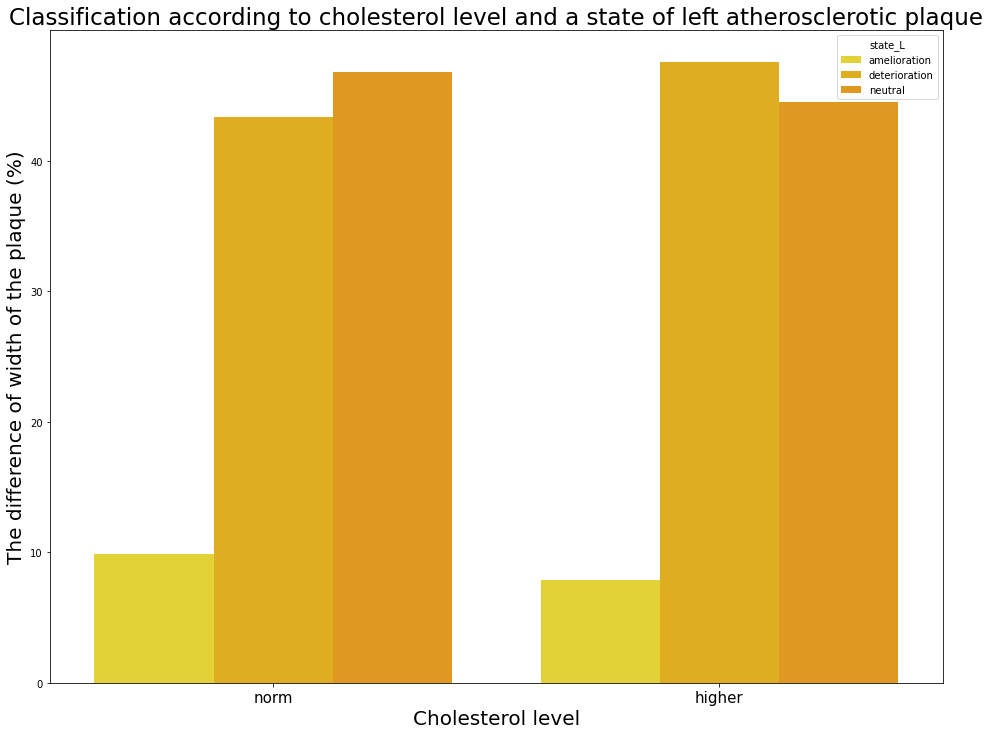

In [184]:
barchar_chol_L = plt.figure(figsize=(16, 12))
sns.barplot(data=df_chol_L, y='percent_L', x='cholesterol', hue='state_L', palette='Wistia')

plt.xticks([0, 1],['norm', 'higher'], fontsize = 15)
plt.title('Classification according to cholesterol level and a state of left atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('Cholesterol level', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('The difference of width of the plaque (%)', fontsize = 20) # y-axis label with fontsize 15

Text(0, 0.5, 'The difference of width of the plaque (%)')

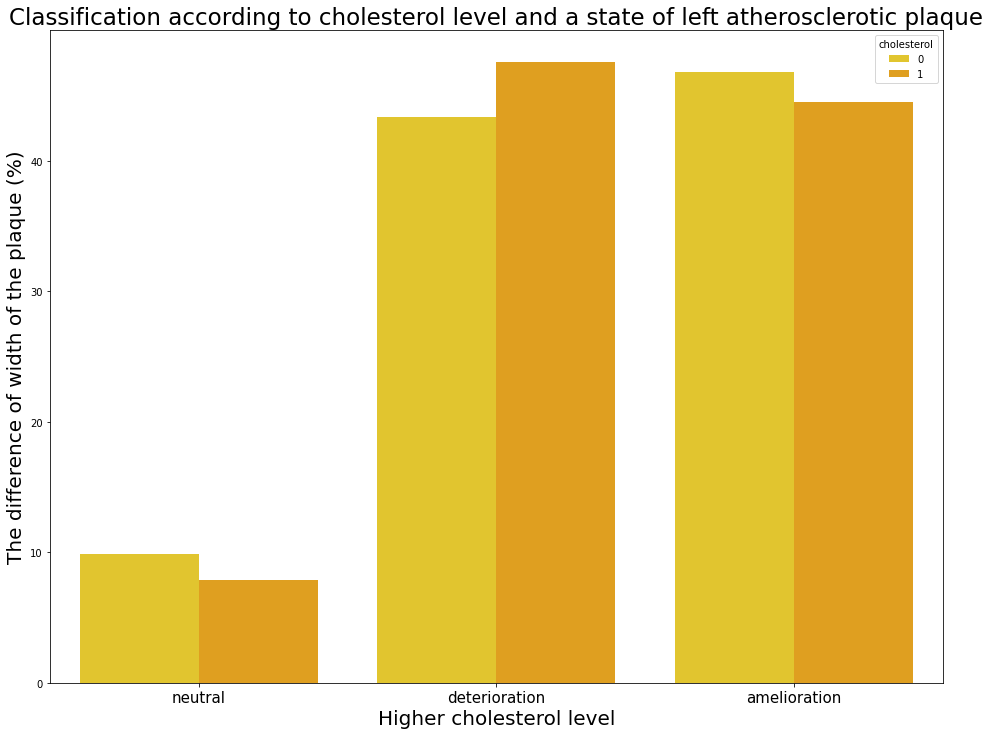

In [185]:
barchar_chol_L_1 = plt.figure(figsize=(16, 12))
sns.barplot(data=df_chol_L, y='percent_L', x='state_L', hue='cholesterol', palette='Wistia')

plt.xticks([0, 1, 2],['neutral', 'deterioration' , 'amelioration'], fontsize = 15)
plt.title('Classification according to cholesterol level and a state of left atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('Higher cholesterol level', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('The difference of width of the plaque (%)', fontsize = 20) # y-axis label with fontsize 15

In [186]:
pd.crosstab(df.cholesterol, df.state_L)

state_L      amelioration  deterioration  neutral
cholesterol                                      
0                      52            229      247
1                      51            308      288

Text(87.0, 0.5, 'Cholesterol')

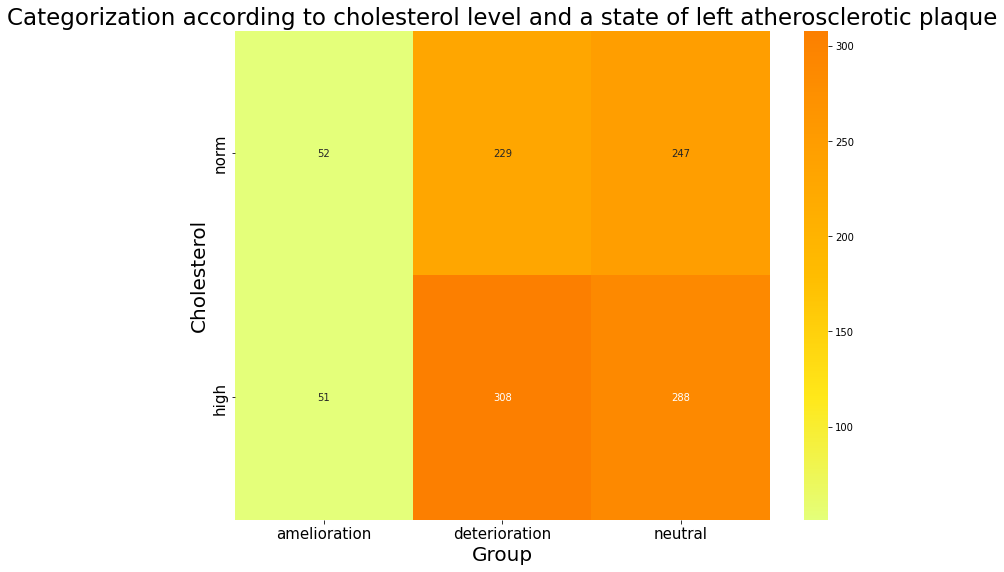

In [187]:
heat_chol_L = plt.figure(figsize=(12,9))
sns.heatmap(pd.crosstab(df.cholesterol, df.state_L), annot=True, cmap='Wistia', fmt='g')

plt.xticks(fontsize = 15)
plt.yticks([0.5, 1.5], ['norm', 'high'], fontsize = 15)
plt.title('Categorization according to cholesterol level and a state of left atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('Group', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Cholesterol', fontsize = 20) # y-axis label with fontsize 15

### right plaque

In [188]:
df_chol_R = dfs.groupby(['cholesterol', 'state_R']).state_R.count().reset_index(name='count_R')
df_chol_R

cholesterol        state_R  count_R
0            0   amelioration       60
1            0  deterioration      364
2            0        neutral      104
3            1   amelioration       57
4            1  deterioration      454
5            1        neutral      136

In [189]:
df_chol_R.describe()

cholesterol     count_R
count     6.000000    6.000000
mean      0.500000  195.833333
std       0.547723  170.099285
min       0.000000   57.000000
25%       0.000000   71.000000
50%       0.500000  120.000000
75%       1.000000  307.000000
max       1.000000  454.000000

In [190]:
df_chol_R['percent_R'] = (df_chol_R['count_R']/df_chol_state) * 100
df_chol_R

cholesterol        state_R  count_R  percent_R
0            0   amelioration       60  11.363636
1            0  deterioration      364  68.939394
2            0        neutral      104  19.696970
3            1   amelioration       57   8.809892
4            1  deterioration      454  70.170015
5            1        neutral      136  21.020093

Text(0, 0.5, 'The difference of width of the plaque (%)')

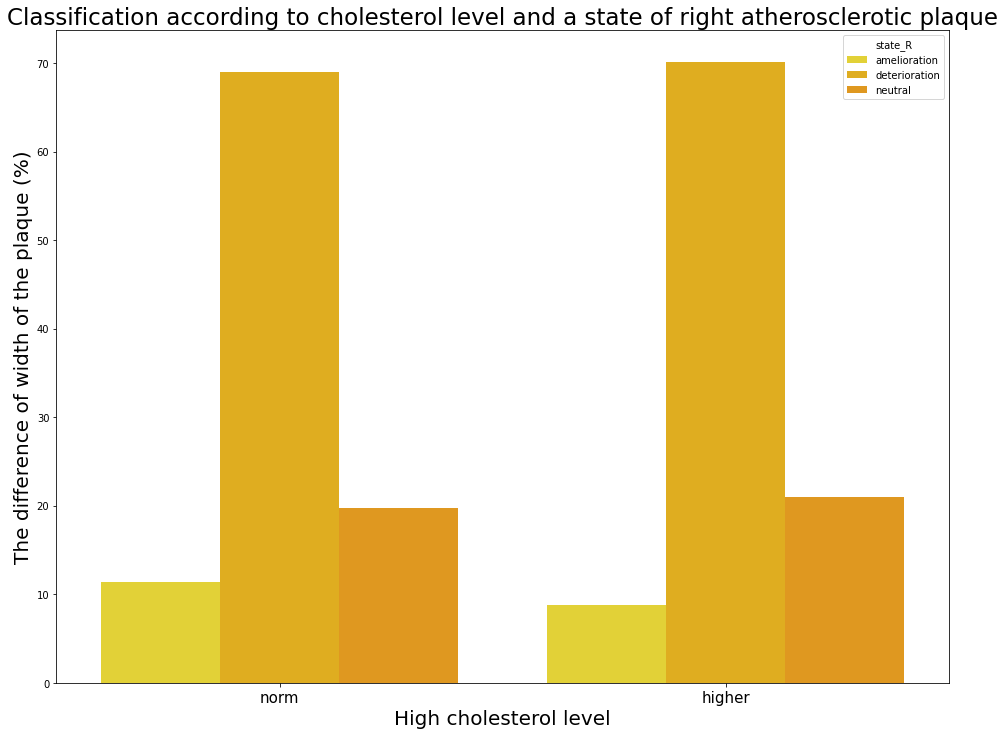

In [191]:
barchar_chol_R = plt.figure(figsize=(16, 12))
sns.barplot(data=df_chol_R, y='percent_R', x='cholesterol', hue='state_R', palette='Wistia')

plt.xticks([0, 1], ['norm', 'higher'], fontsize = 15)
plt.title('Classification according to cholesterol level and a state of right atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('High cholesterol level', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('The difference of width of the plaque (%)', fontsize = 20) # y-axis label with fontsize 15

Text(0, 0.5, 'Representation in the group (%)')

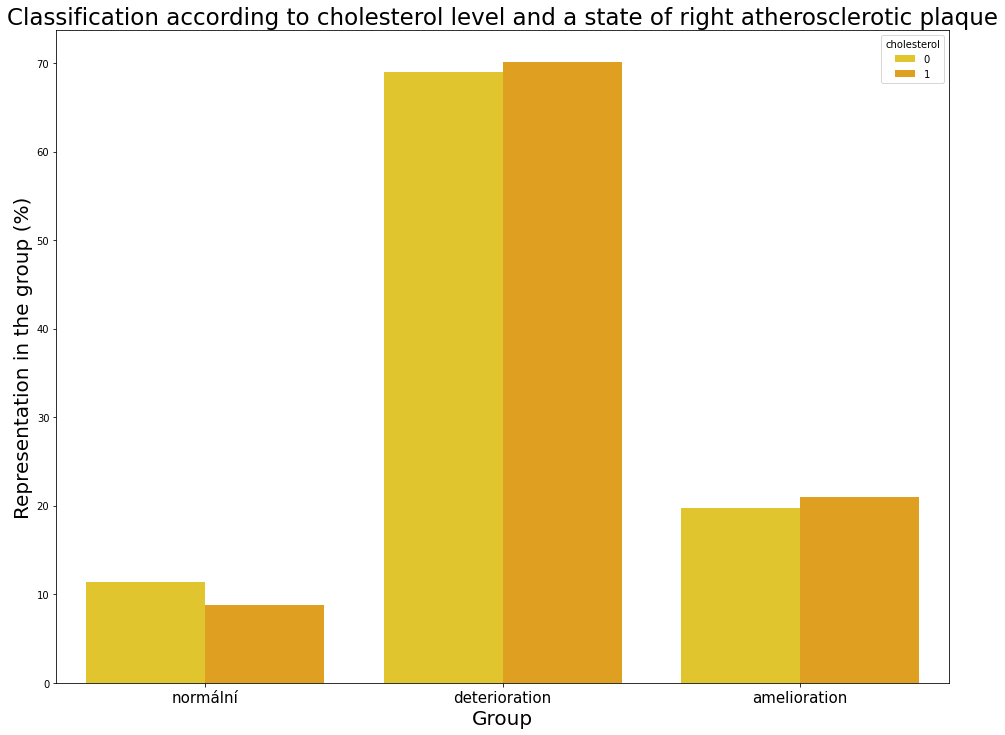

In [192]:
barchar_chol_R_1 = plt.figure(figsize=(16, 12))
sns.barplot(data=df_chol_R, y='percent_R', x='state_R', hue='cholesterol', palette='Wistia')

plt.xticks([0, 1, 2], ['normální', 'deterioration', 'amelioration'], fontsize = 15)
plt.title('Classification according to cholesterol level and a state of right atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('Group', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Representation in the group (%)', fontsize = 20) # y-axis label with fontsize 15

In [193]:
pd.crosstab(df.cholesterol, df.state_R)

state_R      amelioration  deterioration  neutral
cholesterol                                      
0                      60            364      104
1                      57            454      136

Text(87.0, 0.5, 'Cholesterol')

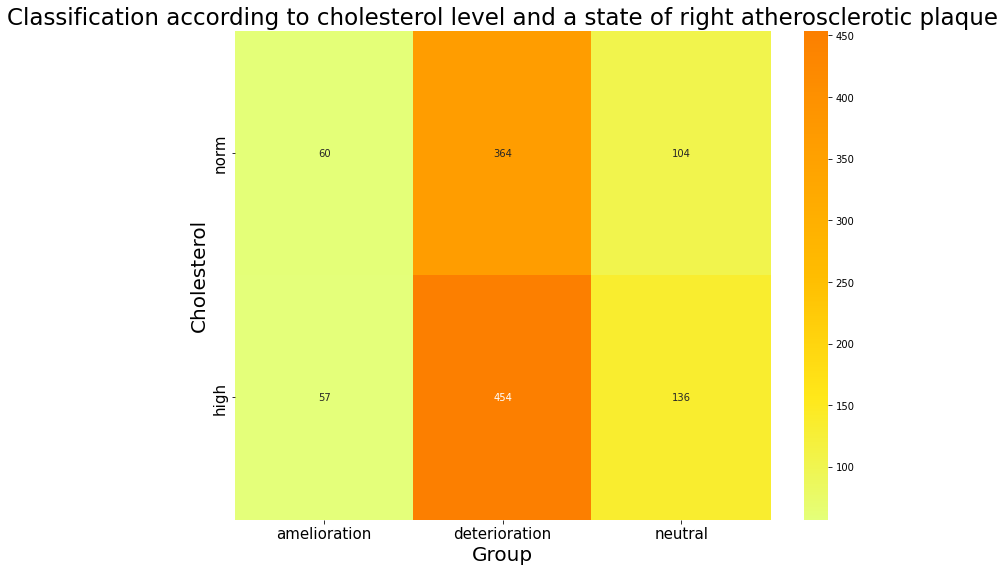

In [194]:
heat_chol_R = plt.figure(figsize=(12,9))
sns.heatmap(pd.crosstab(df.cholesterol, df.state_R), annot=True, cmap='Wistia', fmt='g')

plt.xticks(fontsize = 15)
plt.yticks([0.5, 1.5], ['norm', 'high'], fontsize = 15)
plt.title('Classification according to cholesterol level and a state of right atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('Group', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Cholesterol', fontsize = 20) # y-axis label with fontsize 15

## 5. Alcohol

In [195]:
df_alc = df.alcohol.value_counts().reset_index(name='count').rename({'index': 'alcohol'}, axis=1)
df_alc

alcohol  count
0        0    478
1        1    451
2        2    224
3        3     20
4        5      1
5        4      1

In [196]:
df_alc['percent'] = df_alc['count'] / df_alc['count'].sum() * 100
df_alc

alcohol  count    percent
0        0    478  40.680851
1        1    451  38.382979
2        2    224  19.063830
3        3     20   1.702128
4        5      1   0.085106
5        4      1   0.085106

Text(0, 0.5, 'Representation in the group (%)')

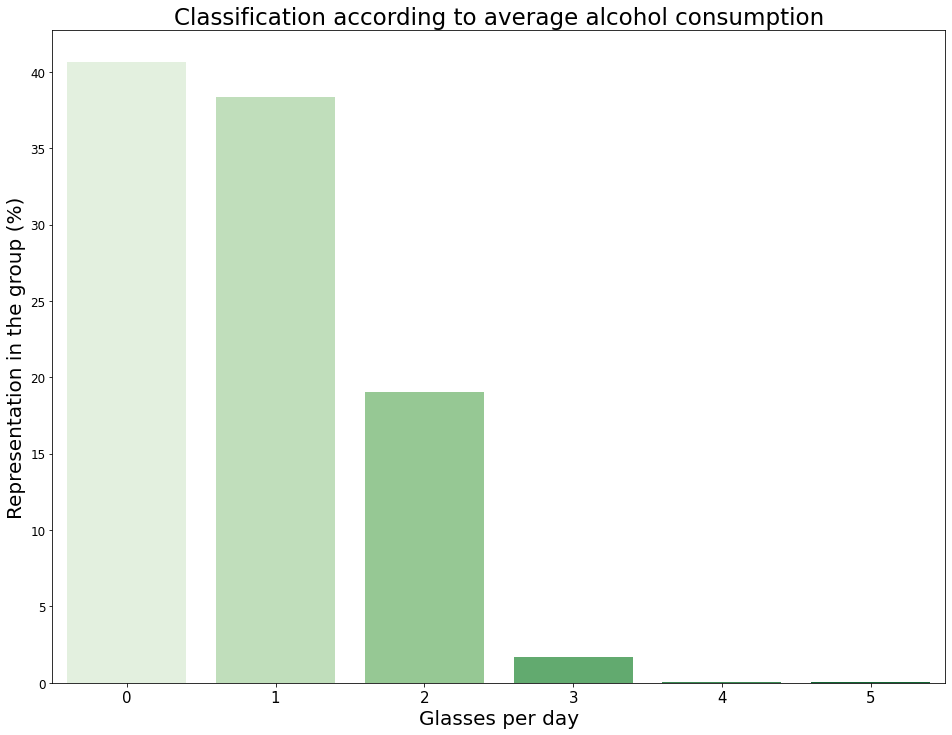

In [197]:
barchar_alc = plt.figure(figsize=(16, 12))
sns.barplot(data=df_alc, y='percent', x='alcohol', palette=('Greens'))


plt.xticks([0, 1, 2, 3, 4, 5], fontsize = 15)
plt.yticks(fontsize = 12)
plt.title('Classification according to average alcohol consumption', fontsize = 23) # title with fontsize 23
plt.xlabel('Glasses per day', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Representation in the group (%)', fontsize = 20) # y-axis label with fontsize 15

In [198]:
df_alc_1 = dfs['alcohol_class_1'].value_counts().reset_index(name='count').rename({'index': 'alcohol'}, axis=1)

In [199]:
df_alc_1['percent'] = df_alc_1['count']/dfs.alcohol_class_1.count() * 100
df_alc_1

alcohol  count    percent
0        1    697  59.319149
1        0    478  40.680851

Text(0, 0.5, 'Representation in the group (%)')

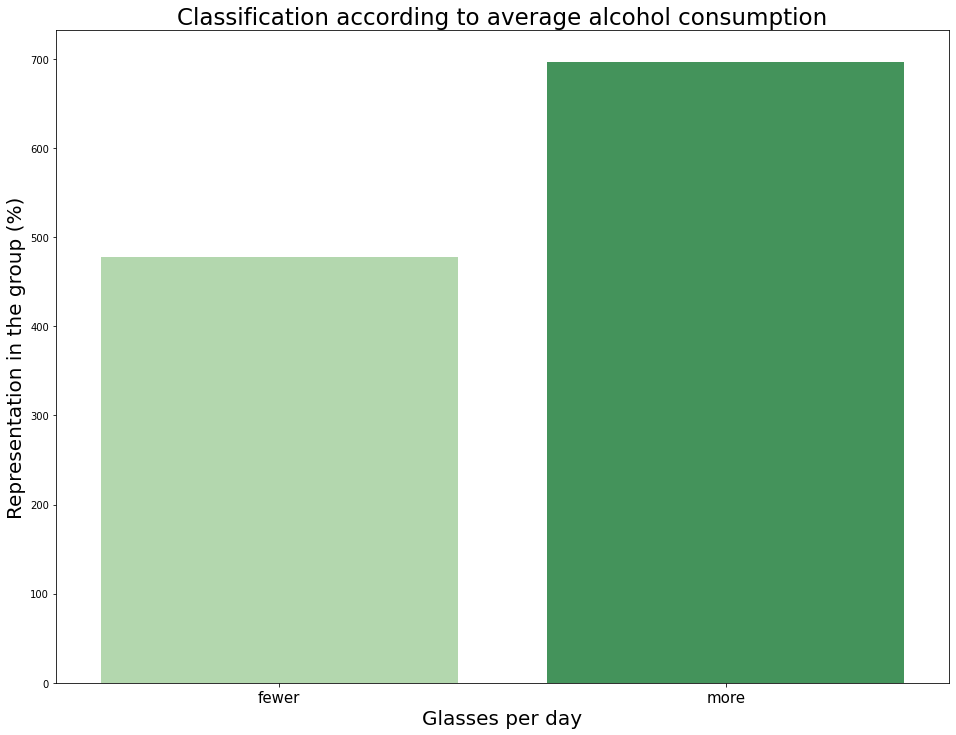

In [200]:
barchar_alc_count = plt.figure(figsize=(16, 12))
sns.barplot(data=df_alc_1, y='count', x='alcohol', palette='Greens')


plt.xticks([0, 1],['fewer', 'more'], fontsize = 15)

plt.title('Classification according to average alcohol consumption', fontsize = 23) # title with fontsize 23
plt.xlabel('Glasses per day', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Representation in the group (%)', fontsize = 20) # y-axis label with fontsize 15

Text(0, 0.5, 'Representation in the group (%)')

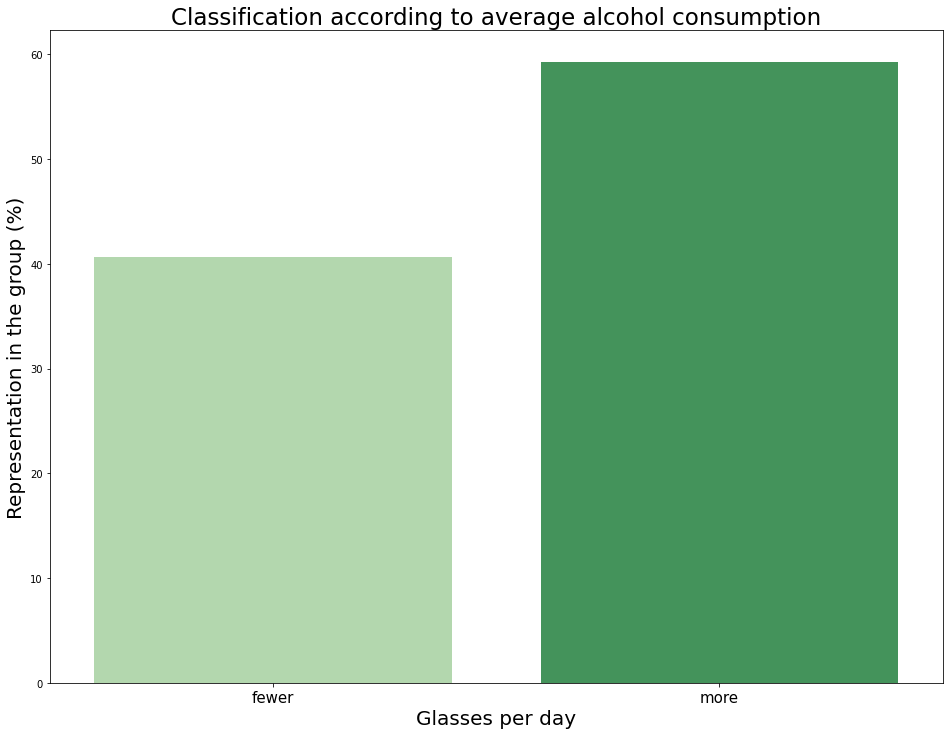

In [201]:
barchar_alc_percent = plt.figure(figsize=(16, 12))
sns.barplot(data=df_alc_1, y='percent', x='alcohol', palette='Greens')


plt.xticks([0, 1],['fewer', 'more'], fontsize = 15)

plt.title('Classification according to average alcohol consumption', fontsize = 23) # title with fontsize 23
plt.xlabel('Glasses per day', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Representation in the group (%)', fontsize = 20) # y-axis label with fontsize 15

### left plaque

In [202]:
df_alc_L = dfs.groupby(['alcohol', 'state_L']).state_L.count().reset_index(name='count_L')
df_alc_L

alcohol        state_L  count_L
0         0   amelioration       42
1         0  deterioration      229
2         0        neutral      207
3         1   amelioration       28
4         1  deterioration      207
5         1        neutral      216
6         2   amelioration       32
7         2  deterioration       90
8         2        neutral      102
9         3   amelioration        1
10        3  deterioration        9
11        3        neutral       10
12        4  deterioration        1
13        5  deterioration        1

In [203]:
df_alc_1_state_1 = [dfs[df['alcohol_class_1'] == 0]['alcohol_class_1'].count(), df[df['alcohol_class_1'] == 1]['alcohol_class_1'].count()]
df_alc_1_state = np.repeat(df_alc_1_state_1, 3)
df_alc_1_state

array([478, 478, 478, 697, 697, 697])

In [204]:
df_alc_L[df_alc_L['alcohol'] == 1].sum()

alcohol                                   3
state_L    ameliorationdeteriorationneutral
count_L                                 451
dtype: object

In [205]:
df_alc_1_L = dfs.groupby(['alcohol_class_1', 'state_L']).state_L.count().reset_index(name='count_L')
df_alc_1_L

alcohol_class_1        state_L  count_L
0                0   amelioration       42
1                0  deterioration      229
2                0        neutral      207
3                1   amelioration       61
4                1  deterioration      308
5                1        neutral      328

In [206]:
df_alc_1_L['percent_L'] = df_alc_1_L['count_L']/df_alc_1_state * 100
df_alc_1_L

alcohol_class_1        state_L  count_L  percent_L
0                0   amelioration       42   8.786611
1                0  deterioration      229  47.907950
2                0        neutral      207  43.305439
3                1   amelioration       61   8.751793
4                1  deterioration      308  44.189383
5                1        neutral      328  47.058824

Text(0, 0.5, 'The difference of width of the plaque (%)')

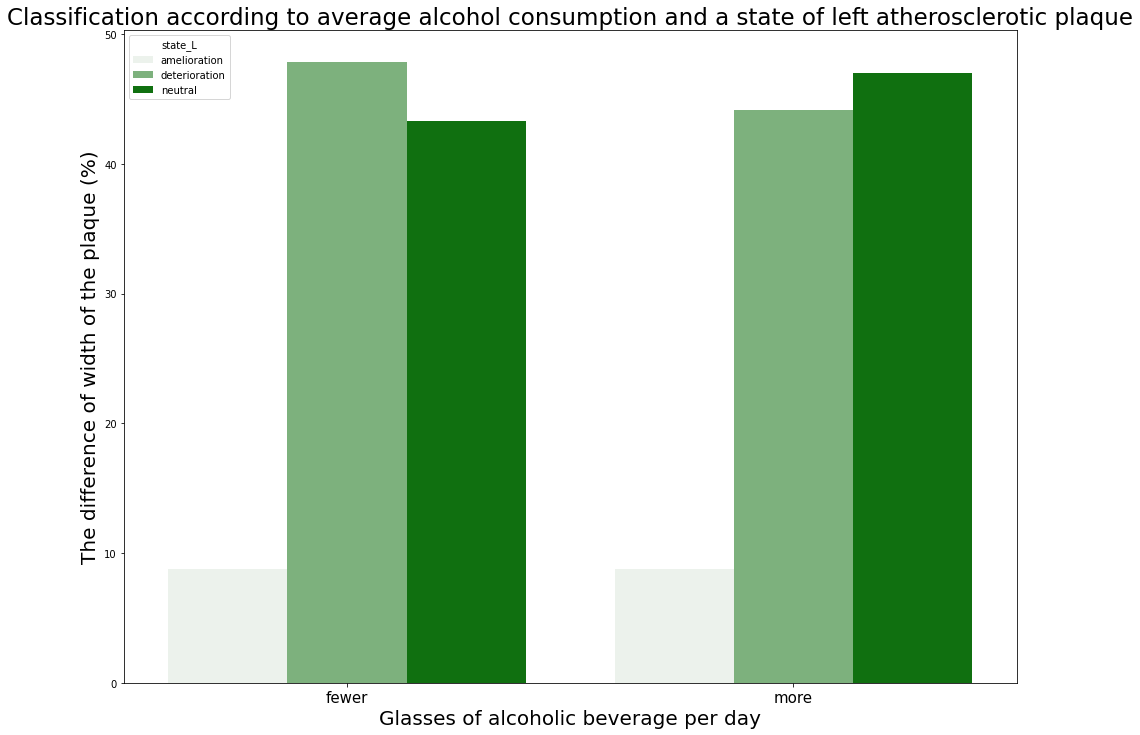

In [207]:
barchar_alc_L = plt.figure(figsize=(16, 12))
sns.barplot(data=df_alc_1_L, y='percent_L', x='alcohol_class_1', hue='state_L', color='green')

plt.xticks([0, 1],['fewer', 'more'], fontsize = 15)
plt.title('Classification according to average alcohol consumption and a state of left atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('Glasses of alcoholic beverage per day', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('The difference of width of the plaque (%)', fontsize = 20) # y-axis label with fontsize 15

Text(87.0, 0.5, 'Glasses of alcoholic beverage per day')

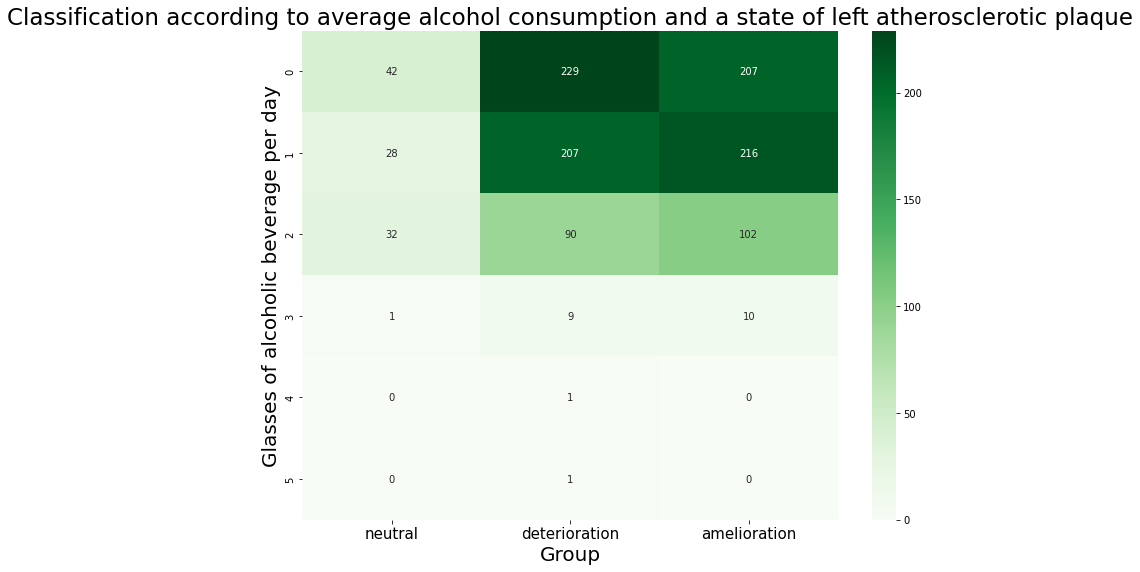

In [208]:
heat_alc_L = plt.figure(figsize=(12,9))
sns.heatmap(pd.crosstab(df.alcohol, df.state_L), annot=True, cmap='Greens', fmt='g')

plt.xticks([0.5, 1.5, 2.5], ['neutral', 'deterioration' , 'amelioration'], fontsize = 15)
plt.title('Classification according to average alcohol consumption and a state of left atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('Group', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Glasses of alcoholic beverage per day', fontsize = 20) # y-axis label with fontsize 15

### right plaque

In [209]:
df_alc_1_R = dfs.groupby(['alcohol_class_1', 'state_R']).state_R.count().reset_index(name='count_R')
df_alc_1_R

alcohol_class_1        state_R  count_R
0                0   amelioration       48
1                0  deterioration      332
2                0        neutral       98
3                1   amelioration       69
4                1  deterioration      486
5                1        neutral      142

In [210]:
df_alc_1_R['percent_R'] = df_alc_1_R['count_R']/df_alc_1_state * 100
df_alc_1_R

alcohol_class_1        state_R  count_R  percent_R
0                0   amelioration       48  10.041841
1                0  deterioration      332  69.456067
2                0        neutral       98  20.502092
3                1   amelioration       69   9.899570
4                1  deterioration      486  69.727403
5                1        neutral      142  20.373027

Text(0, 0.5, 'The difference of width of the plaque (%)')

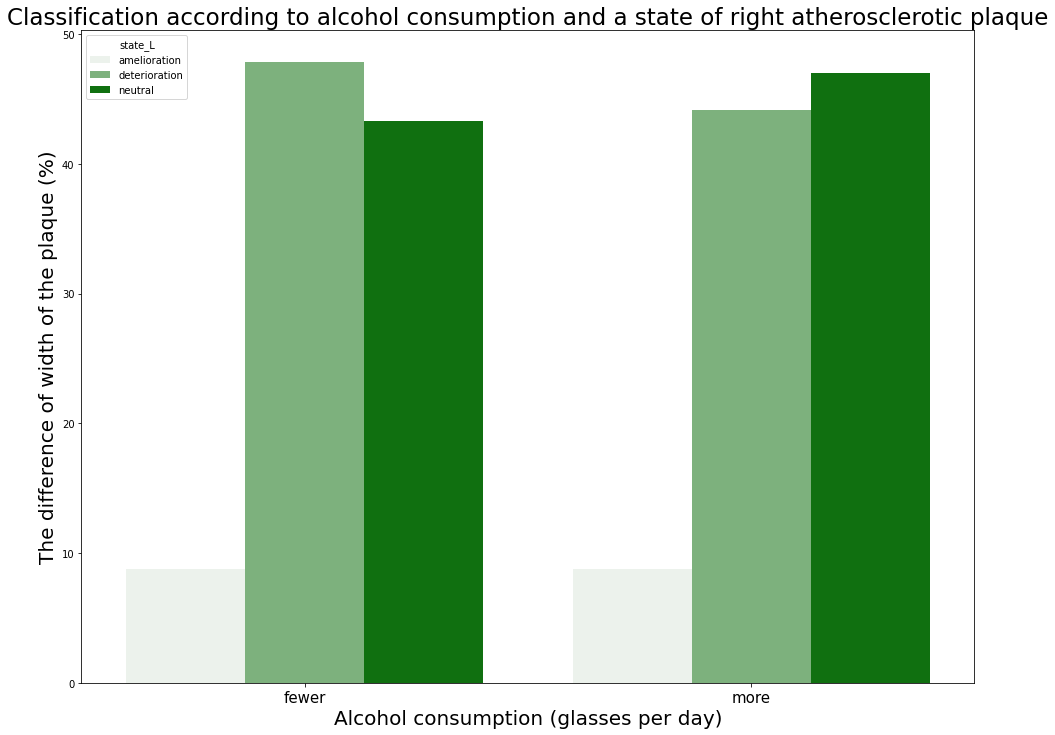

In [211]:
barchar_alc_R = plt.figure(figsize=(16, 12))
sns.barplot(data=df_alc_1_L, y='percent_L', x='alcohol_class_1', hue='state_L', color='green')

plt.xticks([0, 1],['fewer', 'more'], fontsize = 15)
plt.title('Classification according to alcohol consumption and a state of right atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('Alcohol consumption (glasses per day)', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('The difference of width of the plaque (%)', fontsize = 20) # y-axis label with fontsize 15

Text(87.0, 0.5, 'Glasses of alcoholic beverage per day')

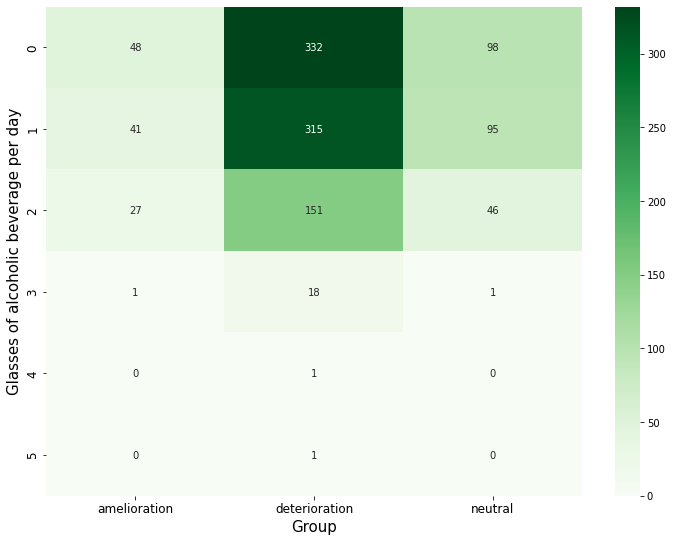

In [212]:
heat_alc_R = plt.figure(figsize=(12,9))
sns.heatmap(pd.crosstab(df.alcohol, df.state_R), annot=True, cmap='Greens', fmt='g')

#plt.xticks([2, 4, 6], ['neutral', 'deterioration' , 'amelioration'])
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
#plt.title('Classification according to average alcohol consumption and a state of right atherosclerotic plaque', fontsize = 20) # title with fontsize 20
plt.xlabel('Group', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Glasses of alcoholic beverage per day', fontsize = 15) # y-axis label with fontsize 15

## 6. Sex

In [213]:
df_sex = df.sex.value_counts().reset_index(name='count').rename({'index': 'sex'}, axis=1)
df_sex

sex  count
0    0    665
1    1    510

Text(0, 0.5, 'Count')

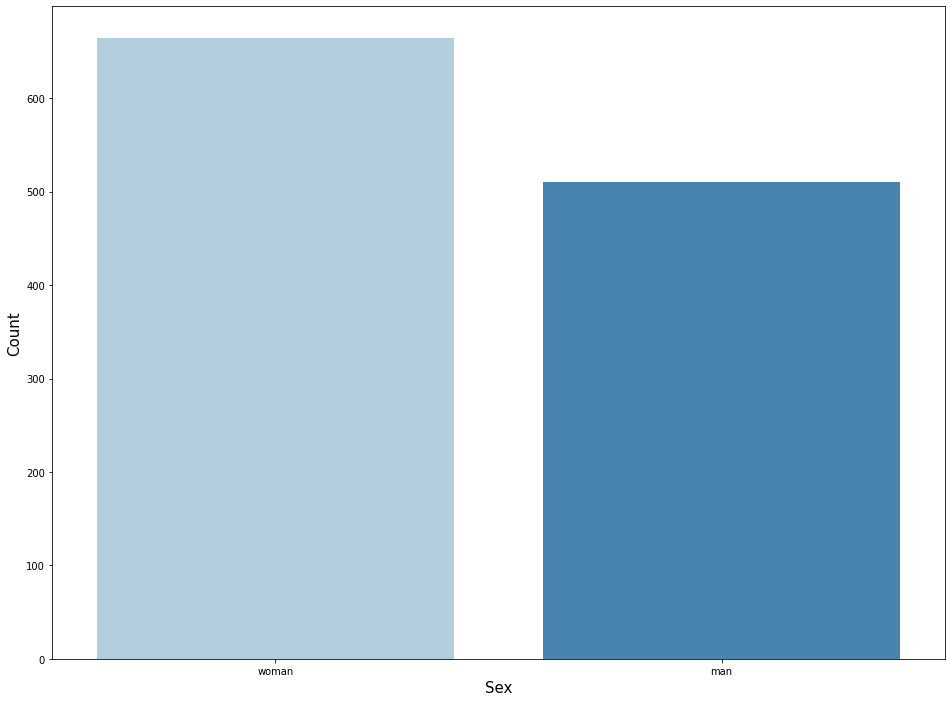

In [214]:
barchar_sex_count = plt.figure(figsize=(16, 12))
sns.barplot(data = df_sex, x='sex', y='count', palette='Blues')

plt.xticks([0, 1], ['woman', 'man'])
plt.xlabel('Sex', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

In [215]:
df_sex_sum = [df.sex.value_counts().sum(), df.sex.value_counts().sum()] 
df_sex_sum

[1175, 1175]

In [216]:
df_sex['percent'] =  df_sex['count'] / df_sex_sum * 100
df_sex

sex  count    percent
0    0    665  56.595745
1    1    510  43.404255

Text(0, 0.5, 'Representation in the group (%)')

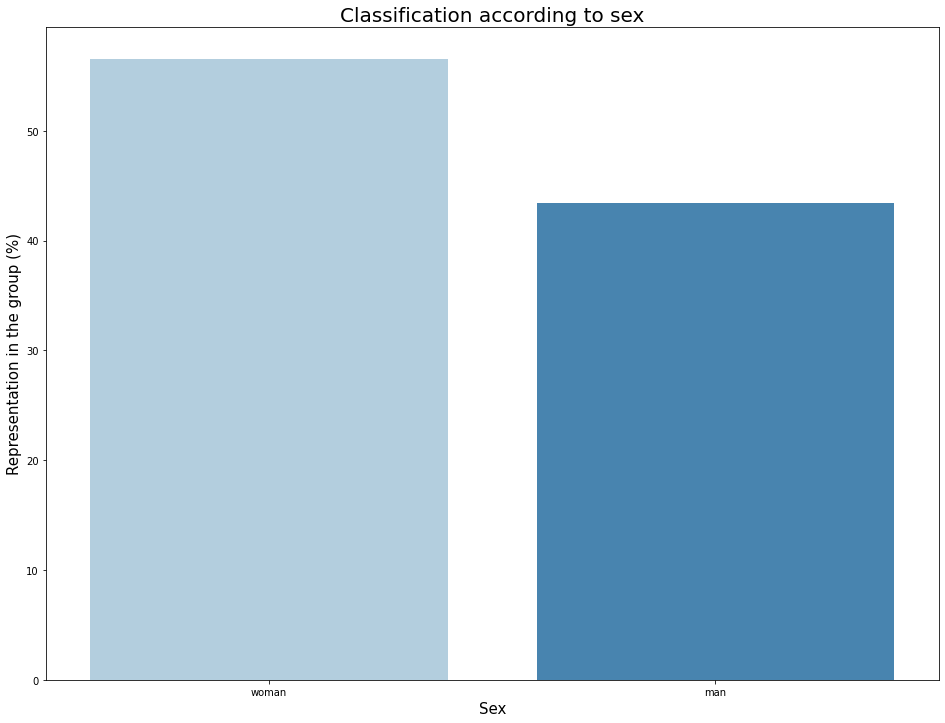

In [217]:
barchar_sex_percent = plt.figure(figsize=(16, 12))

sns.barplot(data = df_sex, x='sex', y='percent', palette='Blues')

plt.xticks([0,1], ['woman', 'man'])
plt.title('Classification according to sex', fontsize = 20) # title with fontsize 20
plt.xlabel('Sex', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Representation in the group (%)', fontsize = 15) # y-axis label with fontsize 15

### left plaque

In [218]:
df_sex_L = dfs.groupby(['sex', 'state_L']).state_L.count().reset_index(name='count_L')
df_sex_L

sex        state_L  count_L
0    0   amelioration       45
1    0  deterioration      312
2    0        neutral      308
3    1   amelioration       58
4    1  deterioration      225
5    1        neutral      227

In [219]:
df_sex_L['percent_L'] = (df_sex_L['count_L']/df_sex_state) * 100
df_sex_L

sex        state_L  count_L  percent_L
0    0   amelioration       45   6.766917
1    0  deterioration      312  46.917293
2    0        neutral      308  46.315789
3    1   amelioration       58  11.372549
4    1  deterioration      225  44.117647
5    1        neutral      227  44.509804

Text(0, 0.5, 'Representation in the group (%)')

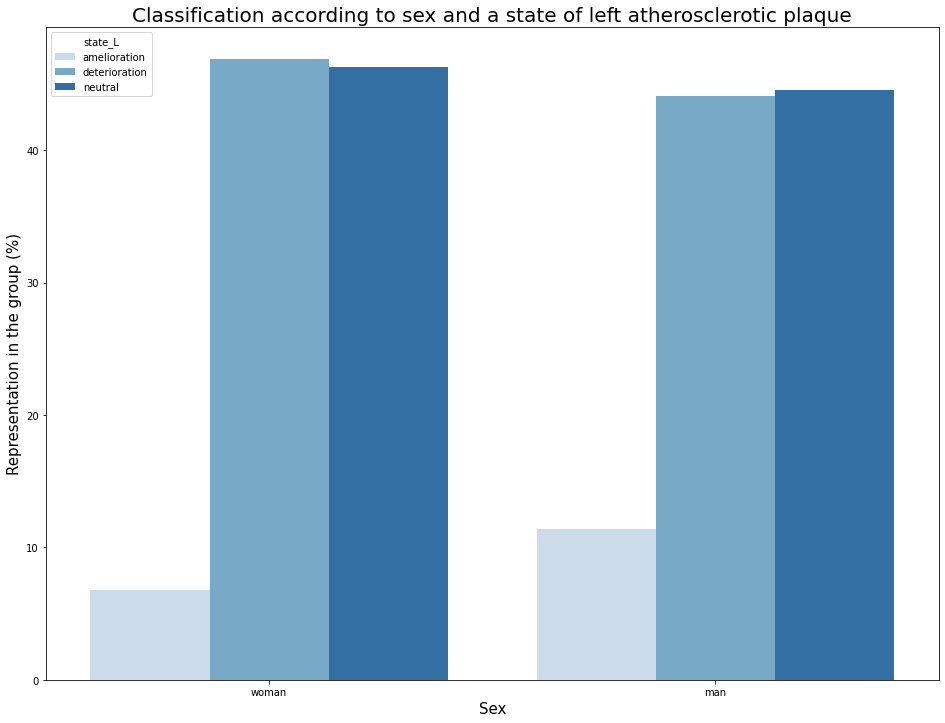

In [220]:
barchar_sex_L = plt.figure(figsize=(16, 12))
sns.barplot(data=df_sex_L, y='percent_L', x='sex', hue='state_L', palette='Blues')

plt.xticks([0,1], ['woman', 'man'])
plt.title('Classification according to sex and a state of left atherosclerotic plaque', fontsize = 20) # title with fontsize 20
plt.xlabel('Sex', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Representation in the group (%)', fontsize = 15) # y-axis label with fontsize 15

Text(0, 0.5, 'Representation in the group (%)')

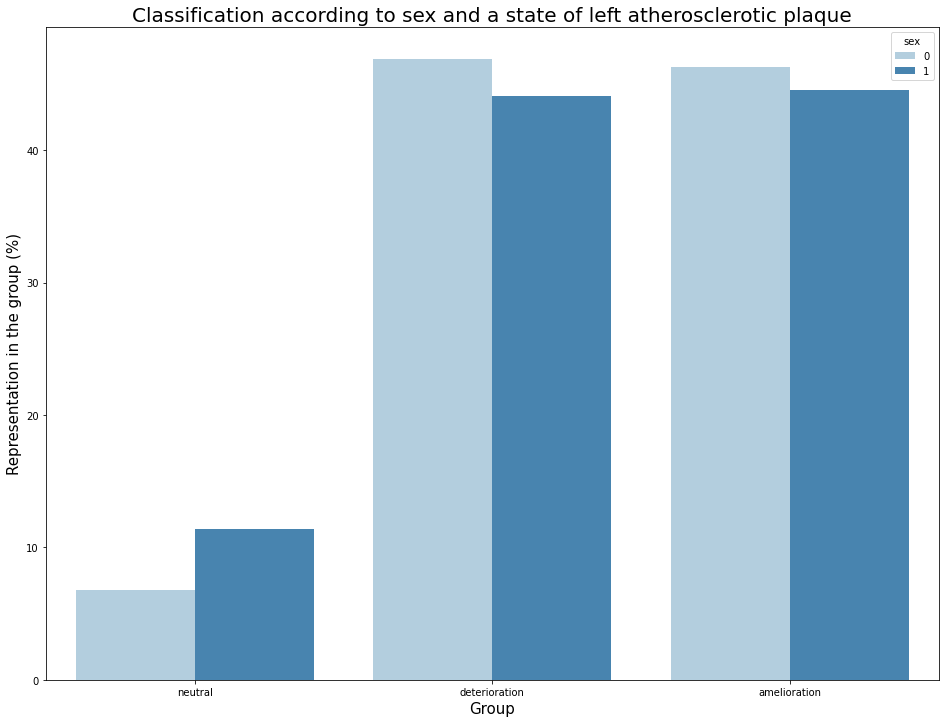

In [221]:
barchar_sex_L_1 = plt.figure(figsize=(16, 12))
sns.barplot(data=df_sex_L, y='percent_L', x='state_L', hue='sex', palette='Blues')

plt.xticks([0,1,2], ['neutral', 'deterioration' , 'amelioration'])
plt.title('Classification according to sex and a state of left atherosclerotic plaque', fontsize = 20) # title with fontsize 20
plt.xlabel('Group', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Representation in the group (%)', fontsize = 15) # y-axis label with fontsize 15

In [222]:
pd.crosstab(df.sex, df.state_L)

state_L  amelioration  deterioration  neutral
sex                                          
0                  45            312      308
1                  58            225      227

Text(87.0, 0.5, 'Sex')

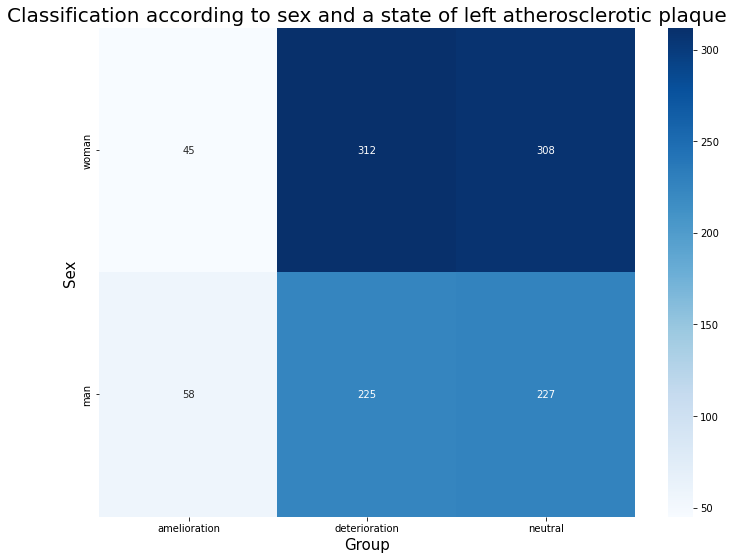

In [223]:
heat_sex_L = plt.figure(figsize=(12,9))
sns.heatmap(pd.crosstab(df.sex, df.state_L), annot=True, cmap='Blues', fmt='g')

plt.yticks([0.5, 1.5], ['woman', 'man'])
plt.title('Classification according to sex and a state of left atherosclerotic plaque', fontsize = 20) # title with fontsize 20
plt.xlabel('Group', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Sex', fontsize = 15) # y-axis label with fontsize 15

### right plaque

In [224]:
df_sex_R = dfs.groupby(['sex', 'state_R']).state_R.count().reset_index(name='count_R')
df_sex_R

sex        state_R  count_R
0    0   amelioration       68
1    0  deterioration      473
2    0        neutral      124
3    1   amelioration       49
4    1  deterioration      345
5    1        neutral      116

In [225]:
df_sex_R['percent_R'] = (df_sex_R['count_R']/df_sex_state) * 100
df_sex_R

sex        state_R  count_R  percent_R
0    0   amelioration       68  10.225564
1    0  deterioration      473  71.127820
2    0        neutral      124  18.646617
3    1   amelioration       49   9.607843
4    1  deterioration      345  67.647059
5    1        neutral      116  22.745098

Text(0, 0.5, 'Representation in the group (%)')

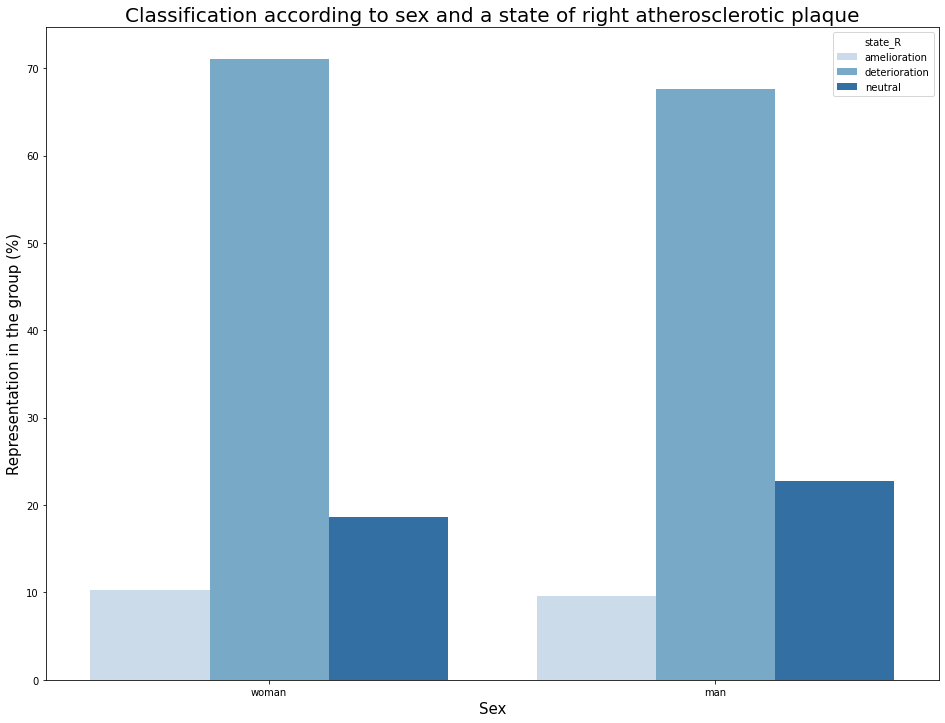

In [226]:
barchar_sex_R = plt.figure(figsize=(16, 12))
sns.barplot(data=df_sex_R, y='percent_R', x='sex', hue='state_R', palette='Blues')

plt.xticks([0,1], ['woman', 'man'])
plt.title('Classification according to sex and a state of right atherosclerotic plaque', fontsize = 20) # title with fontsize 20
plt.xlabel('Sex', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Representation in the group (%)', fontsize = 15) # y-axis label with fontsize 15

Text(0, 0.5, 'Representation in the group (%)')

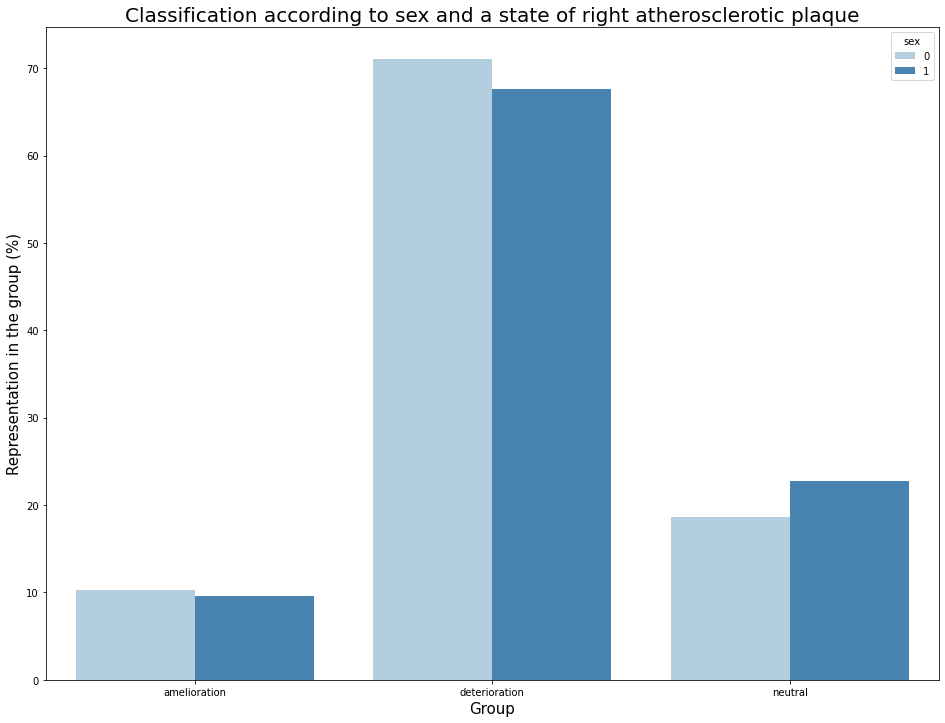

In [227]:
barchar_sex_R_1 = plt.figure(figsize=(16, 12))
sns.barplot(data=df_sex_R, y='percent_R', x='state_R', hue='sex', palette='Blues')

xticklabels = ([0,1,2], ['neutral', 'deterioration' , 'amelioration'])
plt.title('Classification according to sex and a state of right atherosclerotic plaque', fontsize = 20) # title with fontsize 20
plt.xlabel('Group', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Representation in the group (%)', fontsize = 15) # y-axis label with fontsize 15

In [228]:
pd.crosstab(df.sex, df.state_R)

state_R  amelioration  deterioration  neutral
sex                                          
0                  68            473      124
1                  49            345      116

Text(87.0, 0.5, 'Sex')

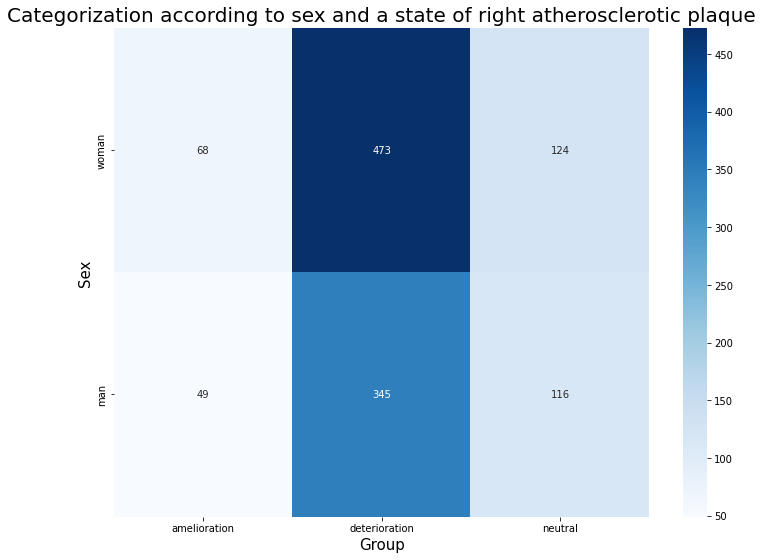

In [229]:
heat_sex_R = plt.figure(figsize=(12,9))
sns.heatmap(pd.crosstab(df.sex, df.state_R), annot=True, cmap='Blues', fmt='g')

plt.yticks([0.5, 1.5], ['woman', 'man'])
plt.title('Categorization according to sex and a state of right atherosclerotic plaque', fontsize = 20) # title with fontsize 20
plt.xlabel('Group', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Sex', fontsize = 15) # y-axis label with fontsize 15

## 7. Smoking

In [230]:
df_smoking = df.smoking.value_counts().reset_index(name='count').rename({'index': 'cigarettes'}, axis=1)
df_smoking

cigarettes  count
0           0    986
1           1    149
2           2     40

Text(0, 0.5, 'Count')

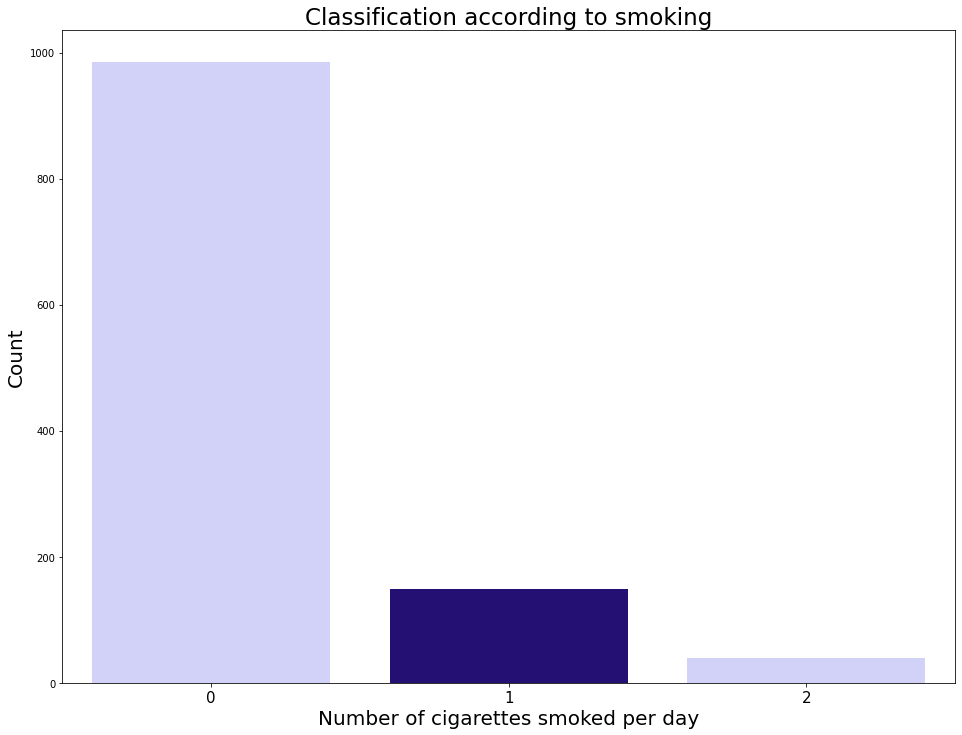

In [231]:
barchar_smoking_count = plt.figure(figsize=(16, 12))
sns.barplot(data = df_smoking, x='cigarettes', y='count', palette=[(0.8,0.8,1,1),(0.1,0,0.51,0.8)])

plt.xticks([0,1,2], fontsize = 15)
#plt.yticks(fontsize = 12)
plt.title('Classification according to smoking', fontsize = 23) # title with fontsize 23
plt.xlabel('Number of cigarettes smoked per day', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Count', fontsize = 20) # y-axis label with fontsize 15

In [232]:
df_smoking_sum = [df.smoking.value_counts().sum(), df.smoking.value_counts().sum(), df.smoking.value_counts().sum()] 
df_smoking_sum

[1175, 1175, 1175]

In [233]:
df_smoking['percent'] = df_smoking['count']/df_smoking_sum * 100

In [234]:
df['smoker_class_1'] = 0
df.loc[df.smoking > 0, 'smoker'] = 1
df.smoking_class_1.sum()

189

In [235]:
df_smoking['smoking_class_1'] = 0
df_smoking.loc[df_smoking.cigarettes > 0, 'smoking_class_1'] = 1
df_smoking

cigarettes  count    percent  smoking_class_1
0           0    986  83.914894                0
1           1    149  12.680851                1
2           2     40   3.404255                1

In [236]:
df_smoking_1 = df.groupby('smoking_class_1')['smoking_class_1'].count().reset_index(name='count')
df_smoking_1['percent'] = df_smoking_1['count']/df['smoking'].count() * 100
df_smoking_1

smoking_class_1  count    percent
0                0    986  83.914894
1                1    189  16.085106

Text(0, 0.5, 'Representation in the group (%)')

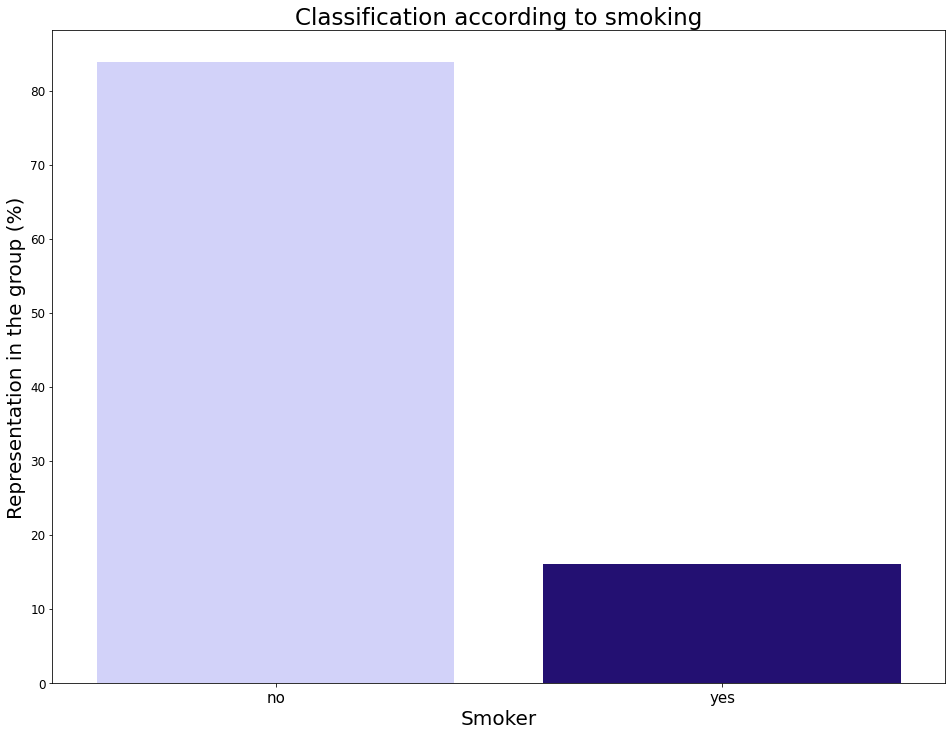

In [237]:
barchar_smoking_percent = plt.figure(figsize=(16, 12))
sns.barplot(data=df_smoking_1, y='percent', x='smoking_class_1', palette=[(0.8,0.8,1,1),(0.1,0,0.51,0.8)])


plt.xticks([0, 1],['no', 'yes'])

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 12)
plt.title('Classification according to smoking', fontsize = 23) # title with fontsize 23
plt.xlabel('Smoker', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Representation in the group (%)', fontsize = 20) # y-axis label with fontsize 15

### left plaque

In [238]:
df_smoking_L = dfs.groupby(['smoking', 'state_L']).state_L.count().reset_index(name='count_L')
df_smoking_L

smoking        state_L  count_L
0        0   amelioration       87
1        0  deterioration      449
2        0        neutral      450
3        1   amelioration       10
4        1  deterioration       70
5        1        neutral       69
6        2   amelioration        6
7        2  deterioration       18
8        2        neutral       16

In [239]:
df_smoking_1_L = df.groupby(['smoking_class_1', 'state_L']).state_L.count().reset_index(name='count_L')
df_smoking_1_L

smoking_class_1        state_L  count_L
0                0   amelioration       87
1                0  deterioration      449
2                0        neutral      450
3                1   amelioration       16
4                1  deterioration       88
5                1        neutral       85

In [240]:
df_smoking_1_L['percent_L'] = df_smoking_1_L['count_L']/df_smoking_1_state * 100
df_smoking_1_L

smoking_class_1        state_L  count_L  percent_L
0                0   amelioration       87   8.823529
1                0  deterioration      449  45.537525
2                0        neutral      450  45.638945
3                1   amelioration       16   8.465608
4                1  deterioration       88  46.560847
5                1        neutral       85  44.973545

Text(0, 0.5, 'Representation in the group (%)')

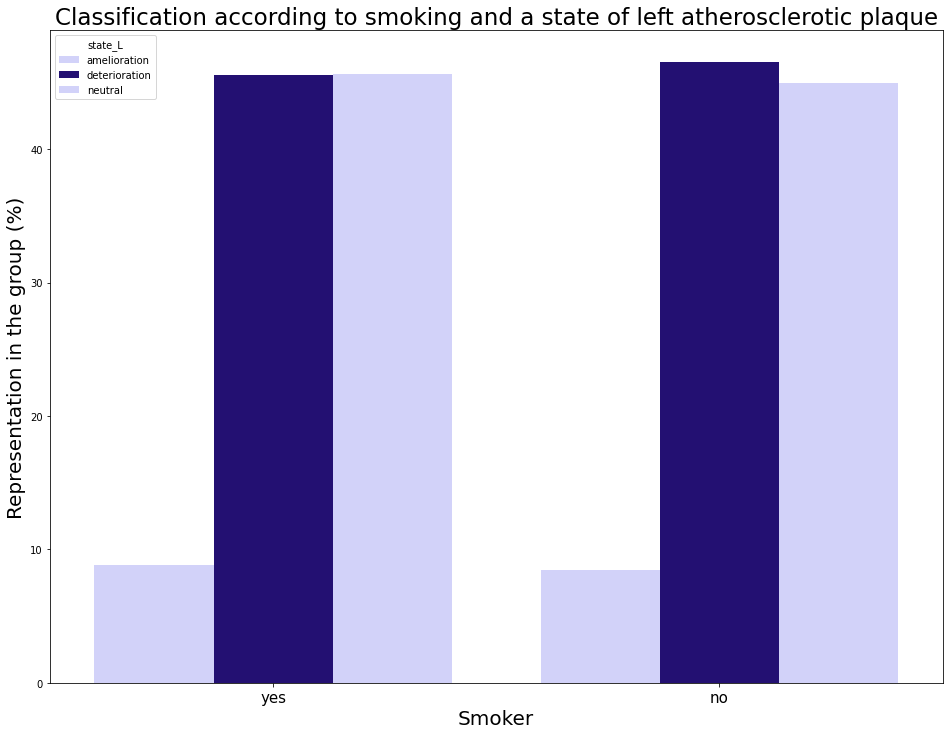

In [241]:
barchar_smoking_L = plt.figure(figsize=(16, 12))
sns.barplot(data=df_smoking_1_L, y='percent_L', x='smoking_class_1', hue='state_L', palette=[(0.8,0.8,1,1),(0.1,0,0.51,0.8)])

plt.xticks([0, 1],['yes', 'no'], fontsize=15)
plt.title('Classification according to smoking and a state of left atherosclerotic plaque', fontsize = 23) # title with fontsize 20
plt.xlabel('Smoker', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Representation in the group (%)', fontsize = 20) # y-axis label with fontsize 15

Text(0, 0.5, 'Representation in the group (%)')

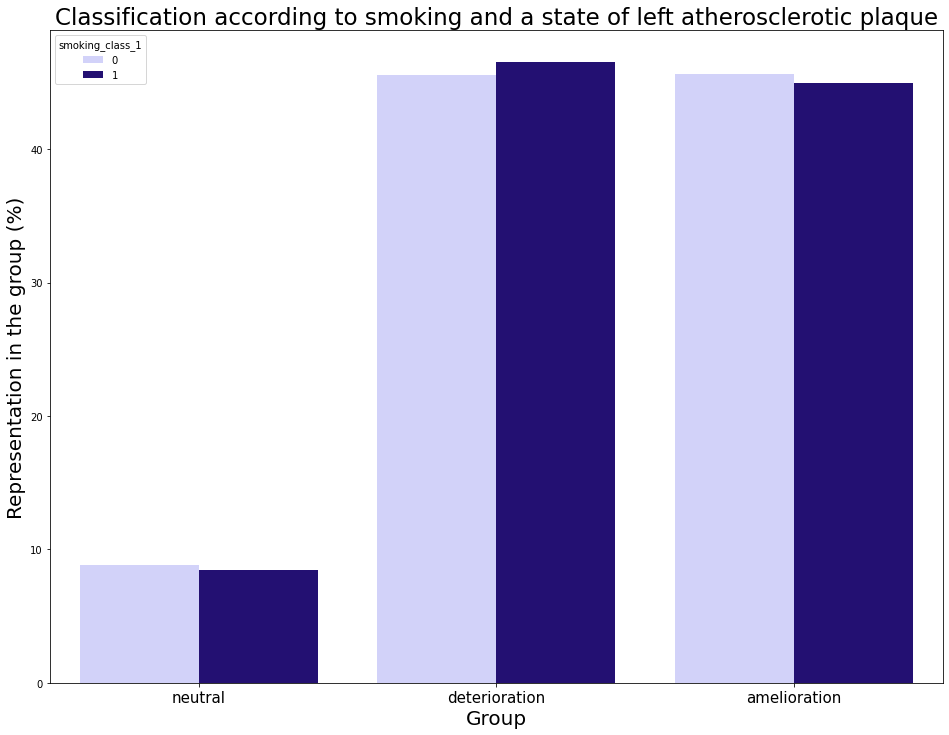

In [242]:
barchar_smoking_L_1 = plt.figure(figsize=(16, 12))
sns.barplot(data=df_smoking_1_L, y='percent_L', x='state_L', hue='smoking_class_1', palette=[(0.8,0.8,1,1),(0.1,0,0.51,0.8)])

plt.xticks([0, 1, 2],['neutral', 'deterioration' , 'amelioration'], fontsize = 15)
plt.title('Classification according to smoking and a state of left atherosclerotic plaque', fontsize = 23) # title with fontsize 20
plt.xlabel('Group', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Representation in the group (%)', fontsize = 20) # y-axis label with fontsize 15

In [243]:
pd.crosstab(df.smoking_class_1, df.state_L)

state_L          amelioration  deterioration  neutral
smoking_class_1                                      
0                          87            449      450
1                          16             88       85

Text(87.0, 0.5, 'Smoker')

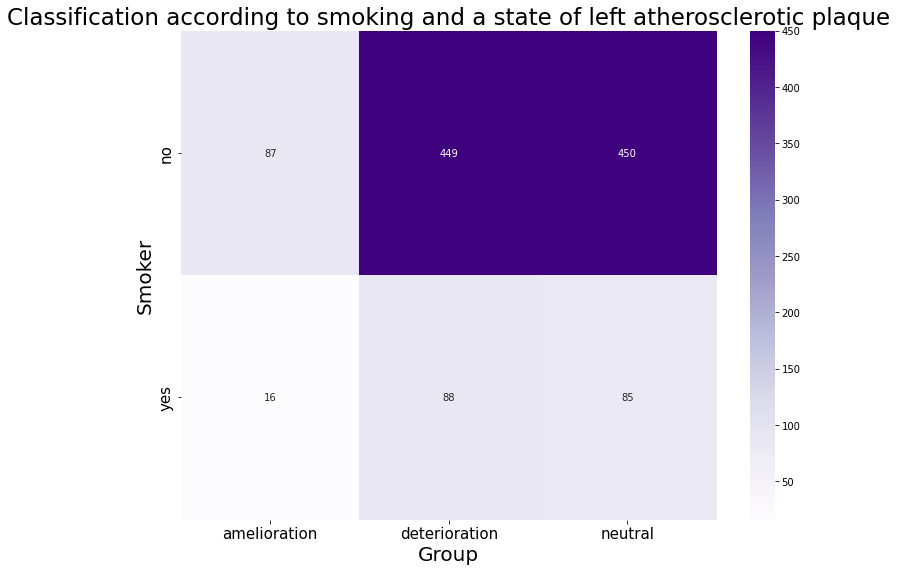

In [244]:
heat_smoking_L = plt.figure(figsize=(12,9))
sns.heatmap(pd.crosstab(df.smoking_class_1, df.state_L), annot=True, cmap='Purples', fmt='g')

plt.xticks(fontsize = 15)
plt.yticks([0.5, 1.5], ['no', 'yes'],  fontsize = 15)
plt.title('Classification according to smoking and a state of left atherosclerotic plaque', fontsize = 23) # title with fontsize 20
plt.xlabel('Group', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Smoker', fontsize = 20) # y-axis label with fontsize 15

In [245]:
pd.crosstab(df.smoking, df.state_L)

state_L  amelioration  deterioration  neutral
smoking                                      
0                  87            449      450
1                  10             70       69
2                   6             18       16

Text(87.0, 0.5, 'Number of cigarettes smoked per day')

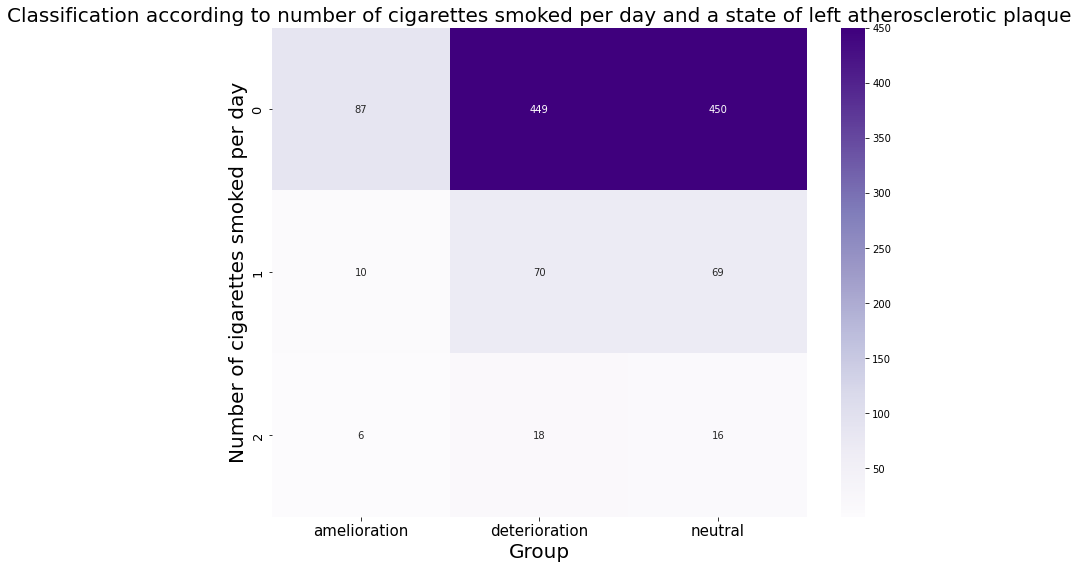

In [246]:
heat_smoking_L_1 = plt.figure(figsize=(12,9))
sns.heatmap(pd.crosstab(df.smoking, df.state_L), annot=True, cmap='Purples', fmt='g')

plt.xticks(fontsize = 15)
plt.yticks([0.5, 1.5, 2.5], ['0', '1', '2'], fontsize = 13)
plt.title('Classification according to number of cigarettes smoked per day and a state of left atherosclerotic plaque', fontsize = 20) # title with fontsize 20
plt.xlabel('Group', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Number of cigarettes smoked per day', fontsize = 20) # y-axis label with fontsize 15

### right plaque

In [247]:
df_smoking_R = df.groupby(['smoking', 'state_R']).state_R.count().reset_index(name='count_R')
df_smoking_R

smoking        state_R  count_R
0        0   amelioration       97
1        0  deterioration      687
2        0        neutral      202
3        1   amelioration       18
4        1  deterioration      105
5        1        neutral       26
6        2   amelioration        2
7        2  deterioration       26
8        2        neutral       12

In [248]:
df_smoking_1_R = df.groupby(['smoking_class_1', 'state_R']).state_R.count().reset_index(name='count_R')
df_smoking_1_R

smoking_class_1        state_R  count_R
0                0   amelioration       97
1                0  deterioration      687
2                0        neutral      202
3                1   amelioration       20
4                1  deterioration      131
5                1        neutral       38

In [249]:
df_smoking_1_R['percent_R'] = df_smoking_1_R['count_R']/df_smoking_1_state * 100
df_smoking_1_R

smoking_class_1        state_R  count_R  percent_R
0                0   amelioration       97   9.837728
1                0  deterioration      687  69.675456
2                0        neutral      202  20.486815
3                1   amelioration       20  10.582011
4                1  deterioration      131  69.312169
5                1        neutral       38  20.105820

Text(0, 0.5, 'Representation in the group (%)')

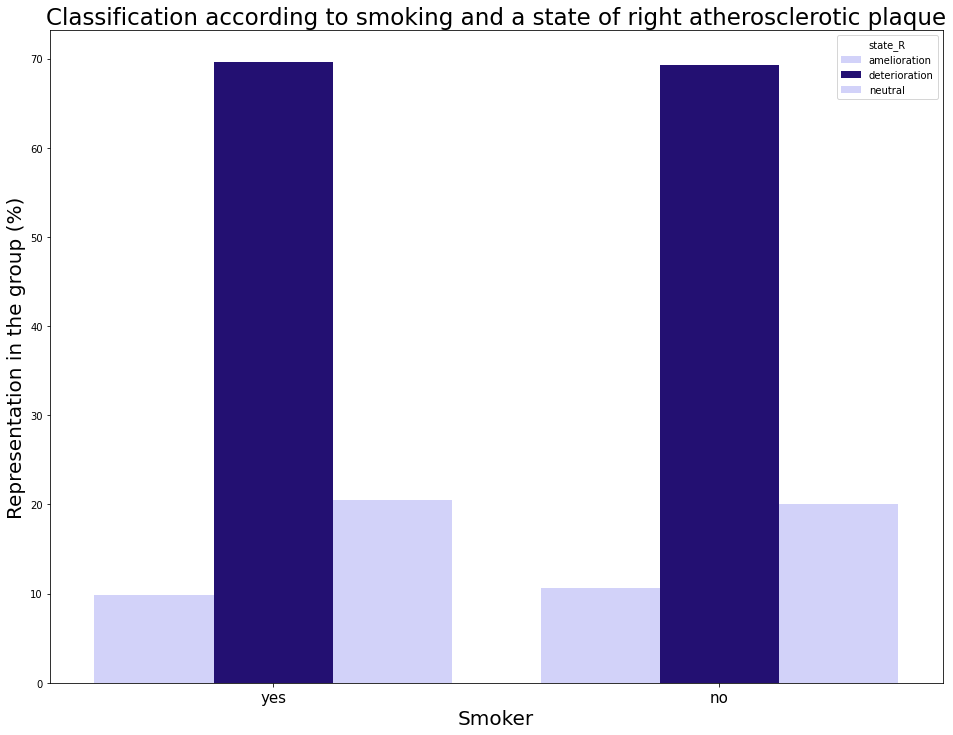

In [250]:
barchar_smoking_R = plt.figure(figsize=(16, 12))
sns.barplot(data=df_smoking_1_R, y='percent_R', x='smoking_class_1', hue='state_R', palette=[(0.8,0.8,1,1),(0.1,0,0.51,0.8)])

plt.xticks([0, 1],['yes', 'no'], fontsize=15)
plt.title('Classification according to smoking and a state of right atherosclerotic plaque', fontsize = 23) # title with fontsize 20
plt.xlabel('Smoker', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Representation in the group (%)', fontsize = 20) # y-axis label with fontsize 15

Text(0, 0.5, 'Representation in the group (%)')

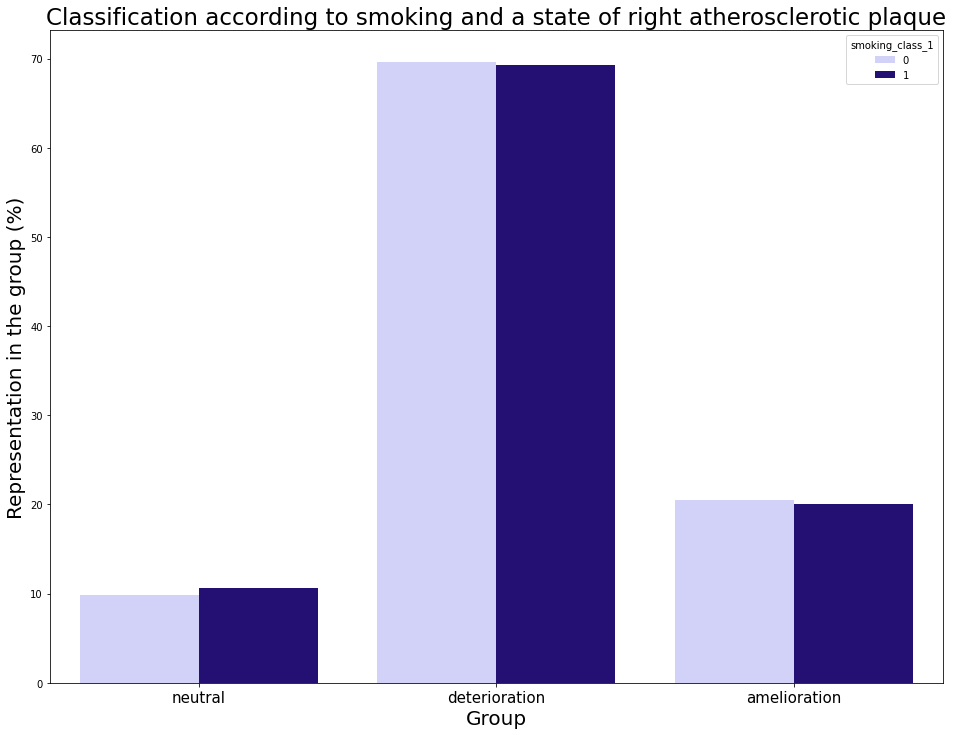

In [251]:
barchar_smoking_R_1 = plt.figure(figsize=(16, 12))
sns.barplot(data=df_smoking_1_R, y='percent_R', x='state_R', hue='smoking_class_1', palette=[(0.8,0.8,1,1),(0.1,0,0.51,0.8)])

plt.xticks([0, 1, 2],['neutral', 'deterioration' , 'amelioration'], fontsize=15)
plt.title('Classification according to smoking and a state of right atherosclerotic plaque', fontsize = 23) # title with fontsize 20
plt.xlabel('Group', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Representation in the group (%)', fontsize = 20) # y-axis label with fontsize 15

In [252]:
pd.crosstab(df.smoking, df.state_R)

state_R  amelioration  deterioration  neutral
smoking                                      
0                  97            687      202
1                  18            105       26
2                   2             26       12

Text(87.0, 0.5, 'Number of cigarettes smoked per day')

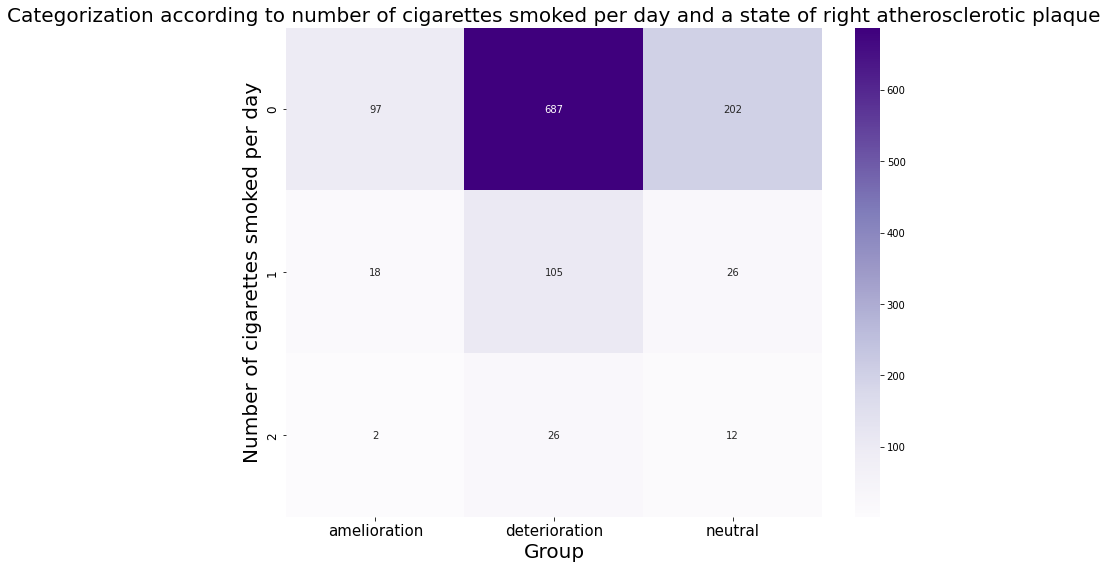

In [253]:
heat_smoking_R = plt.figure(figsize=(12,9))
sns.heatmap(pd.crosstab(df.smoking, df.state_R), annot=True, cmap='Purples', fmt='g')

plt.xticks(fontsize = 15)
plt.yticks([0.5, 1.5, 2.5], ['0', '1', '2'], fontsize = 12)
plt.title('Categorization according to number of cigarettes smoked per day and a state of right atherosclerotic plaque', fontsize = 20) # title with fontsize 20
plt.xlabel('Group', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Number of cigarettes smoked per day', fontsize = 20) # y-axis label with fontsize 15

## 8. Diabetes
- diabetes (1,0): df_diab

In [254]:
df_diab = df.diabetes.value_counts().reset_index(name='count').rename({'index': 'diabetes'}, axis=1)
df_diab

diabetes  count
0         0    943
1         1    232

Text(0, 0.5, 'Count')

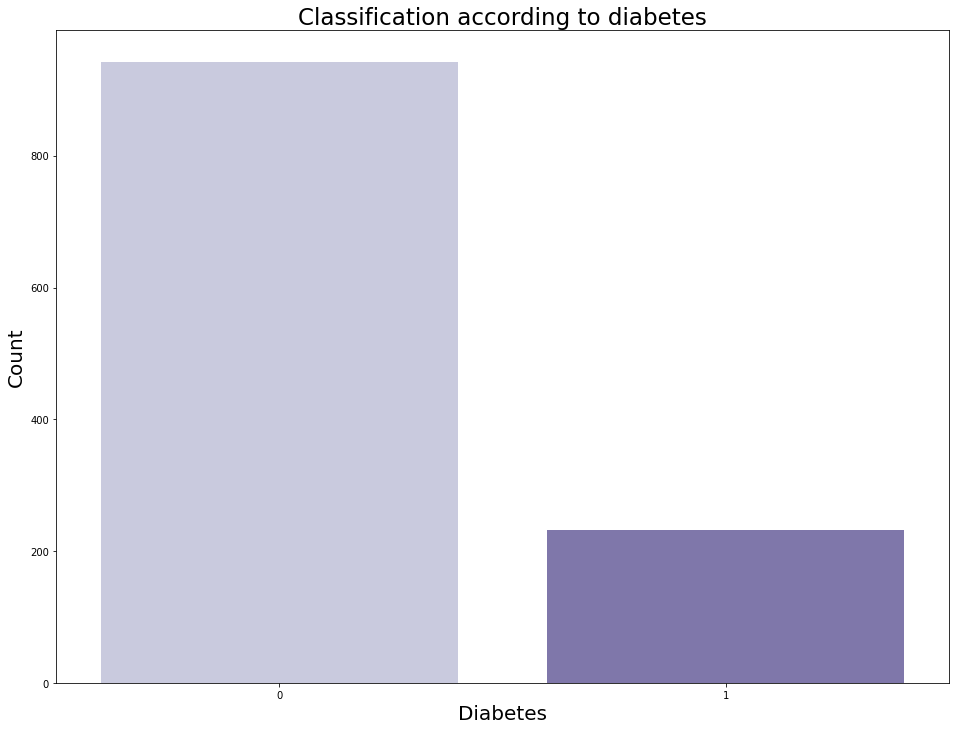

In [255]:
barchar_diab_count = plt.figure(figsize=(16, 12))
sns.barplot(data = df_diab, x='diabetes', y='count', palette='Purples')

plt.title('Classification according to diabetes', fontsize = 23) # title with fontsize 23
plt.xlabel('Diabetes', fontsize = 20) # x-axis label with fontsize 20
plt.ylabel('Count', fontsize = 20) # y-axis label with fontsize 20

In [256]:
df_diab['percent'] = df_diab['count'] / df_diab['count'].sum() * 100
df_diab

diabetes  count    percent
0         0    943  80.255319
1         1    232  19.744681

Text(0, 0.5, 'Representation in the group (%)')

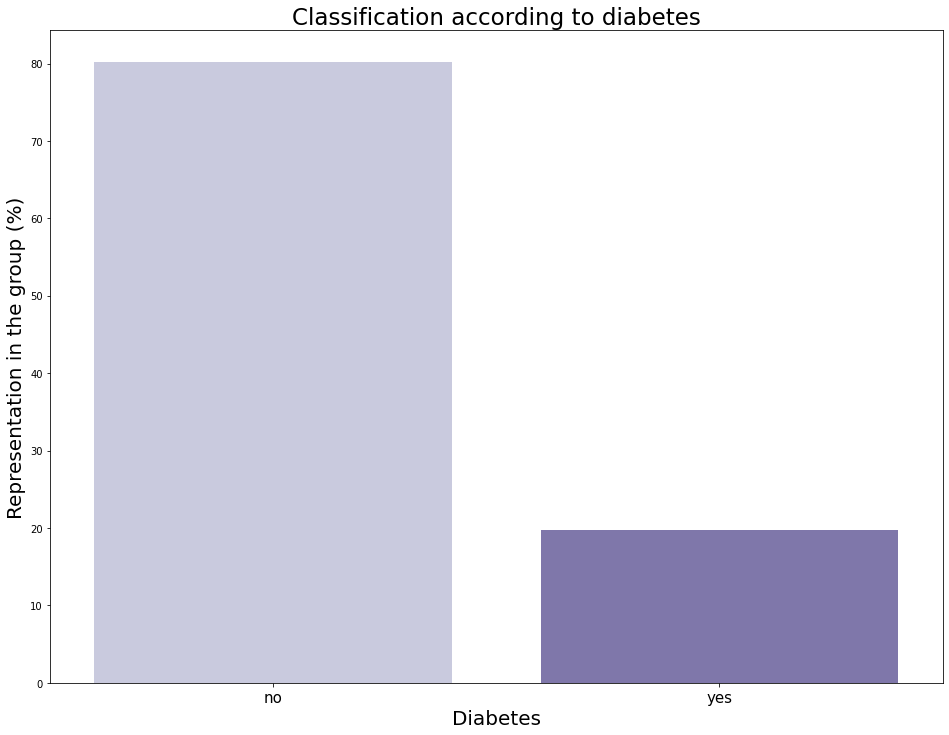

In [257]:
barchar_diab_percent = plt.figure(figsize=(16, 12))

sns.barplot(data = df_diab, x='diabetes', y='percent', palette='Purples')

plt.xticks([0, 1],['no', 'yes'], fontsize = 15)

plt.title('Classification according to diabetes', fontsize = 23) # title with fontsize 23
plt.xlabel('Diabetes', fontsize = 20) # x-axis label with fontsize 20
plt.ylabel('Representation in the group (%)', fontsize = 20) # y-axis label with fontsize 20

### left plaque

In [258]:
df_diab_L = dfs.groupby(['diabetes', 'state_L']).state_L.count().reset_index(name='count_L')
df_diab_L

diabetes        state_L  count_L
0         0   amelioration       82
1         0  deterioration      429
2         0        neutral      432
3         1   amelioration       21
4         1  deterioration      108
5         1        neutral      103

In [259]:
df_diab_L['percent_L'] = (df_diab_L['count_L']/df_diab_state) * 100
df_diab_L

diabetes        state_L  count_L  percent_L
0         0   amelioration       82   8.695652
1         0  deterioration      429  45.493107
2         0        neutral      432  45.811241
3         1   amelioration       21   9.051724
4         1  deterioration      108  46.551724
5         1        neutral      103  44.396552

Text(0, 0.5, 'Representation in the group (%)')

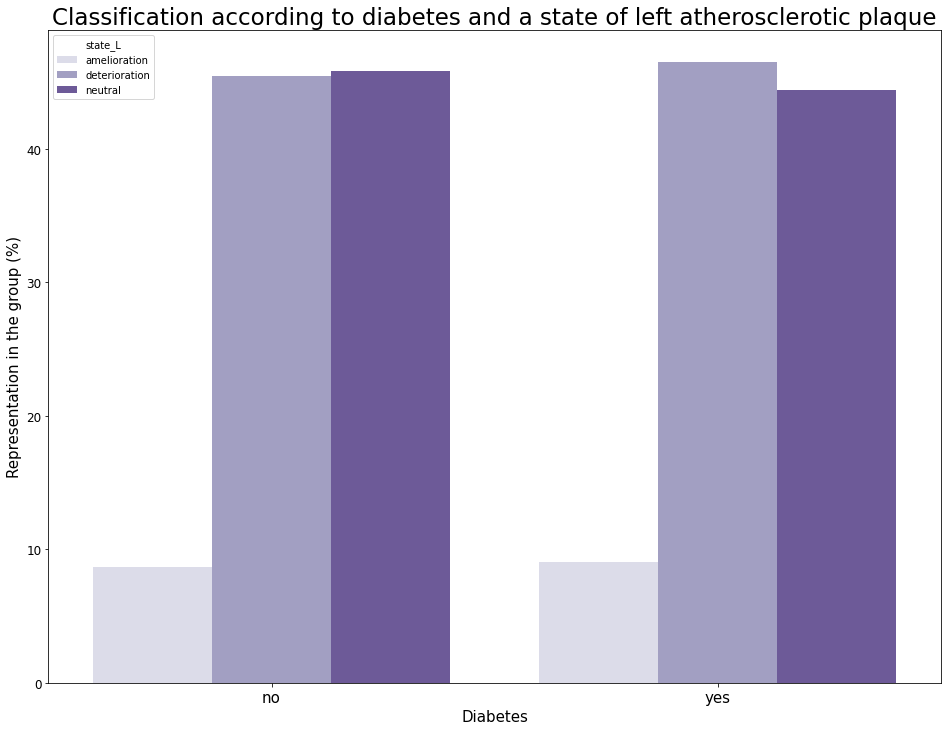

In [260]:
barchar_diab_L = plt.figure(figsize=(16, 12))
sns.barplot(data=df_diab_L, y='percent_L', x='diabetes', hue='state_L', palette='Purples')

plt.xticks([0,1], ['no', 'yes'], fontsize = 15)
plt.yticks(fontsize = 12)
plt.title('Classification according to diabetes and a state of left atherosclerotic plaque', fontsize = 23) # title with fontsize 20
plt.xlabel('Diabetes', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Representation in the group (%)', fontsize = 15) # y-axis label with fontsize 15

Text(0, 0.5, 'Group distribution (%)')

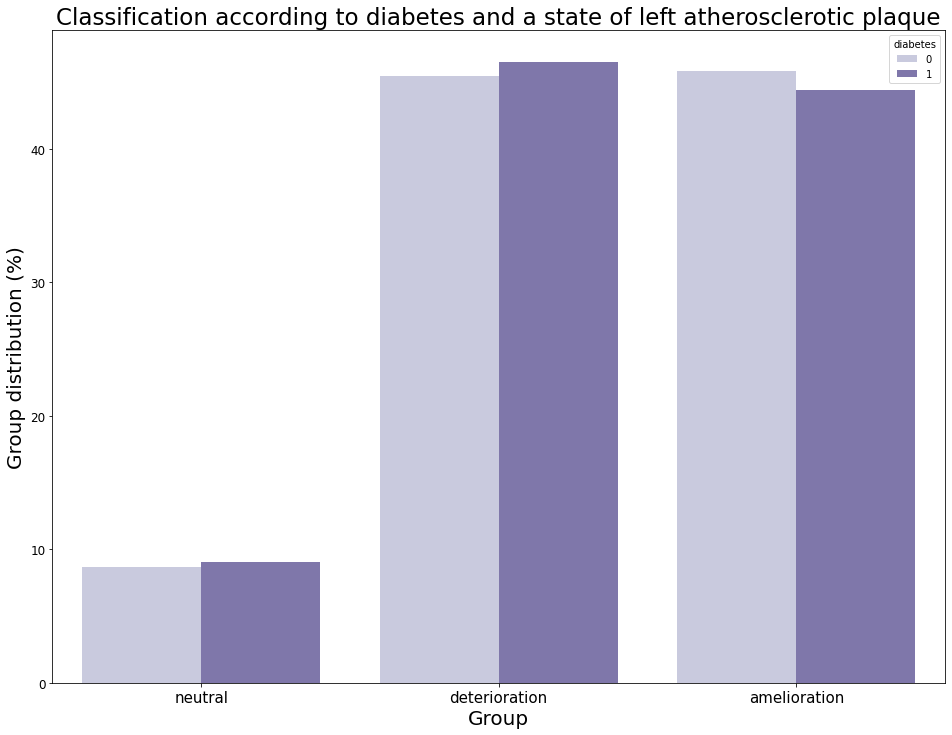

In [261]:
barchar_diab_L_1 = plt.figure(figsize=(16, 12))
sns.barplot(data=df_diab_L, y='percent_L', x='state_L', hue='diabetes', palette='Purples')

plt.xticks([0, 1, 2], ['neutral', 'deterioration' , 'amelioration'], fontsize = 15)
plt.yticks(fontsize = 12)
plt.title('Classification according to diabetes and a state of left atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('Group', fontsize = 20) # x-axis label with fontsize 20
plt.ylabel('Group distribution (%)', fontsize = 20) # y-axis label with fontsize 20

In [262]:
pd.crosstab(df.diabetes, df.state_L)

state_L   amelioration  deterioration  neutral
diabetes                                      
0                   82            429      432
1                   21            108      103

Text(87.0, 0.5, 'Diabetes')

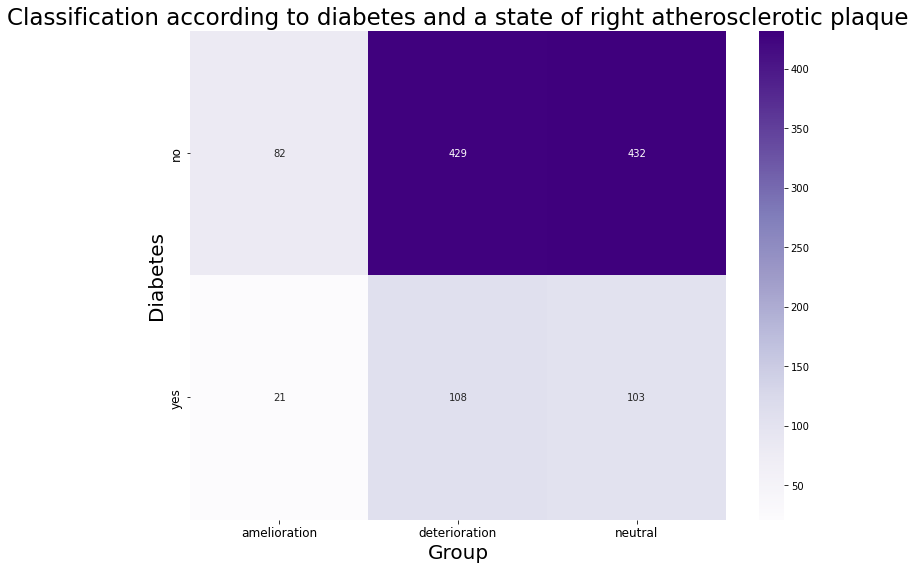

In [263]:
heat_diab_L = plt.figure(figsize=(12,9))
sns.heatmap(pd.crosstab(df.diabetes, df.state_L), annot=True, cmap='Purples', fmt='g')

plt.xticks(fontsize = 12)
plt.yticks([0.5, 1.5], ['no', 'yes'], fontsize = 12)

plt.title('Classification according to diabetes and a state of right atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('Group', fontsize = 20) # x-axis label with fontsize 20
plt.ylabel('Diabetes', fontsize = 20) # y-axis label with fontsize 20

### right plaque

In [264]:
df_diab_R = dfs.groupby(['diabetes', 'state_R']).state_R.count().reset_index(name='count_R')
df_diab_R

diabetes        state_R  count_R
0         0   amelioration       95
1         0  deterioration      665
2         0        neutral      183
3         1   amelioration       22
4         1  deterioration      153
5         1        neutral       57

In [265]:
df_diab_R['percent_R'] = df_diab_R['count_R']/df_diab_state * 100
df_diab_R

diabetes        state_R  count_R  percent_R
0         0   amelioration       95  10.074231
1         0  deterioration      665  70.519618
2         0        neutral      183  19.406151
3         1   amelioration       22   9.482759
4         1  deterioration      153  65.948276
5         1        neutral       57  24.568966

Text(0, 0.5, 'Group distribution (%)')

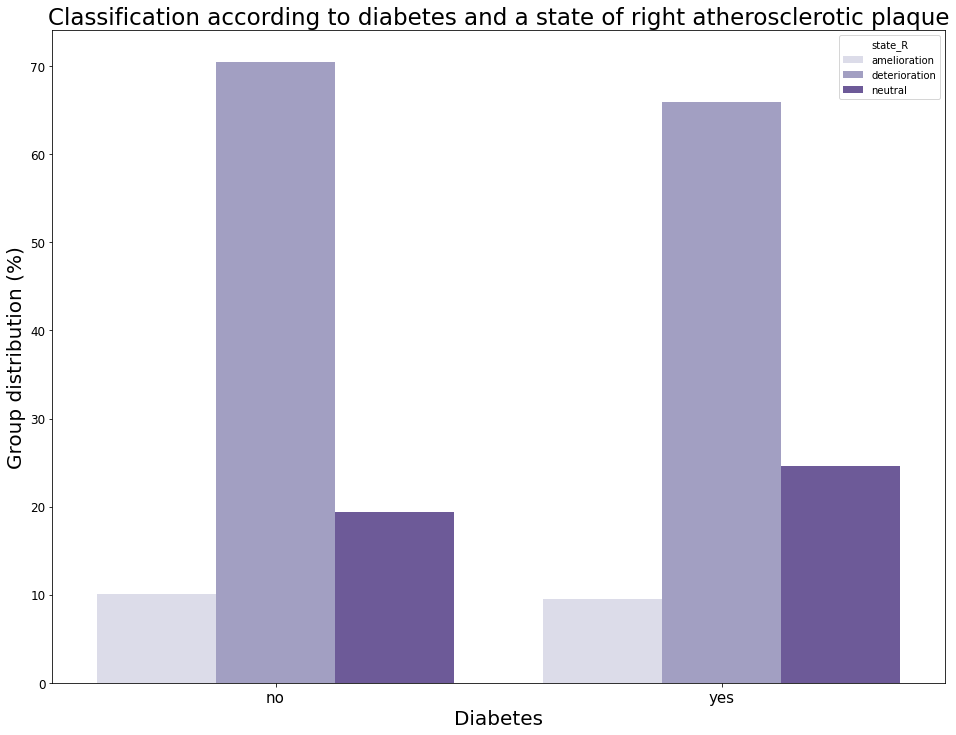

In [266]:
barchar_diab_R = plt.figure(figsize=(16, 12))
sns.barplot(data=df_diab_R, y='percent_R', x='diabetes', hue='state_R', palette='Purples')


plt.xticks([0,1], ['no', 'yes'], fontsize = 15)
plt.yticks(fontsize = 12)
plt.title('Classification according to diabetes and a state of right atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('Diabetes', fontsize = 20) # x-axis label with fontsize 20
plt.ylabel('Group distribution (%)', fontsize = 20) # y-axis label with fontsize 20

Text(0, 0.5, 'Group distribution (%)')

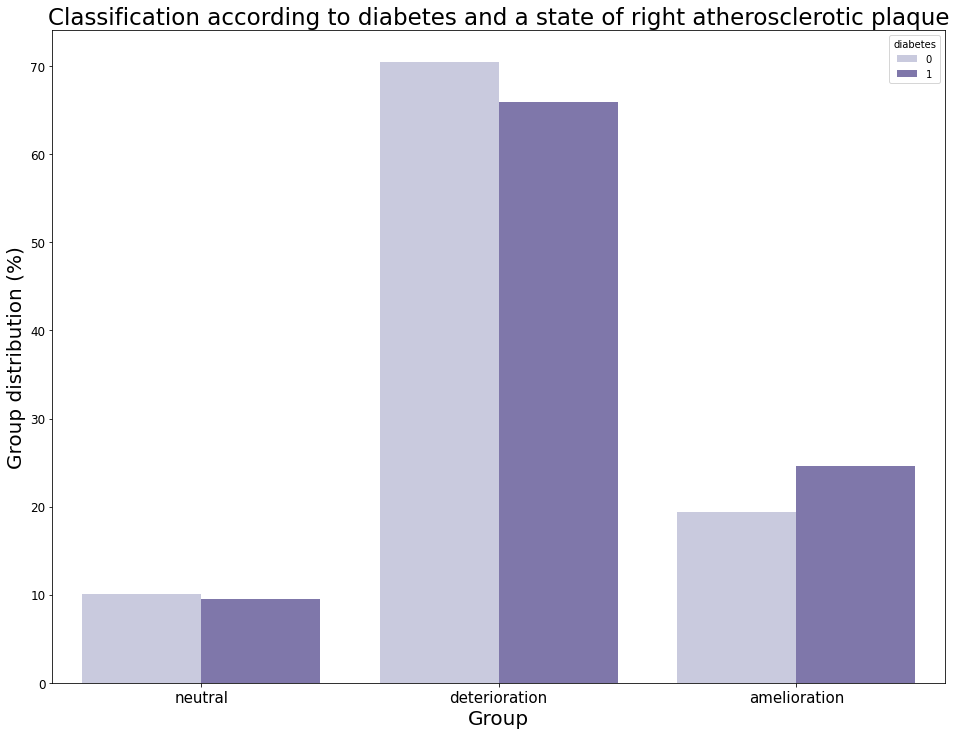

In [267]:
barchar_diab_R_1 = plt.figure(figsize=(16, 12))
sns.barplot(data=df_diab_R, y='percent_R', x='state_R', hue='diabetes', palette='Purples')

plt.xticks([0, 1, 2], ['neutral', 'deterioration' , 'amelioration'], fontsize = 15)
plt.yticks(fontsize = 12)
plt.title('Classification according to diabetes and a state of right atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('Group', fontsize = 20) # x-axis label with fontsize 20
plt.ylabel('Group distribution (%)', fontsize = 20) # y-axis label with fontsize 20

In [268]:
pd.crosstab(df.diabetes, df.state_R)

state_R   amelioration  deterioration  neutral
diabetes                                      
0                   95            665      183
1                   22            153       57

Text(87.0, 0.5, 'Diabetes')

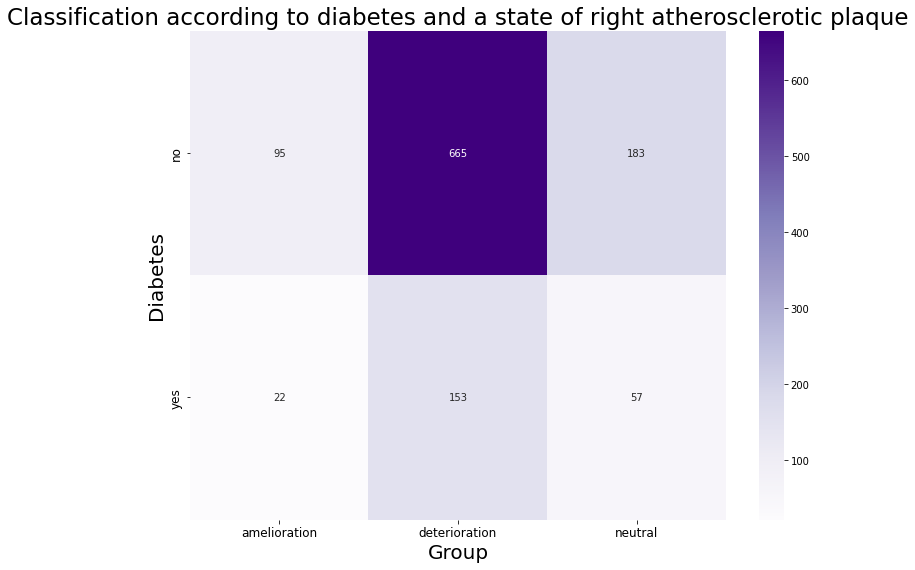

In [269]:
heat_diab_R = plt.figure(figsize=(12,9))
sns.heatmap(pd.crosstab(df.diabetes, df.state_R), annot=True, cmap='Purples', fmt='g')

plt.xticks(fontsize = 12)
plt.yticks([0.5, 1.5], ['no', 'yes'], fontsize = 12)
plt.title('Classification according to diabetes and a state of right atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('Group', fontsize = 20) # x-axis label with fontsize 20
plt.ylabel('Diabetes', fontsize = 20) # y-axis label with fontsize 20

## Combination of factors

Text(0, 0.5, 'Weight')

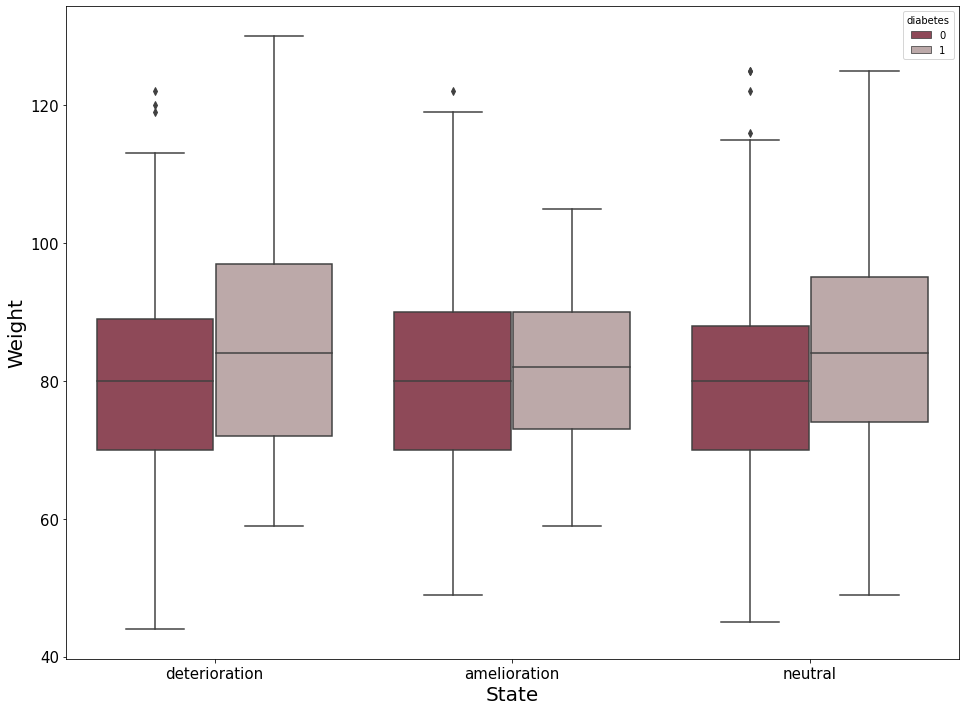

In [270]:
fig = plt.figure(figsize=(16, 12))
sns.boxplot(data=df, y='weight', x='state_L', hue='diabetes', palette=([(0.6,0.24,0.32,0.1),(0.75,0.65,0.65,0.1)]))

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('State', fontsize = 20)
plt.ylabel('Weight', fontsize = 20)

Text(0, 0.5, 'Weight')

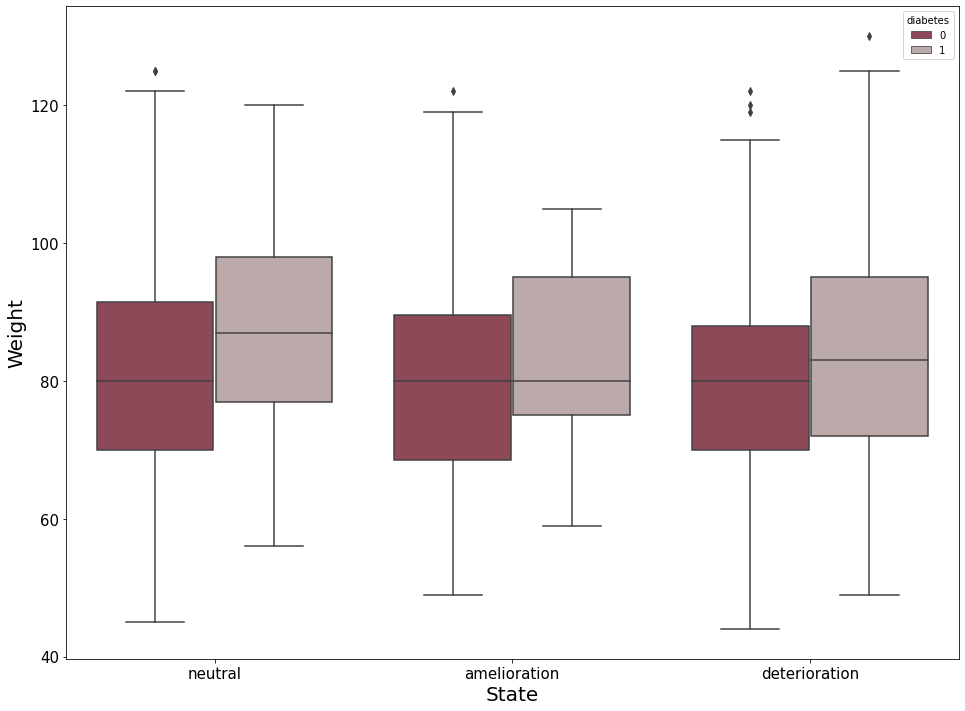

In [271]:
fig = plt.figure(figsize=(16, 12))
sns.boxplot(data=df, y='weight', x='state_R', hue='diabetes', palette=([(0.6,0.24,0.32,0.1),(0.75,0.65,0.65,0.1)]))

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('State', fontsize = 20)
plt.ylabel('Weight', fontsize = 20)

## High-risk group

In [272]:
df_risk = df.loc[:, ['state_L', 'state_R', 'age_class_1', 'BMI_class_1', 'high_blood_pressure', 'cholesterol', 'alcohol_class_1', 'smoking_class_1', 'diabetes']]
df_risk

state_L        state_R  age_class_1  BMI_class_1  \
0     deterioration        neutral            1            1   
1     deterioration   amelioration            0            1   
2      amelioration  deterioration            1            1   
3     deterioration   amelioration            0            1   
4           neutral  deterioration            0            1   
...             ...            ...          ...          ...   
1170  deterioration        neutral            1            1   
1171        neutral  deterioration            1            1   
1172  deterioration  deterioration            0            1   
1173        neutral        neutral            1            1   
1174        neutral  deterioration            1            0   

      high_blood_pressure  cholesterol  alcohol_class_1  smoking_class_1  \
0                       1            0                0                0   
1                       1            0                1                0   
2                       1            1                1                0   
3                       1            0                0                0   
4                       1            0                1                1   
...                   ...          ...              ...              ...   
1170                    1            0                1                0   
1171                    1            1                1                0   
1172                    1            1                1                0   
1173                    1            0                0                0   
1174                    1            1                1                0   

      diabetes  
0            1  
1            0  
2            1  
3            0  
4            0  
...        ...  
1170         0  
1171         0  
1172         0  
1173         1  
1174         0  

[1175 rows x 9 columns]

In [273]:
df['count_risk'] = df_risk.iloc[:,2:-1].sum(axis=1)
dfs['count_risk'] = df_risk.iloc[:,2:-1].sum(axis=1)
df_risk['count_risk'] = df_risk.iloc[:,2:-1].sum(axis=1)
df_risk

state_L        state_R  age_class_1  BMI_class_1  \
0     deterioration        neutral            1            1   
1     deterioration   amelioration            0            1   
2      amelioration  deterioration            1            1   
3     deterioration   amelioration            0            1   
4           neutral  deterioration            0            1   
...             ...            ...          ...          ...   
1170  deterioration        neutral            1            1   
1171        neutral  deterioration            1            1   
1172  deterioration  deterioration            0            1   
1173        neutral        neutral            1            1   
1174        neutral  deterioration            1            0   

      high_blood_pressure  cholesterol  alcohol_class_1  smoking_class_1  \
0                       1            0                0                0   
1                       1            0                1                0   
2                       1            1                1                0   
3                       1            0                0                0   
4                       1            0                1                1   
...                   ...          ...              ...              ...   
1170                    1            0                1                0   
1171                    1            1                1                0   
1172                    1            1                1                0   
1173                    1            0                0                0   
1174                    1            1                1                0   

      diabetes  count_risk  
0            1           3  
1            0           3  
2            1           5  
3            0           2  
4            0           4  
...        ...         ...  
1170         0           4  
1171         0           5  
1172         0           4  
1173         1           3  
1174         0           4  

[1175 rows x 10 columns]

### left plaque

In [274]:
df_risk_L = df_risk.groupby(['state_L', 'count_risk']).state_L.count().reset_index(name='count_L')
df_risk_L

state_L  count_risk  count_L
0    amelioration           1        6
1    amelioration           2       17
2    amelioration           3       27
3    amelioration           4       29
4    amelioration           5       23
5    amelioration           6        1
6   deterioration           0        4
7   deterioration           1       25
8   deterioration           2       64
9   deterioration           3      143
10  deterioration           4      171
11  deterioration           5      116
12  deterioration           6       14
13        neutral           0        6
14        neutral           1       18
15        neutral           2       68
16        neutral           3      150
17        neutral           4      182
18        neutral           5      101
19        neutral           6       10

Text(0, 0.5, 'Number of patiens')

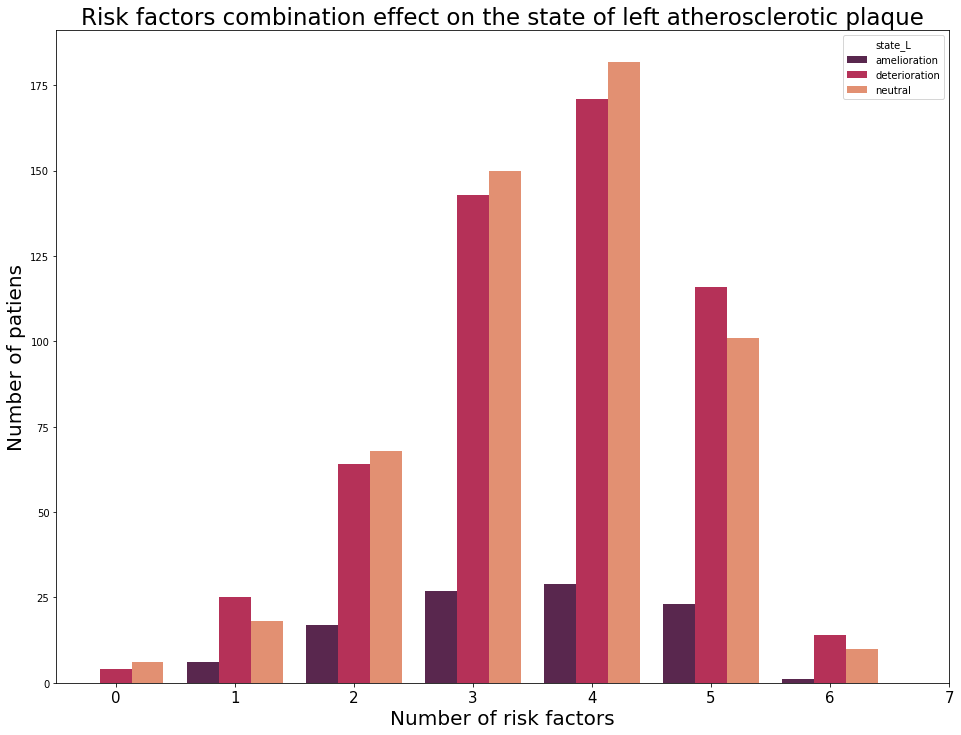

In [275]:
barchar_risk_count_L = plt.figure(figsize=(16, 12))
sns.barplot(data =df_risk_L, x='count_risk', y='count_L', hue='state_L', palette='rocket')


plt.xticks([0,1,2,3,4,5,6,7], [0,1,2,3,4,5,6,7], fontsize = 15)
plt.title('Risk factors combination effect on the state of left atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('Number of risk factors', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Number of patiens', fontsize = 20) # y-axis label with fontsize 15

df_count = [
#df_risk.state_L.loc[(df_risk.state_L == 'amelioration') & (df_risk.count_risk == 0),].count(),
df_risk.state_L.loc[(df_risk.state_L == 'amelioration') & (df_risk.count_risk == 1),].count(),
df_risk.state_L.loc[(df_risk.state_L == 'amelioration') & (df_risk.count_risk == 2),].count(),
df_risk.state_L.loc[(df_risk.state_L == 'amelioration') & (df_risk.count_risk == 3),].count(),
df_risk.state_L.loc[(df_risk.state_L == 'amelioration') & (df_risk.count_risk == 4),].count(),
df_risk.state_L.loc[(df_risk.state_L == 'amelioration') & (df_risk.count_risk == 5),].count(),
df_risk.state_L.loc[(df_risk.state_L == 'amelioration') & (df_risk.count_risk == 6),].count(),
df_risk.state_L.loc[(df_risk.state_L == 'deterioration') & (df_risk.count_risk == 0),].count(),
df_risk.state_L.loc[(df_risk.state_L == 'deterioration') & (df_risk.count_risk == 1),].count(),
df_risk.state_L.loc[(df_risk.state_L == 'deterioration') & (df_risk.count_risk == 2),].count(),
df_risk.state_L.loc[(df_risk.state_L == 'deterioration') & (df_risk.count_risk == 3),].count(),
df_risk.state_L.loc[(df_risk.state_L == 'deterioration') & (df_risk.count_risk == 4),].count(),
df_risk.state_L.loc[(df_risk.state_L == 'deterioration') & (df_risk.count_risk == 5),].count(),
df_risk.state_L.loc[(df_risk.state_L == 'deterioration') & (df_risk.count_risk == 6),].count(),
df_risk.state_L.loc[(df_risk.state_L == 'neutral') & (df_risk.count_risk == 0),].count(),
df_risk.state_L.loc[(df_risk.state_L == 'neutral') & (df_risk.count_risk == 1),].count(),
df_risk.state_L.loc[(df_risk.state_L == 'neutral') & (df_risk.count_risk == 2),].count(),
df_risk.state_L.loc[(df_risk.state_L == 'neutral') & (df_risk.count_risk == 3),].count(),
df_risk.state_L.loc[(df_risk.state_L == 'neutral') & (df_risk.count_risk == 4),].count(),
df_risk.state_L.loc[(df_risk.state_L == 'neutral') & (df_risk.count_risk == 5),].count(),
df_risk.state_L.loc[(df_risk.state_L == 'neutral') & (df_risk.count_risk == 6),].count(),]
len(df_count)

In [276]:
df_count_0_L = [df_risk.state_L.loc[(df_risk.state_L == 'amelioration')].count()]*6, [df_risk.state_L.loc[(df_risk.state_L == 'deterioration')].count()]*7, [df_risk.state_L.loc[(df_risk.state_L == 'neutral')].count()]*7
df_count_L = [item for sublist in df_count_0_L for item in sublist]

In [277]:
df_risk_state_0 = [df_risk.state_L[df_risk.count_risk == 0].count(),
            df_risk.state_L[df_risk.count_risk == 1].count(),
            df_risk.state_L[df_risk.count_risk == 2].count(),
            df_risk.state_L[df_risk.count_risk == 3].count(),
            df_risk.state_L[df_risk.count_risk == 4].count(),
            df_risk.state_L[df_risk.count_risk == 5].count(),
            df_risk.state_L[df_risk.count_risk == 6].count()]
df_risk_state_L = [item for sublist in [df_risk_state_0[1:], df_risk_state_0, df_risk_state_0] for item in sublist]
len(df_risk_state_L)

20

In [278]:
df_risk_L['percent_L'] = df_risk_L.count_L/df_count_L * 100
df_risk_L

state_L  count_risk  count_L  percent_L
0    amelioration           1        6   5.825243
1    amelioration           2       17  16.504854
2    amelioration           3       27  26.213592
3    amelioration           4       29  28.155340
4    amelioration           5       23  22.330097
5    amelioration           6        1   0.970874
6   deterioration           0        4   0.744879
7   deterioration           1       25   4.655493
8   deterioration           2       64  11.918063
9   deterioration           3      143  26.629423
10  deterioration           4      171  31.843575
11  deterioration           5      116  21.601490
12  deterioration           6       14   2.607076
13        neutral           0        6   1.121495
14        neutral           1       18   3.364486
15        neutral           2       68  12.710280
16        neutral           3      150  28.037383
17        neutral           4      182  34.018692
18        neutral           5      101  18.878505
19        neutral           6       10   1.869159

In [279]:
df_risk_L['percent_L1'] = df_risk_L.count_L/df_risk_state_L * 100
df_risk_L

state_L  count_risk  count_L  percent_L  percent_L1
0    amelioration           1        6   5.825243   12.244898
1    amelioration           2       17  16.504854   11.409396
2    amelioration           3       27  26.213592    8.437500
3    amelioration           4       29  28.155340    7.591623
4    amelioration           5       23  22.330097    9.583333
5    amelioration           6        1   0.970874    4.000000
6   deterioration           0        4   0.744879   40.000000
7   deterioration           1       25   4.655493   51.020408
8   deterioration           2       64  11.918063   42.953020
9   deterioration           3      143  26.629423   44.687500
10  deterioration           4      171  31.843575   44.764398
11  deterioration           5      116  21.601490   48.333333
12  deterioration           6       14   2.607076   56.000000
13        neutral           0        6   1.121495   60.000000
14        neutral           1       18   3.364486   36.734694
15        neutral           2       68  12.710280   45.637584
16        neutral           3      150  28.037383   46.875000
17        neutral           4      182  34.018692   47.643979
18        neutral           5      101  18.878505   42.083333
19        neutral           6       10   1.869159   40.000000

Text(0, 0.5, 'Representation in the group (%)')

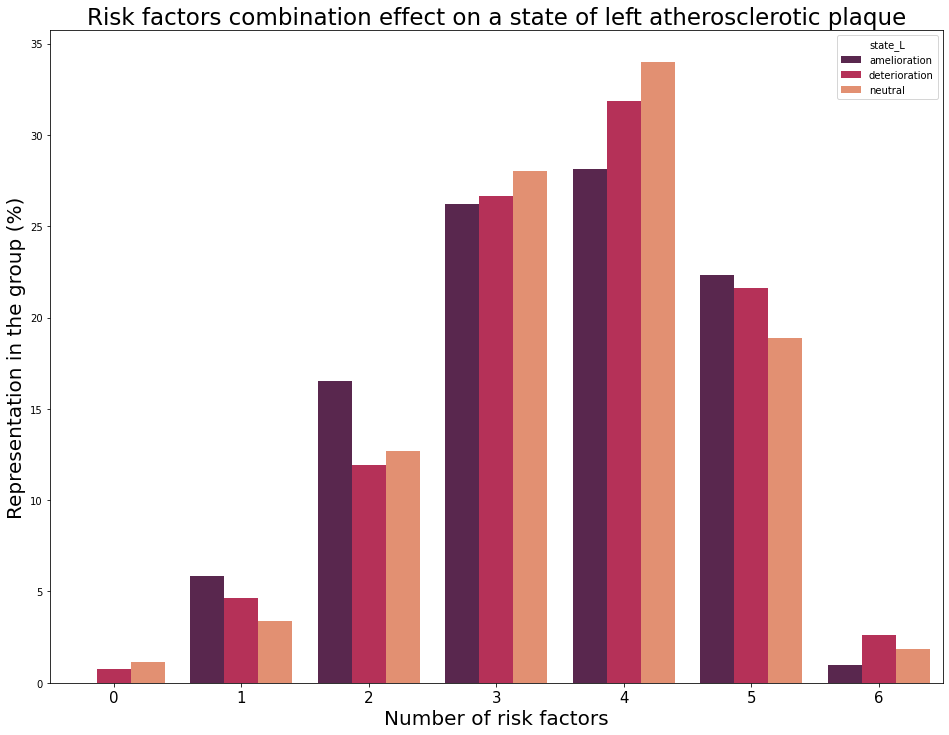

In [280]:
barchar_risk_percent_L = plt.figure(figsize=(16, 12))
sns.barplot(data =df_risk_L, x='count_risk', y='percent_L', hue='state_L', palette='rocket')


plt.xticks([0,1,2,3,4,5,6], [0,1,2,3,4,5,6], fontsize = 15)
plt.title('Risk factors combination effect on a state of left atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('Number of risk factors', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Representation in the group (%)', fontsize = 20) # y-axis label with fontsize 15

Text(0, 0.5, 'Representation in the group (%)')

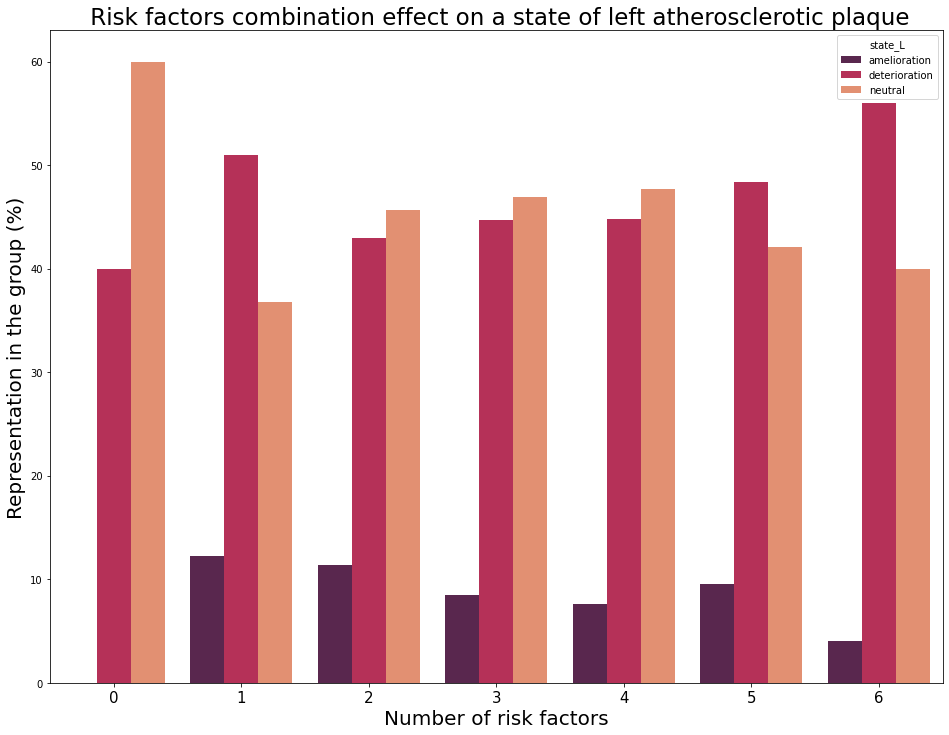

In [281]:
barchar_risk_percent_L_1 = plt.figure(figsize=(16, 12))
sns.barplot(data =df_risk_L, x='count_risk', y='percent_L1', hue='state_L', palette='rocket')


plt.xticks([0,1,2,3,4,5,6], [0,1,2,3,4,5,6], fontsize = 15)
plt.title(' Risk factors combination effect on a state of left atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('Number of risk factors', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Representation in the group (%)', fontsize = 20) # y-axis label with fontsize 15

### right plaque

In [282]:
df_risk_R = df_risk.groupby(['state_R', 'count_risk']).state_R.count().reset_index(name='count_R')
df_risk_R

state_R  count_risk  count_R
0    amelioration           0        1
1    amelioration           1        9
2    amelioration           2       20
3    amelioration           3       28
4    amelioration           4       35
5    amelioration           5       22
6    amelioration           6        2
7   deterioration           0        9
8   deterioration           1       34
9   deterioration           2      104
10  deterioration           3      222
11  deterioration           4      267
12  deterioration           5      166
13  deterioration           6       16
14        neutral           1        6
15        neutral           2       25
16        neutral           3       70
17        neutral           4       80
18        neutral           5       52
19        neutral           6        7

Text(0, 0.5, 'Number of patiens')

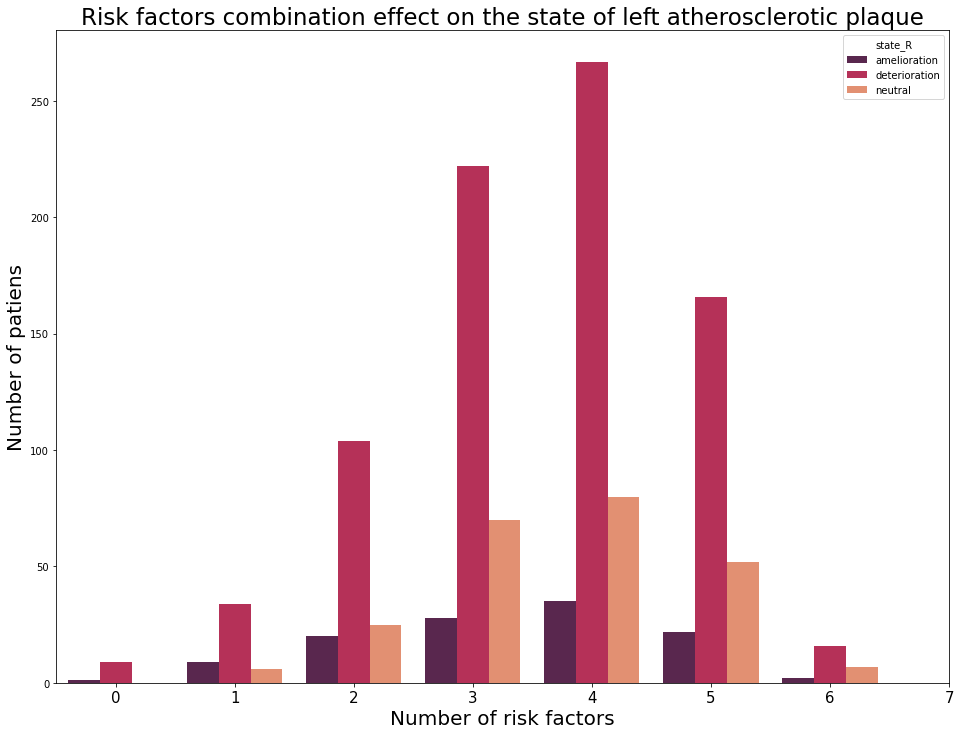

In [283]:
barchar_risk_count_R = plt.figure(figsize=(16, 12))
sns.barplot(data =df_risk_R, x='count_risk', y='count_R', hue='state_R', palette='rocket')


plt.xticks([0,1,2,3,4,5,6,7], [0,1,2,3,4,5,6,7], fontsize = 15)
plt.title('Risk factors combination effect on the state of left atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('Number of risk factors', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Number of patiens', fontsize = 20) # y-axis label with fontsize 15

In [284]:
df_count_0 = [df_risk.state_R.loc[(df_risk.state_R == 'amelioration')].count()]*7, [df_risk.state_R.loc[(df_risk.state_R == 'deterioration')].count()]*7, [df_risk.state_R.loc[(df_risk.state_R == 'neutral')].count()]*6
#df_count_0 = [df_risk.state_R.loc[(df_risk.state_R == 'amelioration')].count()]*7, [df_risk.state_R.loc[(df_risk.state_R == 'deterioration')].count()]*7, [df_risk.state_R.loc[(df_risk.state_R == 'neutral')].count()]*7
df_count_R = [item for sublist in df_count_0 for item in sublist]

In [285]:
df_risk_state_1 = [df_risk.state_R[df_risk.count_risk == 0].count(),
            df_risk.state_R[df_risk.count_risk == 1].count(),
            df_risk.state_R[df_risk.count_risk == 2].count(),
            df_risk.state_R[df_risk.count_risk == 3].count(),
            df_risk.state_R[df_risk.count_risk == 4].count(),
            df_risk.state_R[df_risk.count_risk == 5].count(),
            df_risk.state_R[df_risk.count_risk == 6].count()]
df_risk_state_R = [item for sublist in [df_risk_state_1, df_risk_state_1, df_risk_state_1[1:]] for item in sublist]
#df_risk_state_R = [item for sublist in [df_risk_state_1, df_risk_state_1, df_risk_state_1] for item in sublist]
len(df_risk_state_R)

20

In [286]:
df_risk_R['percent_R'] = df_risk_R.count_R/df_risk_state_R * 100
df_risk_R

state_R  count_risk  count_R  percent_R
0    amelioration           0        1  10.000000
1    amelioration           1        9  18.367347
2    amelioration           2       20  13.422819
3    amelioration           3       28   8.750000
4    amelioration           4       35   9.162304
5    amelioration           5       22   9.166667
6    amelioration           6        2   8.000000
7   deterioration           0        9  90.000000
8   deterioration           1       34  69.387755
9   deterioration           2      104  69.798658
10  deterioration           3      222  69.375000
11  deterioration           4      267  69.895288
12  deterioration           5      166  69.166667
13  deterioration           6       16  64.000000
14        neutral           1        6  12.244898
15        neutral           2       25  16.778523
16        neutral           3       70  21.875000
17        neutral           4       80  20.942408
18        neutral           5       52  21.666667
19        neutral           6        7  28.000000

In [287]:
df_risk_R['percent_R1'] = df_risk_R.count_R/df_count_R * 100
df_risk_R

state_R  count_risk  count_R  percent_R  percent_R1
0    amelioration           0        1  10.000000    0.854701
1    amelioration           1        9  18.367347    7.692308
2    amelioration           2       20  13.422819   17.094017
3    amelioration           3       28   8.750000   23.931624
4    amelioration           4       35   9.162304   29.914530
5    amelioration           5       22   9.166667   18.803419
6    amelioration           6        2   8.000000    1.709402
7   deterioration           0        9  90.000000    1.100244
8   deterioration           1       34  69.387755    4.156479
9   deterioration           2      104  69.798658   12.713936
10  deterioration           3      222  69.375000   27.139364
11  deterioration           4      267  69.895288   32.640587
12  deterioration           5      166  69.166667   20.293399
13  deterioration           6       16  64.000000    1.955990
14        neutral           1        6  12.244898    2.500000
15        neutral           2       25  16.778523   10.416667
16        neutral           3       70  21.875000   29.166667
17        neutral           4       80  20.942408   33.333333
18        neutral           5       52  21.666667   21.666667
19        neutral           6        7  28.000000    2.916667

Text(0, 0.5, 'Representation in the group (%)')

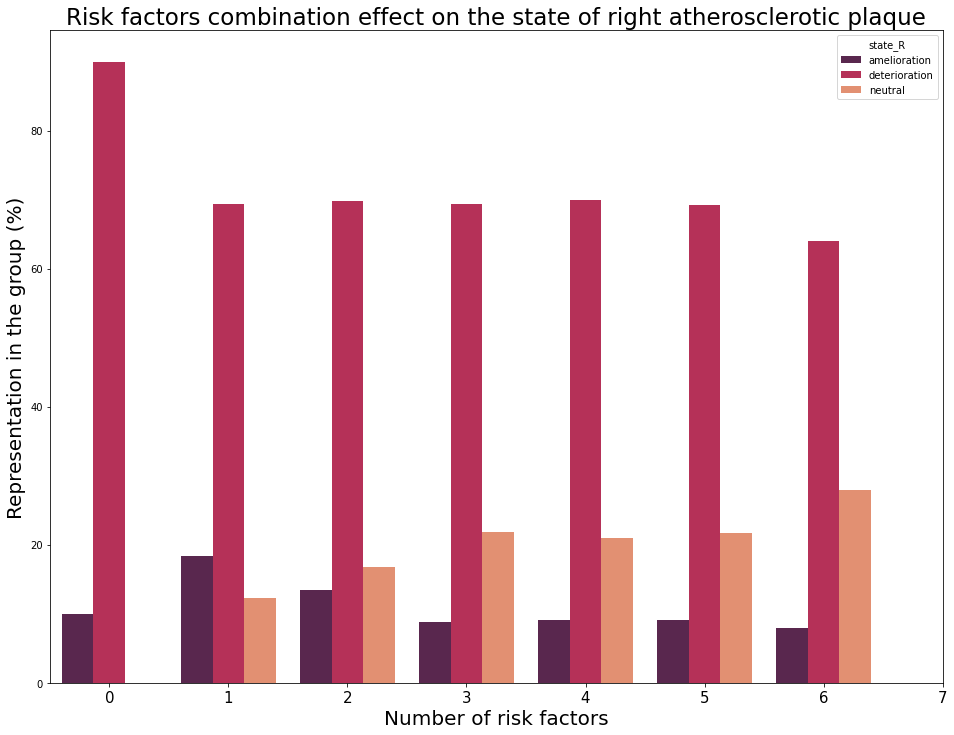

In [447]:
barchar_risk_percent_R = plt.figure(figsize=(16, 12))
sns.barplot(data =df_risk_R, x='count_risk', y='percent_R', hue='state_R', palette='rocket')


plt.xticks([0,1,2,3,4,5,6,7], [0,1,2,3,4,5,6,7], fontsize = 15)
plt.title('Risk factors combination effect on the state of right atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('Number of risk factors', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Representation in the group (%)', fontsize = 20) # y-axis label with fontsize 15

Text(0, 0.5, 'Representation in the group (%)')

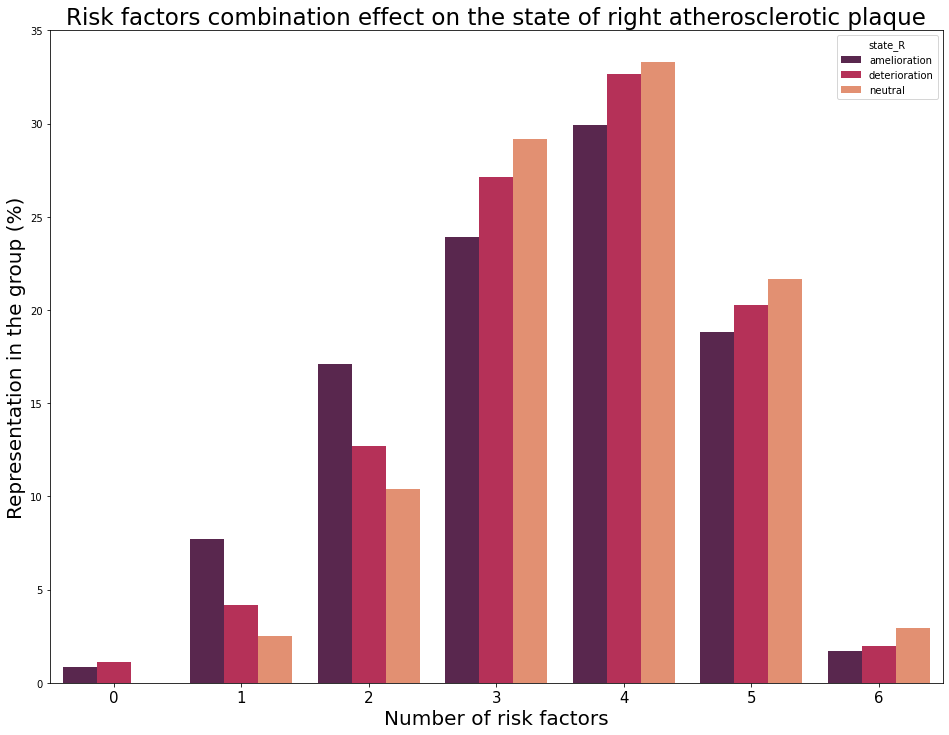

In [448]:
barchar_risk_percent_R_1 = plt.figure(figsize=(16, 12))
sns.barplot(data =df_risk_R, x='count_risk', y='percent_R1', hue='state_R', palette='rocket')


plt.xticks([0,1,2,3,4,5,6], [0,1,2,3,4,5,6], fontsize = 15)
plt.title('Risk factors combination effect on the state of right atherosclerotic plaque', fontsize = 23) # title with fontsize 23
plt.xlabel('Number of risk factors', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Representation in the group (%)', fontsize = 20) # y-axis label with fontsize 15

# Mashine Learning

## Decision Tree (L)

### Decision Tree Regressor (with left plaque 2015 value)

In [290]:
X = df.loc[:, ['plaque_left_2015', 'age','BMI',  'systolic_BP', 'diastolic_BP', 'high_blood_pressure', 'cholesterol', 'alcohol', 'sex',  'smoking', 'diabetes']]
y = df.plaque_left_2018

In [291]:
X.shape, y.shape

((1175, 11), (1175,))

In [292]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [293]:
X_train.head()

plaque_left_2015 age        BMI  systolic_BP  diastolic_BP  \
1079               2.9  79  24.618104          140            80   
615                1.8  71  32.031250          160           100   
65                 4.0  75  27.141582          150           100   
15                 3.2  50  25.564954          130            80   
1159               2.8  79  27.180900          120            70   

      high_blood_pressure  cholesterol  alcohol  sex  smoking  diabetes  
1079                    1            0        0    1        0         0  
615                     1            1        1    0        0         1  
65                      1            1        0    1        0         0  
15                      1            0        2    1        1         0  
1159                    1            1        1    0        0         1

In [294]:
X_test.head()

plaque_left_2015 age        BMI  systolic_BP  diastolic_BP  \
6                  1.8  76  24.835763          125            70   
159                2.3  81  21.967120          140            90   
1004               3.3  89  27.055151          140            80   
764                1.5  71  23.183391          130            80   
665                1.5  71  36.932124          130            80   

      high_blood_pressure  cholesterol  alcohol  sex  smoking  diabetes  
6                       1            0        0    0        0         0  
159                     0            0        0    0        0         0  
1004                    1            0        0    0        0         0  
764                     1            1        0    1        0         1  
665                     1            0        1    0        0         1

In [295]:
alg = DecisionTreeRegressor()

In [296]:
alg.fit(X_train, y_train)

DecisionTreeRegressor()

In [297]:
y_pred = alg.predict(X_test)

In [298]:
compute_metrics_raw(y_true=y_test, y_pred=y_pred)

MAE       MSE       MAPE     SMAPE       R2       WAPE
0  0.507447  0.568351  17.814335  16.80252  0.51291  17.182997

<AxesSubplot:ylabel='plaque_left_2018'>

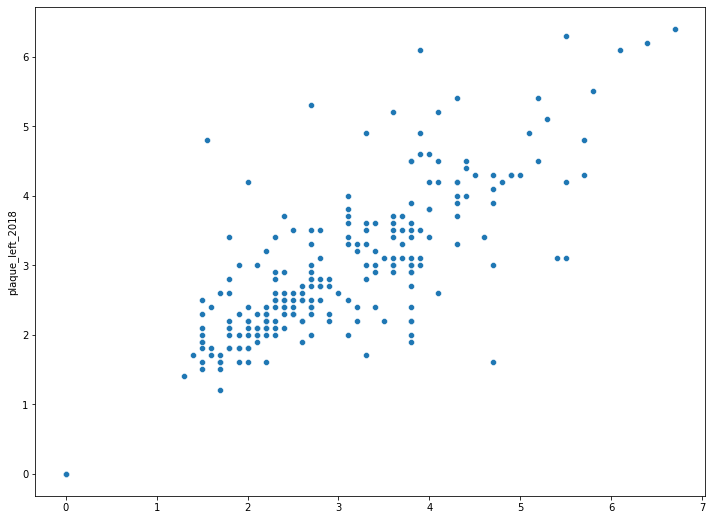

In [299]:
fig = plt.figure(figsize=(12,9))
sns.scatterplot(x=y_pred, y=y_test)

In [300]:
df_feat = pd.DataFrame({'Feature': X_train.columns, 'ImportanceScore': alg.feature_importances_}).sort_values(by='ImportanceScore', ascending=False)
df_feat.head(10)

Feature  ImportanceScore
0      plaque_left_2015         0.797626
2                   BMI         0.084981
1                   age         0.032433
3           systolic_BP         0.027775
4          diastolic_BP         0.017811
7               alcohol         0.015130
8                   sex         0.006176
9               smoking         0.005183
10             diabetes         0.005035
5   high_blood_pressure         0.004712

<AxesSubplot:ylabel='plaque_left_2018'>

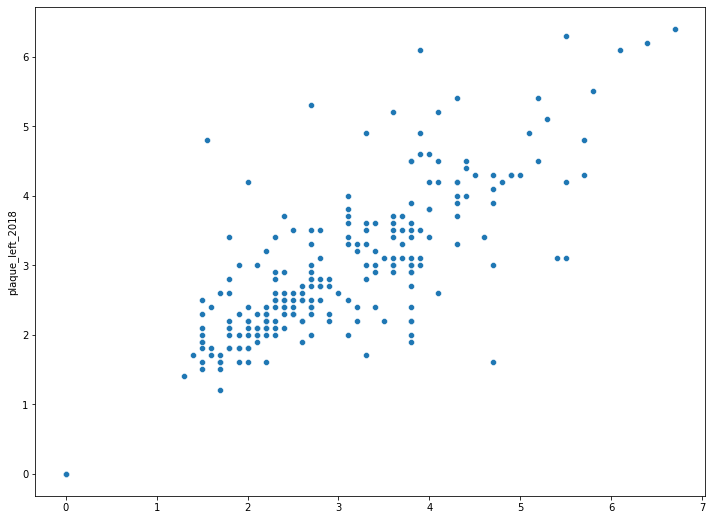

In [301]:
fig = plt.figure(figsize=(12,9))
sns.scatterplot(x=y_pred, y=y_test)

<AxesSubplot:xlabel='height', ylabel='weight'>

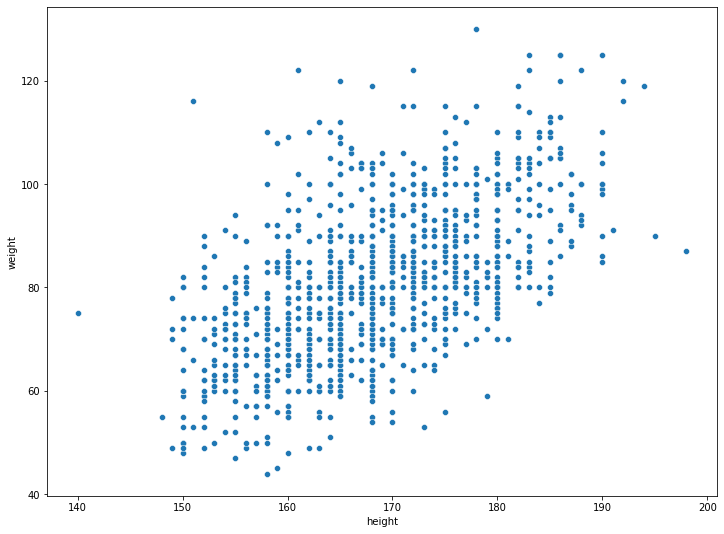

In [302]:
fig = plt.figure(figsize=(12,9))
sns.scatterplot(x=df['height'], y=df['weight'])

Text(0, 0.5, 'Feature')

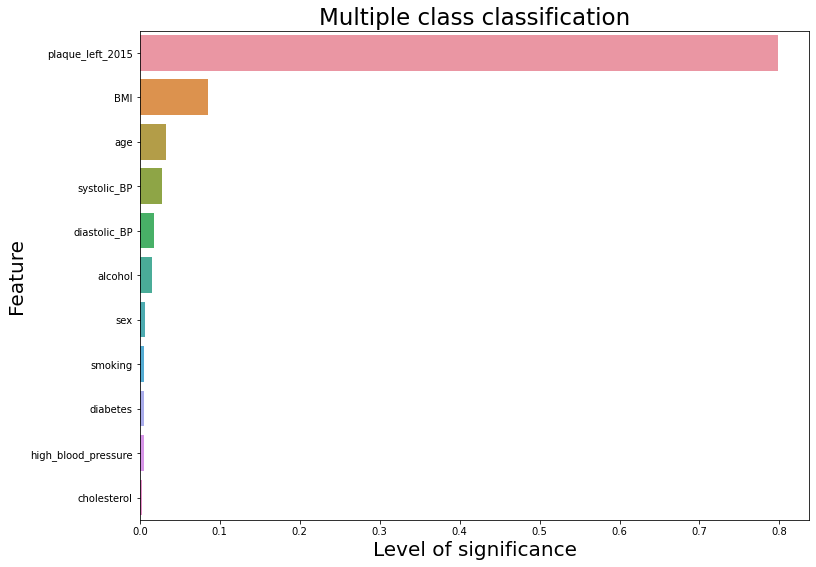

In [303]:
fig = plt.figure(figsize=(12,9))
sns.barplot(data = df_feat, x='ImportanceScore', y='Feature')


plt.title('Multiple class classification', fontsize = 23) # title with fontsize 23
plt.xlabel('Level of significance', fontsize = 20) # x-axis label with fontsize 20
plt.ylabel('Feature', fontsize = 20) # y-axis label with fontsize 20

### Decision Tree Regressor (without the left plaque 2015 value)

In [304]:
X = df.loc[:, ['age','BMI',  'systolic_BP', 'diastolic_BP', 'high_blood_pressure', 'cholesterol', 'alcohol', 'sex',  'smoking', 'diabetes']]
y = df.plaque_left_2018

In [305]:
X.shape, y.shape

((1175, 10), (1175,))

In [306]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [307]:
X_train.head()

age        BMI  systolic_BP  diastolic_BP  high_blood_pressure  \
25    58  33.802055          120            70                    1   
433   70  31.245237          120            70                    1   
1033  59  24.151673          120            60                    0   
821   47  28.055706          130            80                    0   
701   77  24.675500          130            80                    1   

      cholesterol  alcohol  sex  smoking  diabetes  
25              1        0    0        0         0  
433             1        1    0        0         1  
1033            1        1    1        2         0  
821             0        2    1        1         0  
701             1        0    0        0         0

In [308]:
X_test.head()

age        BMI  systolic_BP  diastolic_BP  high_blood_pressure  \
402   87  30.297784          120            70                    1   
1057  67  26.912726          130            80                    1   
358   78  23.888441          160            90                    1   
322   74  26.643599          130            70                    0   
1086  61  30.078125          160           100                    1   

      cholesterol  alcohol  sex  smoking  diabetes  
402             1        0    0        0         0  
1057            0        1    0        0         0  
358             0        0    1        0         0  
322             0        1    0        0         0  
1086            0        1    0        0         0

In [309]:
alg = DecisionTreeRegressor()

In [310]:
alg.fit(X_train, y_train)

DecisionTreeRegressor()

In [311]:
y_pred = alg.predict(X_test)

In [312]:
compute_metrics_raw(y_true=y_test, y_pred=y_pred)

MAE       MSE  MAPE      SMAPE        R2       WAPE
0  1.197872  2.340553   inf  38.835267 -1.094763  40.398967

<AxesSubplot:ylabel='plaque_left_2018'>

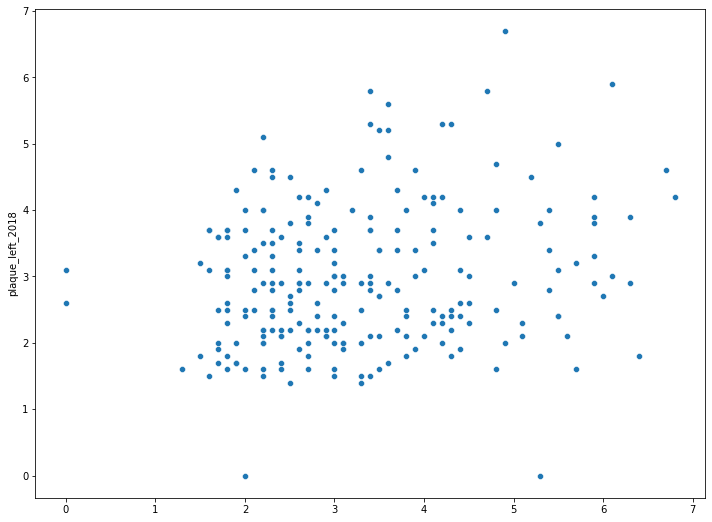

In [313]:
fig = plt.figure(figsize=(12,9))
sns.scatterplot(x=y_pred, y=y_test)

In [314]:
df_feat = pd.DataFrame({'Feature': X_train.columns, 'ImportanceScore': alg.feature_importances_}).sort_values(by='ImportanceScore', ascending=False)
df_feat.head(10)

Feature  ImportanceScore
1                  BMI         0.334182
0                  age         0.246940
2          systolic_BP         0.135733
3         diastolic_BP         0.073157
6              alcohol         0.052394
7                  sex         0.044519
8              smoking         0.041885
5          cholesterol         0.025667
9             diabetes         0.023664
4  high_blood_pressure         0.021859

Text(0, 0.5, 'Feature')

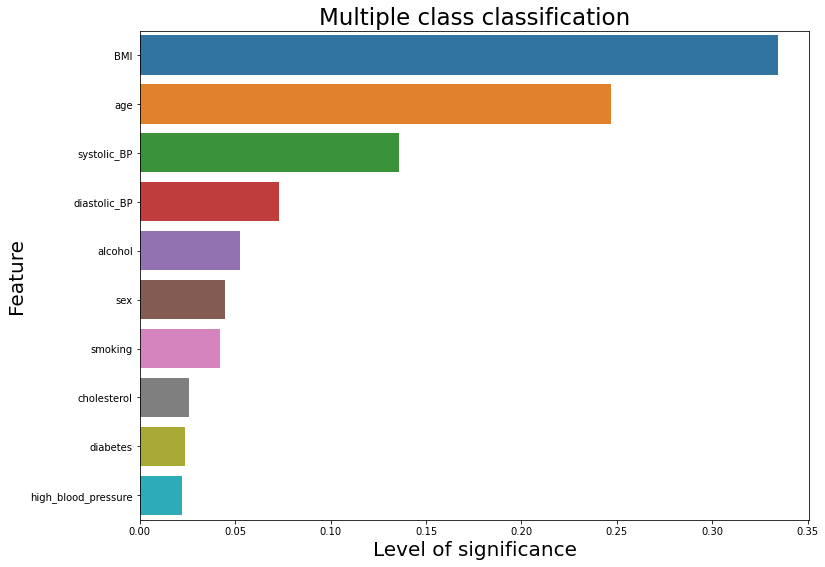

In [315]:
fig = plt.figure(figsize=(12,9))
sns.barplot(data = df_feat, x='ImportanceScore', y='Feature')


plt.title('Multiple class classification', fontsize = 23) # title with fontsize 23
plt.xlabel('Level of significance', fontsize = 20) # x-axis label with fontsize 20
plt.ylabel('Feature', fontsize = 20) # y-axis label with fontsize 20

### Decision Tree Classifier (with left plaque 2015 value)
- 'Neutralni': 0
- 'Zhorseni': -1
- 'Zlepseni': 1

In [316]:
df.columns

Index(['ID', 'plaque_left_2015', 'plaque_right_2015', 'plaque_left_2018',
       'plaque_right_2018', 'year_of_birth', 'age', 'sex', 'weight', 'height',
       'high_blood_pressure', 'systolic_BP', 'diastolic_BP', 'cholesterol',
       'diabetes', 'alcohol', 'smoking', 'age_class', 'age_class_1', 'BMI',
       'BMI_class', 'BMI_class_1', 'BP_class_1', 'alcohol_class_1',
       'smoking_class_1', 'state_L', 'state_num_L', 'state_R', 'state_num_R',
       'smoker_class_1', 'smoker', 'count_risk'],
      dtype='object')

In [317]:
X = df.loc[:, ['plaque_left_2015', 'age','BMI',  'systolic_BP', 'diastolic_BP', 'high_blood_pressure', 'cholesterol', 'alcohol', 'sex',  'smoking', 'diabetes']]
y = df.state_num_L

In [318]:
X.shape, y.shape

((1175, 11), (1175,))

In [319]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [320]:
X_train.head()

plaque_left_2015 age        BMI  systolic_BP  diastolic_BP  \
589                4.6  65  27.143037          130            80   
715                2.2  55  26.122449          130            80   
47                 4.6  77  26.472107          140            80   
745                2.4  67  31.887755          130            80   
1071               2.2  52  36.131345          135            80   

      high_blood_pressure  cholesterol  alcohol  sex  smoking  diabetes  
589                     1            1        1    1        0         0  
715                     0            1        2    1        1         0  
47                      1            1        0    1        0         0  
745                     1            1        1    0        0         0  
1071                    1            0        1    1        0         0

In [321]:
X_test.head()

plaque_left_2015 age        BMI  systolic_BP  diastolic_BP  \
597               2.9  64  31.887755          150            80   
80                3.0  79  36.357341          170            90   
57                3.7  75  28.719723          130            80   
404               2.1  71  31.217482          130            80   
515               3.1  72  25.165146          120            80   

     high_blood_pressure  cholesterol  alcohol  sex  smoking  diabetes  
597                    1            1        1    0        1         0  
80                     1            1        0    0        0         0  
57                     1            1        2    1        0         0  
404                    1            0        0    0        0         1  
515                    1            0        0    1        0         0

In [322]:
y_test

597     0
80      0
57     -1
404    -1
515     0
       ..
1066    1
709    -1
625     0
87     -1
727    -1
Name: state_num_L, Length: 235, dtype: int64

In [323]:
alg = DecisionTreeClassifier()

In [324]:
alg.fit(X_train, y_train)

DecisionTreeClassifier()

In [325]:
y_pred = alg.predict(X_test)

In [326]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.46382978723404256

In [327]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[64, 37,  7],
       [54, 44,  7],
       [10, 11,  1]], dtype=int64)

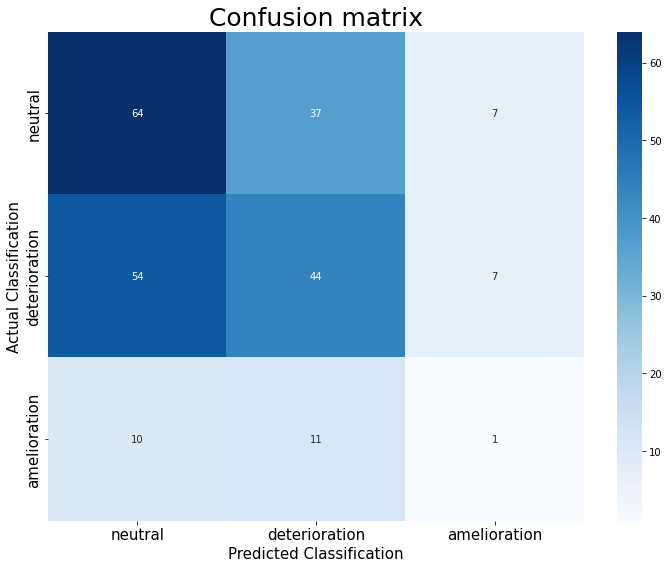

In [328]:
fig = plt.figure(figsize=(12,9))
ax = sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_pred), annot=True, cmap='Blues', fmt='g')
#ax.set(xlabel='Predicted Classification', ylabel='Actual Classification', fontsize = 20)

plt.xlabel('Predicted Classification', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Actual Classification', fontsize = 15) # y-axis label with fontsize 15
plt.xticks([0.5, 1.5, 2.5],['neutral', 'deterioration' , 'amelioration'], fontsize = 15)
plt.yticks([0.5, 1.5, 2.5],['neutral', 'deterioration' , 'amelioration'], fontsize = 15)
plt.title('Confusion matrix', fontsize = 25) # title with fontsize 20
plt.show()

In [329]:
df_feat = pd.DataFrame({'Feature': X_train.columns, 'ImportanceScore': alg.feature_importances_}).sort_values(by='ImportanceScore', ascending=False)
df_feat.head(10)

Feature  ImportanceScore
2                   BMI         0.260339
1                   age         0.203927
0      plaque_left_2015         0.189455
3           systolic_BP         0.089933
4          diastolic_BP         0.069474
7               alcohol         0.047801
6           cholesterol         0.039492
9               smoking         0.033199
5   high_blood_pressure         0.028650
10             diabetes         0.020237

<AxesSubplot:xlabel='ImportanceScore', ylabel='Feature'>

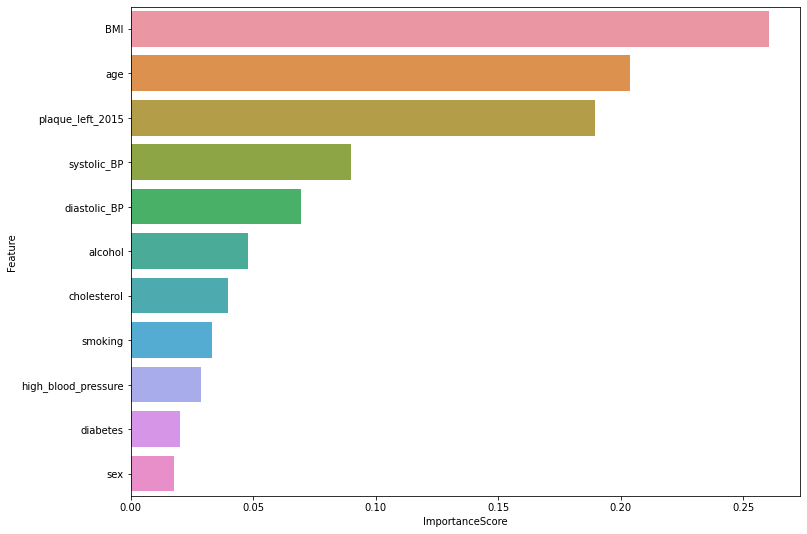

In [330]:
fig = plt.figure(figsize=(12,9))
sns.barplot(data = df_feat, x='ImportanceScore', y='Feature')

### Decision Tree Classifier (without the left plaque 2015 value)
- 'Neutralni': 0
- 'Zhorseni': -1
- 'Zlepseni': 1

In [331]:
X = df.loc[:, ['age','BMI',  'systolic_BP', 'diastolic_BP', 'high_blood_pressure', 'cholesterol', 'alcohol', 'sex',  'smoking', 'diabetes']]
y = df.state_num_L

In [332]:
X.shape, y.shape

((1175, 10), (1175,))

In [333]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [334]:
X_train.head()

age        BMI  systolic_BP  diastolic_BP  high_blood_pressure  \
575   81  32.049948          140            80                    1   
1159  79  27.180900          120            70                    1   
512   69  25.711662          130            80                    0   
606   64  26.543210          130            80                    1   
49    65  24.391059          130            70                    0   

      cholesterol  alcohol  sex  smoking  diabetes  
575             0        1    0        0         0  
1159            1        1    0        0         1  
512             0        1    0        1         0  
606             1        0    1        0         0  
49              0        2    1        0         0

In [335]:
X_test.head()

age        BMI  systolic_BP  diastolic_BP  high_blood_pressure  \
1132  77  24.111507          145            70                    1   
34    72  28.125000          135            80                    1   
275   68  32.699168          136            80                    1   
242   66  28.409091          130            80                    1   
166   69  30.483158          130            80                    1   

      cholesterol  alcohol  sex  smoking  diabetes  
1132            0        2    1        0         0  
34              1        1    0        0         0  
275             0        1    1        0         0  
242             1        0    1        0         1  
166             0        0    0        0         0

In [336]:
alg = DecisionTreeClassifier()

In [337]:
alg.fit(X_train, y_train)

DecisionTreeClassifier()

In [338]:
y_pred = alg.predict(X_test)

In [339]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.4425531914893617

In [340]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[56, 41, 11],
       [60, 46,  7],
       [ 7,  5,  2]], dtype=int64)

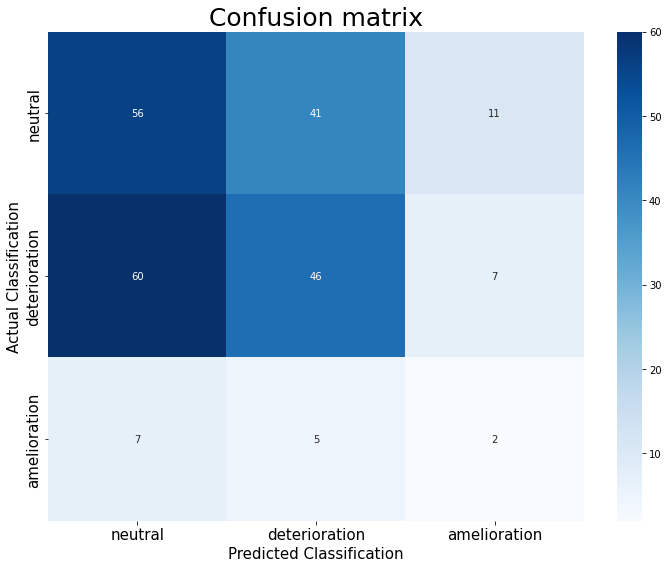

In [341]:
fig = plt.figure(figsize=(12,9))
ax = sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_pred), annot=True, cmap='Blues', fmt='g', xticklabels=('deterioration','neutral','amelioration'), yticklabels=('deterioration','neutral','amelioration'))
#ax.set(xlabel='Predikce', ylabel='Skutečnost', title='Cathegorization according to and a state of left atherosclerotic plaque')

plt.xlabel('Predicted Classification', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Actual Classification', fontsize = 15) # y-axis label with fontsize 15
plt.xticks([0.5, 1.5, 2.5],['neutral', 'deterioration' , 'amelioration'], fontsize = 15)
plt.yticks([0.5, 1.5, 2.5],['neutral', 'deterioration' , 'amelioration'], fontsize = 15)
plt.title('Confusion matrix', fontsize = 25) # title with fontsize 20
plt.show()
#plt.xticks([1, 3, 5],['deterioration','neutral','amelioration'], fontsize = 20)
#plt.yticks([1, 3, 5],['deterioration','neutral','amelioration'], fontsize = 20)
#plt.xticklabels('deterioration','neutral','amelioration'), yticklabels=('deterioration','neutral','amelioration')
plt.show()

In [342]:
df_feat = pd.DataFrame({'Feature': X_train.columns, 'ImportanceScore': alg.feature_importances_}).sort_values(by='ImportanceScore', ascending=False)
df_feat.head(10)

Feature  ImportanceScore
1                  BMI         0.306966
0                  age         0.247863
3         diastolic_BP         0.091072
6              alcohol         0.069042
2          systolic_BP         0.066282
7                  sex         0.056794
5          cholesterol         0.053479
4  high_blood_pressure         0.047430
8              smoking         0.032398
9             diabetes         0.028674

Text(0, 0.5, 'Feature')

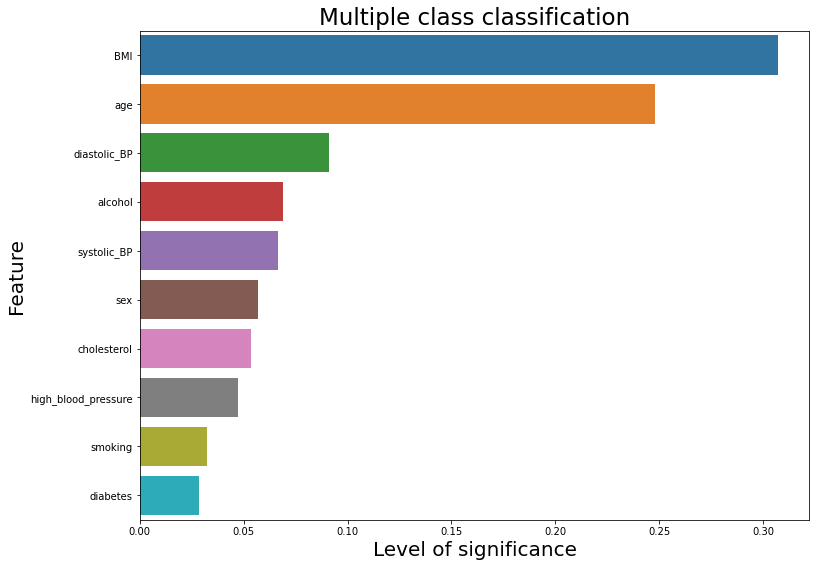

In [343]:
fig = plt.figure(figsize=(12,9))
sns.barplot(data = df_feat, x='ImportanceScore', y='Feature')


plt.title('Multiple class classification', fontsize = 23) # title with fontsize 23
plt.xlabel('Level of significance', fontsize = 20) # x-axis label with fontsize 20
plt.ylabel('Feature', fontsize = 20) # y-axis label with fontsize 20


## Random Forest (L)

### Random Forest Regressor (with the left plaque 2015 value)

In [344]:
X = df.loc[:, ['plaque_left_2015', 'age','BMI',  'systolic_BP', 'diastolic_BP', 'high_blood_pressure', 'cholesterol', 'alcohol', 'sex',  'smoking', 'diabetes']]
y = df.plaque_left_2018

In [345]:
X.shape, y.shape

((1175, 11), (1175,))

In [346]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [347]:
X_train.head()

plaque_left_2015 age        BMI  systolic_BP  diastolic_BP  \
481               4.3  77  21.258503          120            70   
733               3.9  81  26.218821          145            80   
558               3.4  73  24.968010          150            90   
908               3.7  83  28.719723          140            80   
624               2.7  77  35.555556          140            80   

     high_blood_pressure  cholesterol  alcohol  sex  smoking  diabetes  
481                    1            0        2    1        1         0  
733                    1            1        1    1        0         1  
558                    1            1        2    1        0         0  
908                    1            1        2    1        0         0  
624                    1            0        0    0        0         0

In [348]:
X_test.head()

plaque_left_2015 age        BMI  systolic_BP  diastolic_BP  \
15                 3.2  50  25.564954          130            80   
376                5.1  76  28.055706          135            80   
1029               2.5  73  25.216253          140            90   
117                3.1  44  23.082542          130            80   
317                4.8  86  23.665244          130            70   

      high_blood_pressure  cholesterol  alcohol  sex  smoking  diabetes  
15                      1            0        2    1        1         0  
376                     1            1        2    1        2         1  
1029                    1            1        0    1        0         0  
117                     1            0        2    1        0         0  
317                     1            0        0    1        0         0

In [349]:
alg = RandomForestRegressor()

In [350]:
alg.fit(X_train, y_train)

RandomForestRegressor()

In [351]:
y_pred = alg.predict(X_test)

In [352]:
compute_metrics_raw(y_true=y_test, y_pred=y_pred)

MAE       MSE  MAPE      SMAPE        R2       WAPE
0  0.395479  0.338202   inf  15.361963  0.786254  12.712021

<AxesSubplot:ylabel='plaque_left_2018'>

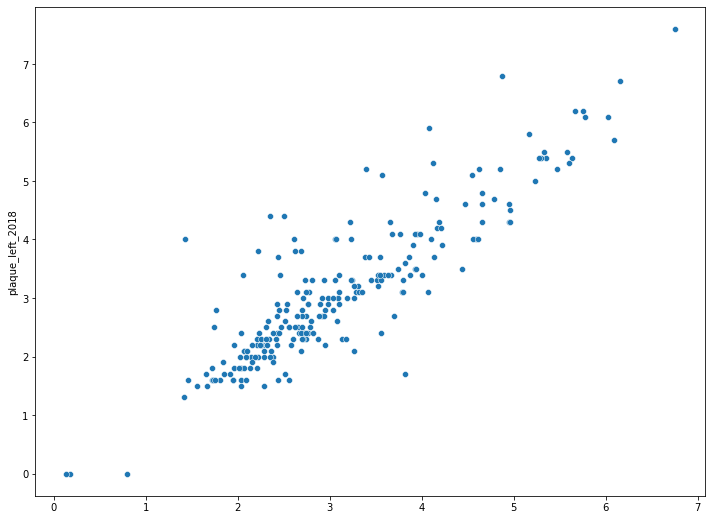

In [353]:
fig = plt.figure(figsize=(12,9))
sns.scatterplot(x=y_pred, y=y_test)

In [354]:
df_feat = pd.DataFrame({'Feature': X_train.columns, 'ImportanceScore': alg.feature_importances_}).sort_values(by='ImportanceScore', ascending=False)
df_feat.head(10)

Feature  ImportanceScore
0   plaque_left_2015         0.782563
2                BMI         0.071706
1                age         0.050499
3        systolic_BP         0.025999
7            alcohol         0.019073
4       diastolic_BP         0.017803
9            smoking         0.008598
6        cholesterol         0.007419
8                sex         0.006043
10          diabetes         0.005571

<AxesSubplot:ylabel='plaque_left_2018'>

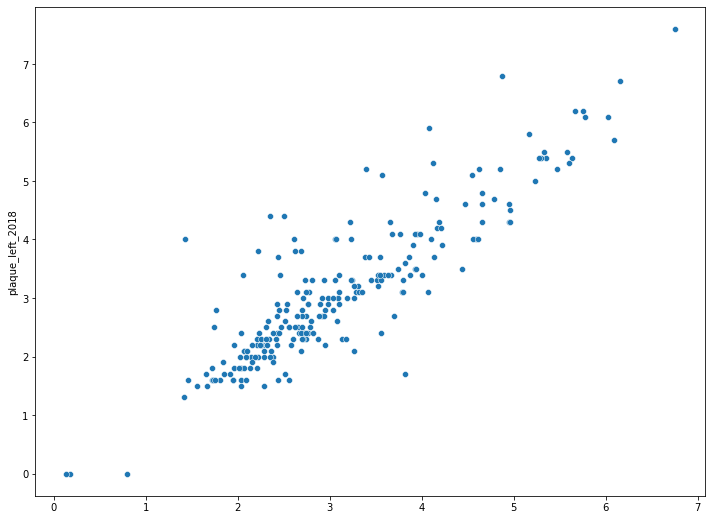

In [355]:
fig = plt.figure(figsize=(12,9))
sns.scatterplot(x=y_pred, y=y_test)

Text(0, 0.5, 'Feature')

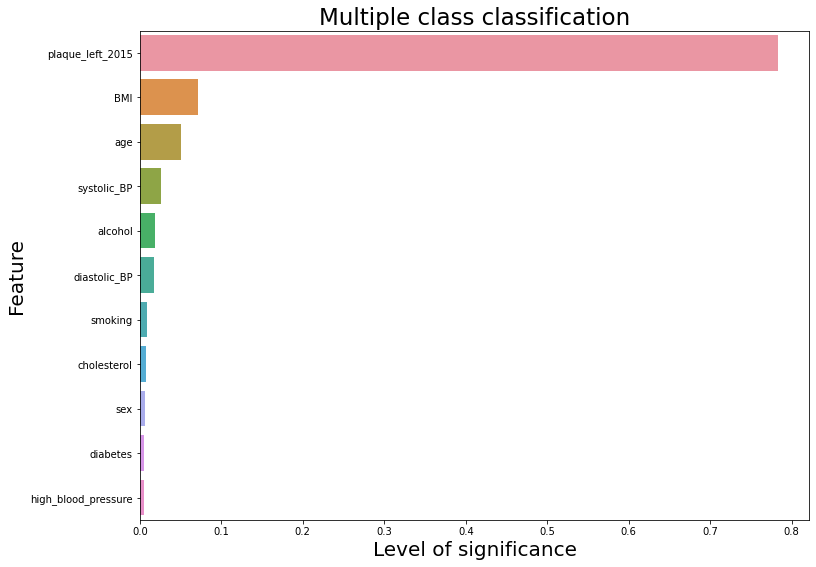

In [356]:
fig = plt.figure(figsize=(12,9))
sns.barplot(data = df_feat, x='ImportanceScore', y='Feature')


plt.title('Multiple class classification', fontsize = 23) # title with fontsize 23
plt.xlabel('Level of significance', fontsize = 20) # x-axis label with fontsize 20
plt.ylabel('Feature', fontsize = 20) # y-axis label with fontsize 20

### Random Forest Regressor (without the left plaque 2015 value)

In [357]:
X = df.loc[:, ['age','BMI',  'systolic_BP', 'diastolic_BP', 'high_blood_pressure', 'cholesterol', 'alcohol', 'sex',  'smoking', 'diabetes']]
y = df.plaque_left_2018

In [358]:
X.shape, y.shape

((1175, 10), (1175,))

In [359]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [360]:
X_train.head()

age        BMI  systolic_BP  diastolic_BP  high_blood_pressure  \
416   64  24.141519          130            80                    0   
1111  66  20.549887          130            80                    1   
360   66  33.262141          179           107                    1   
659   69  30.443839          130            80                    1   
685   70  25.000000          140            70                    1   

      cholesterol  alcohol  sex  smoking  diabetes  
416             0        1    0        0         0  
1111            1        0    0        0         0  
360             1        0    0        2         1  
659             1        0    0        0         0  
685             1        0    0        0         0

In [361]:
X_test.head()

age        BMI  systolic_BP  diastolic_BP  high_blood_pressure  \
809  80  24.074074          140            80                    1   
718  62  26.573129          140            80                    1   
908  83  28.719723          140            80                    1   
1    60  31.833910          140            80                    1   
99   52  34.478096          130            70                    1   

     cholesterol  alcohol  sex  smoking  diabetes  
809            0        2    1        1         1  
718            1        1    0        1         0  
908            1        2    1        0         0  
1              0        1    1        0         0  
99             0        1    1        0         0

In [362]:
alg = RandomForestRegressor()

In [363]:
alg.fit(X_train, y_train)

RandomForestRegressor()

In [364]:
y_pred = alg.predict(X_test)

In [365]:
compute_metrics_raw(y_true=y_test, y_pred=y_pred)

MAE       MSE  MAPE      SMAPE        R2      WAPE
0  0.939568  1.348106   inf  30.562244  0.076751  30.08154

<AxesSubplot:ylabel='plaque_left_2018'>

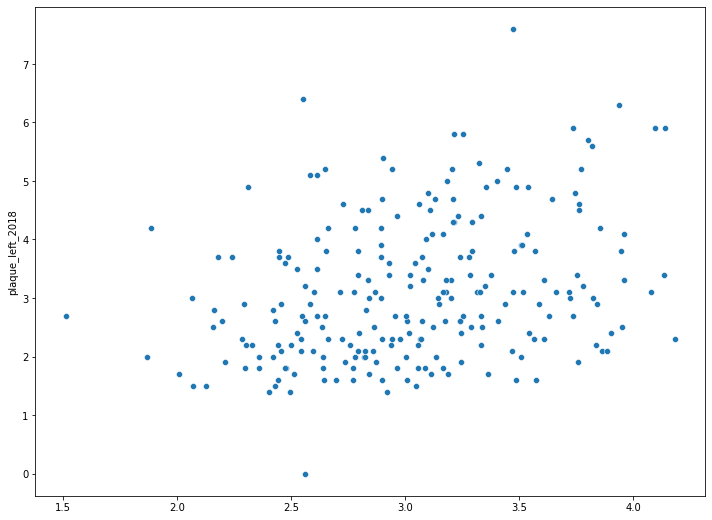

In [366]:
fig = plt.figure(figsize=(12,9))
sns.scatterplot(x=y_pred, y=y_test)

In [367]:
df_feat = pd.DataFrame({'Feature': X_train.columns, 'ImportanceScore': alg.feature_importances_}).sort_values(by='ImportanceScore', ascending=False)
df_feat.head(10)

Feature  ImportanceScore
1                  BMI         0.312508
0                  age         0.247615
2          systolic_BP         0.121727
3         diastolic_BP         0.081180
6              alcohol         0.065632
8              smoking         0.041064
7                  sex         0.039710
5          cholesterol         0.034568
9             diabetes         0.031242
4  high_blood_pressure         0.024754

Text(0, 0.5, 'Feature')

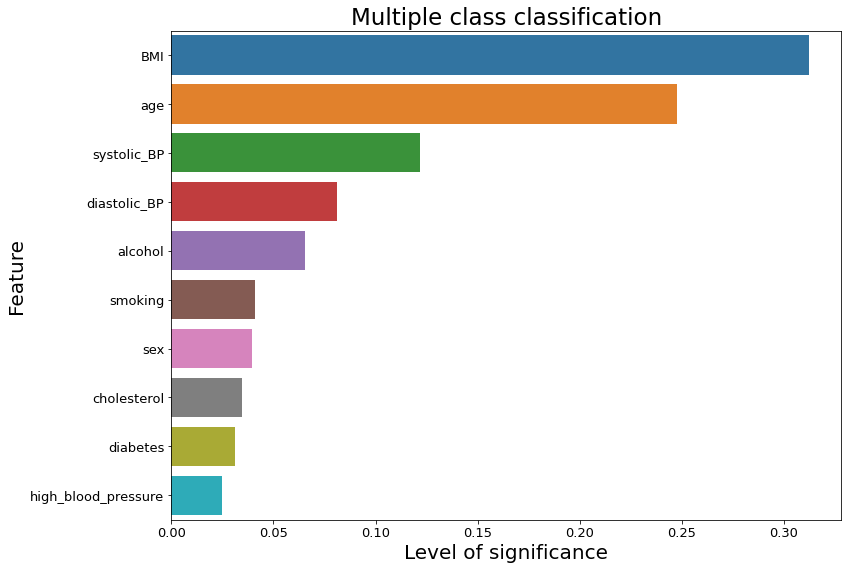

In [368]:
fig = plt.figure(figsize=(12,9))
sns.barplot(data = df_feat, x='ImportanceScore', y='Feature')


plt.title('Multiple class classification', fontsize = 23) # title with fontsize 23
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel('Level of significance', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('Feature', fontsize = 20) # y-axis label with fontsize 15

### Random Forest Classifier (with the left plaque 2015 value)
- 'Neutralni': 0
- 'Zhorseni': -1
- 'Zlepseni': 1

In [369]:
X = df.loc[:, ['plaque_left_2015', 'age','BMI',  'systolic_BP', 'diastolic_BP', 'high_blood_pressure', 'cholesterol', 'alcohol', 'sex',  'smoking', 'diabetes']]
y = df.state_num_L

In [370]:
X.shape, y.shape

((1175, 11), (1175,))

In [371]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [372]:
X_train.head()

plaque_left_2015 age        BMI  systolic_BP  diastolic_BP  \
798               1.6  45  26.037494          130            80   
676               2.2  57  35.379578          130            80   
884               3.7  68  28.228386          150            90   
434               1.5  57  31.217482          130            80   
338               3.2  62  30.486685          130            80   

     high_blood_pressure  cholesterol  alcohol  sex  smoking  diabetes  
798                    0            1        0    0        0         0  
676                    1            1        0    0        0         0  
884                    1            1        1    0        0         0  
434                    0            0        0    0        0         0  
338                    1            1        1    0        0         0

In [373]:
X_test.head()

plaque_left_2015 age        BMI  systolic_BP  diastolic_BP  \
959               6.0  83  28.400548          150            90   
529               1.8  65  25.510204          140            80   
296               2.1  67  31.179138          130            80   
157               2.3  61  22.839506          130            70   
225               2.7  71  27.084159          120            70   

     high_blood_pressure  cholesterol  alcohol  sex  smoking  diabetes  
959                    1            1        1    1        0         0  
529                    0            0        0    0        1         0  
296                    1            1        0    1        0         0  
157                    0            0        0    1        0         0  
225                    0            0        0    0        0         0

In [374]:
y_pred.shape

(235,)

In [375]:
alg = RandomForestClassifier()

In [376]:
alg.fit(X_train, y_train)

RandomForestClassifier()

In [377]:
y_pred = alg.predict(X_test)

In [378]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.5191489361702127

In [379]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[61, 45,  3],
       [52, 61,  0],
       [ 5,  8,  0]], dtype=int64)

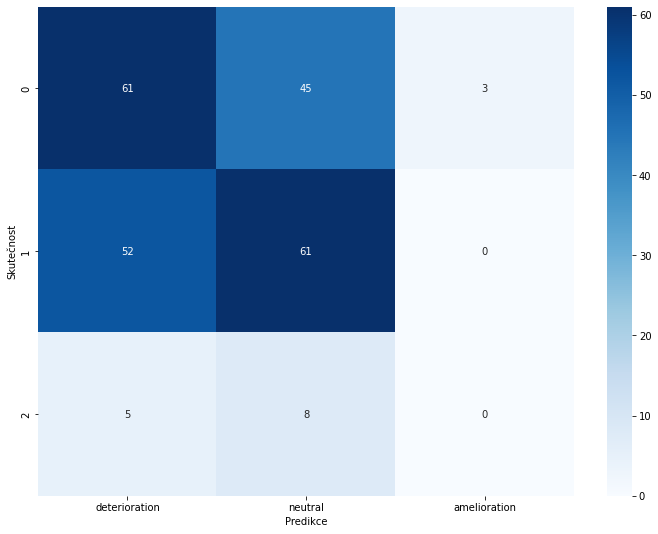

In [380]:
fig = plt.figure(figsize=(12,9))
ax = sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_pred), annot=True, cmap='Blues', fmt='g')
ax.set(xlabel='Predikce', ylabel='Skutečnost', xticklabels=('deterioration', 'neutral', 'amelioration'))
plt.show()

In [381]:
df_feat = pd.DataFrame({'Feature': X_train.columns, 'ImportanceScore': alg.feature_importances_}).sort_values(by='ImportanceScore', ascending=False)
df_feat.head(10)

Feature  ImportanceScore
2                BMI         0.229213
0   plaque_left_2015         0.210183
1                age         0.193756
3        systolic_BP         0.090874
4       diastolic_BP         0.075937
7            alcohol         0.058282
6        cholesterol         0.034837
9            smoking         0.029391
8                sex         0.028163
10          diabetes         0.027959

Text(0, 0.5, 'Feature')

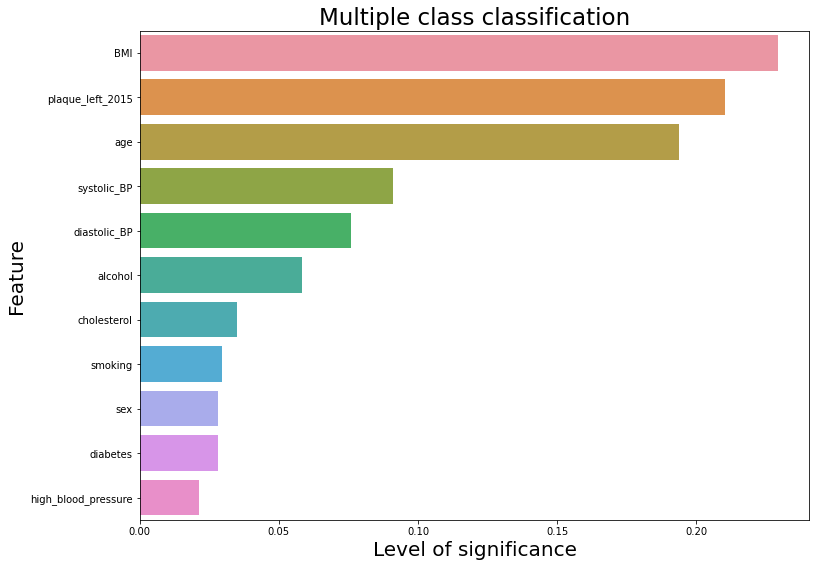

In [382]:
fig = plt.figure(figsize=(12,9))
sns.barplot(data = df_feat, x='ImportanceScore', y='Feature')


plt.title('Multiple class classification', fontsize = 23) # title with fontsize 23
plt.xlabel('Level of significance', fontsize = 20) # x-axis label with fontsize 20
plt.ylabel('Feature', fontsize = 20) # y-axis label with fontsize 20

### Random Forest Classifier (without the left plaque 2015 value)
- 'Neutralni': 0
- 'Zhorseni': -1
- 'Zlepseni': 1

In [383]:
X = df.loc[:, ['age','BMI',  'systolic_BP', 'diastolic_BP', 'high_blood_pressure', 'cholesterol', 'alcohol', 'sex',  'smoking', 'diabetes']]
y = df.state_num_L

In [384]:
X.shape, y.shape

((1175, 10), (1175,))

In [385]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [386]:
X_train.head()

age        BMI  systolic_BP  diastolic_BP  high_blood_pressure  \
211  44  30.491487          150           100                    1   
933  72  34.516765          130            80                    1   
922  74  32.888889          130            80                    1   
846  68  27.141582          110            60                    1   
96   52  23.140496          130            80                    0   

     cholesterol  alcohol  sex  smoking  diabetes  
211            0        2    1        0         0  
933            1        0    0        0         0  
922            1        0    0        0         1  
846            1        1    0        0         0  
96             0        0    0        0         0

In [387]:
X_test.head()

age        BMI  systolic_BP  diastolic_BP  high_blood_pressure  \
499  64  31.248794          130            80                    1   
208  63  24.382716          135            90                    1   
612  72  26.026175          110            70                    1   
389  61  27.732300          130            80                    1   
413  63  28.808864          130            80                    1   

     cholesterol  alcohol  sex  smoking  diabetes  
499            1        1    0        0         0  
208            0        2    1        0         0  
612            1        1    0        0         0  
389            1        2    1        1         0  
413            1        2    1        0         0

In [388]:
alg = RandomForestClassifier()

In [389]:
alg.fit(X_train, y_train)

RandomForestClassifier()

In [390]:
y_pred = alg.predict(X_test)

In [391]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.4595744680851064

In [392]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[59, 51,  1],
       [54, 49,  0],
       [ 8, 13,  0]], dtype=int64)

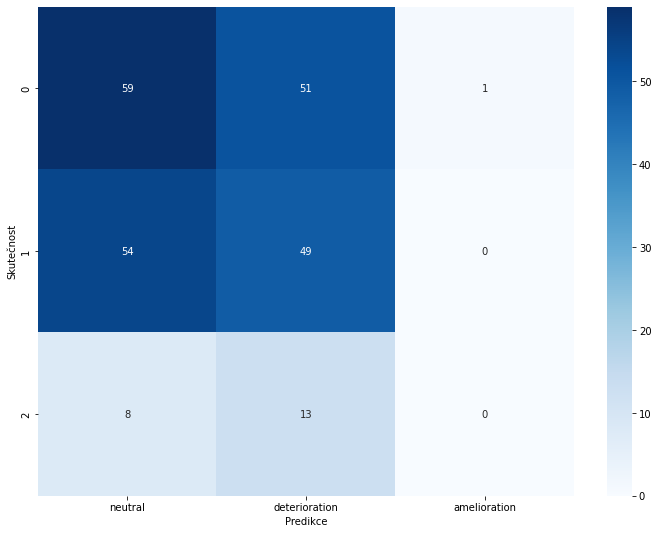

In [393]:
fig = plt.figure(figsize=(12,9))
ax = sns.heatmap(confusion_matrix(y_true=y_test, y_pred=y_pred), annot=True, cmap='Blues', fmt='g')
ax.set(xlabel='Predikce', ylabel='Skutečnost', xticklabels=('neutral', 'deterioration' , 'amelioration'))
plt.show()

In [394]:
df_feat = pd.DataFrame({'Feature': X_train.columns, 'ImportanceScore': alg.feature_importances_}).sort_values(by='ImportanceScore', ascending=False)
df_feat.head(10)

Feature  ImportanceScore
1                  BMI         0.321322
0                  age         0.250932
2          systolic_BP         0.110627
3         diastolic_BP         0.086113
6              alcohol         0.067396
7                  sex         0.034220
8              smoking         0.034197
5          cholesterol         0.033844
9             diabetes         0.032392
4  high_blood_pressure         0.028956

Text(0, 0.5, 'Feature')

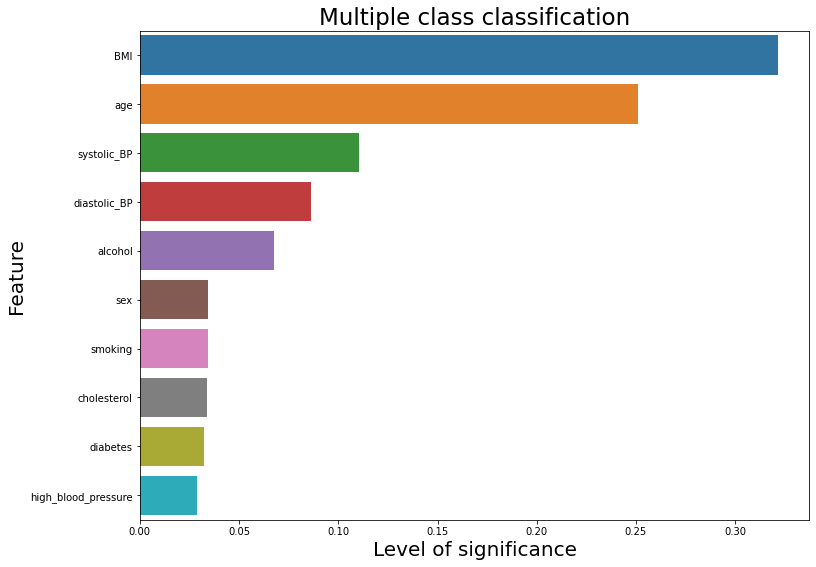

In [395]:
fig = plt.figure(figsize=(12,9))
sns.barplot(data = df_feat, x='ImportanceScore', y='Feature')


plt.title('Multiple class classification', fontsize = 23) # title with fontsize 23
plt.xlabel('Level of significance', fontsize = 20) # x-axis label with fontsize 20
plt.ylabel('Feature', fontsize = 20) # y-axis label with fontsize 20

## Gradient Boosting Regressor (L)

### Gradient Boosting Regressor (with the left plaque 2015 value)

In [396]:
X = df.loc[:, ['plaque_left_2015', 'age','BMI',  'systolic_BP', 'diastolic_BP', 'high_blood_pressure', 'cholesterol', 'alcohol', 'sex',  'smoking', 'diabetes']]
y = df.plaque_left_2018

In [397]:
X.shape, y.shape

((1175, 11), (1175,))

In [398]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [399]:
X_train.head()

plaque_left_2015 age        BMI  systolic_BP  diastolic_BP  \
808                1.5  51  30.350330          140            90   
404                2.1  71  31.217482          130            80   
385                3.6  76  30.421850          130            80   
659                2.2  69  30.443839          130            80   
1122               1.7  76  28.344671          110            80   

      high_blood_pressure  cholesterol  alcohol  sex  smoking  diabetes  
808                     1            1        3    1        1         0  
404                     1            0        0    0        0         1  
385                     1            1        1    1        2         0  
659                     1            1        0    0        0         0  
1122                    1            1        1    0        0         0

In [400]:
X_test.head()

plaque_left_2015 age        BMI  systolic_BP  diastolic_BP  \
616               2.4  67  33.632653          130            80   
789               3.6  69  21.077195          150            90   
511               2.4  50  36.429872          130            80   
551               2.8  73  24.092971          130            70   
742               5.7  76  35.430839           90            50   

     high_blood_pressure  cholesterol  alcohol  sex  smoking  diabetes  
616                    1            1        2    1        0         1  
789                    1            1        2    0        0         0  
511                    1            0        2    1        2         0  
551                    0            0        1    0        0         0  
742                    1            0        0    1        0         0

In [401]:
alg = ExtraTreesRegressor()

In [402]:
alg.fit(X_train, y_train)

ExtraTreesRegressor()

In [403]:
y_pred = alg.predict(X_test)

In [404]:
compute_metrics_raw(y_true=y_test, y_pred=y_pred)

MAE       MSE      MAPE      SMAPE        R2      WAPE
0  0.441604  0.458725  15.07418  13.921562  0.688814  14.06955

<AxesSubplot:ylabel='plaque_left_2018'>

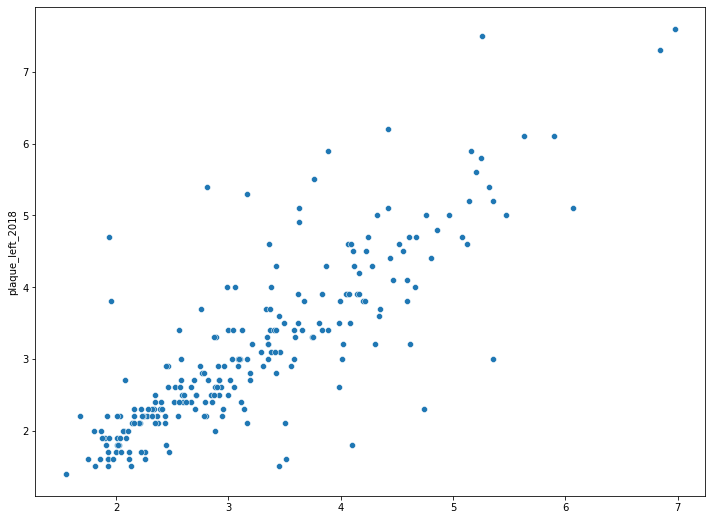

In [405]:
fig = plt.figure(figsize=(12,9))
sns.scatterplot(x=y_pred, y=y_test)

In [406]:
df_feat = pd.DataFrame({'Feature': X_train.columns, 'ImportanceScore': alg.feature_importances_}).sort_values(by='ImportanceScore', ascending=False)
df_feat.head(10)

Feature  ImportanceScore
0   plaque_left_2015         0.776654
2                BMI         0.036014
1                age         0.035810
3        systolic_BP         0.030339
4       diastolic_BP         0.026560
7            alcohol         0.024513
8                sex         0.017896
9            smoking         0.016614
6        cholesterol         0.014053
10          diabetes         0.011365

<AxesSubplot:ylabel='plaque_left_2018'>

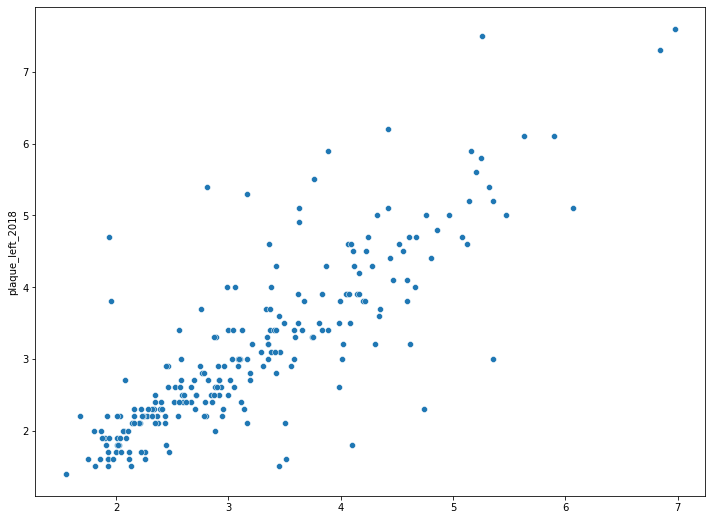

In [407]:
fig = plt.figure(figsize=(12,9))
sns.scatterplot(x=y_pred, y=y_test)

Text(0, 0.5, 'Feature')

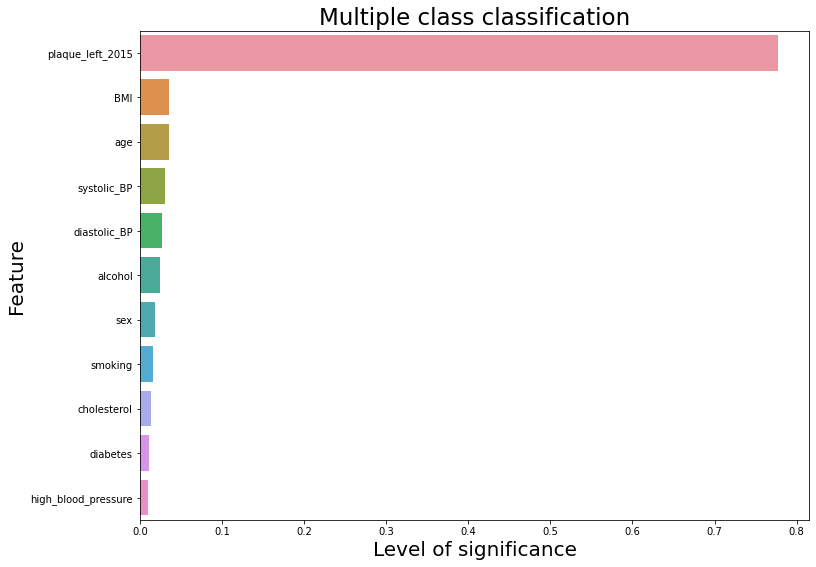

In [408]:
fig = plt.figure(figsize=(12,9))
sns.barplot(data = df_feat, x='ImportanceScore', y='Feature')


plt.title('Multiple class classification', fontsize = 23) # title with fontsize 23
plt.xlabel('Level of significance', fontsize = 20) # x-axis label with fontsize 20
plt.ylabel('Feature', fontsize = 20) # y-axis label with fontsize 20

### Gradient Boosting Regressor (without the left plaque 2015 value)

In [409]:
X = df.loc[:, ['age','BMI',  'systolic_BP', 'diastolic_BP', 'high_blood_pressure', 'cholesterol', 'alcohol', 'sex',  'smoking', 'diabetes']]
y = df.plaque_left_2018

In [410]:
X.shape, y.shape

((1175, 10), (1175,))

In [411]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [412]:
X_train.head()

age        BMI  systolic_BP  diastolic_BP  high_blood_pressure  \
571   72  25.826446          140            80                    1   
1003  72  24.167162          130            75                    1   
884   68  28.228386          150            90                    1   
45    76  25.236340          153            70                    1   
241   70  26.838648          120            70                    1   

      cholesterol  alcohol  sex  smoking  diabetes  
571             0        1    1        0         0  
1003            1        1    1        0         0  
884             1        1    0        0         0  
45              1        0    0        0         1  
241             0        1    0        0         0

In [413]:
X_test.head()

age        BMI  systolic_BP  diastolic_BP  high_blood_pressure  \
393  83  22.071078          150            80                    1   
887  68  23.374726          130            80                    1   
358  78  23.888441          160            90                    1   
683  58  32.490548          140            80                    1   
670  71  32.449973          130            80                    1   

     cholesterol  alcohol  sex  smoking  diabetes  
393            1        0    0        0         0  
887            0        2    1        0         0  
358            0        0    1        0         0  
683            1        0    1        0         1  
670            1        0    1        0         1

In [414]:
alg = ExtraTreesRegressor()

In [415]:
alg.fit(X_train, y_train)

ExtraTreesRegressor()

In [416]:
y_pred = alg.predict(X_test)

In [417]:
compute_metrics_raw(y_true=y_test, y_pred=y_pred)

MAE       MSE  MAPE      SMAPE        R2      WAPE
0  0.988687  1.629057   inf  32.438263 -0.233514  33.21062

<AxesSubplot:ylabel='plaque_left_2018'>

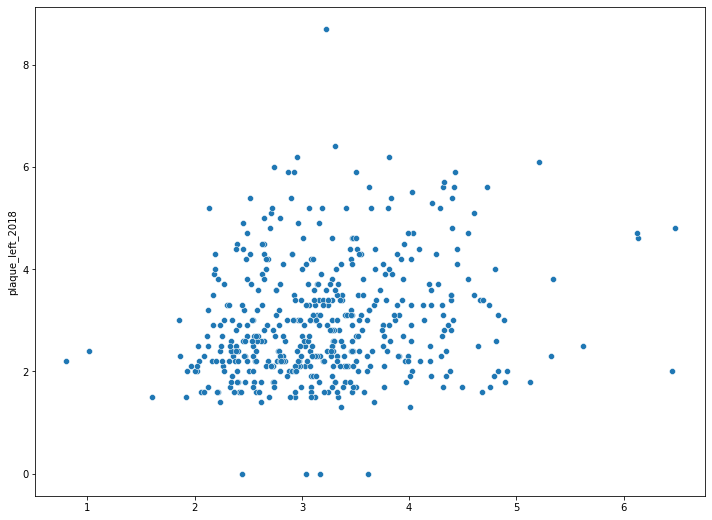

In [418]:
fig = plt.figure(figsize=(12,9))
sns.scatterplot(x=y_pred, y=y_test)

In [419]:
df_feat = pd.DataFrame({'Feature': X_train.columns, 'ImportanceScore': alg.feature_importances_}).sort_values(by='ImportanceScore', ascending=False)
df_feat.head(10)

Feature  ImportanceScore
0                  age         0.235131
1                  BMI         0.198467
2          systolic_BP         0.135276
3         diastolic_BP         0.105197
6              alcohol         0.086891
8              smoking         0.060367
5          cholesterol         0.048839
7                  sex         0.048725
9             diabetes         0.047434
4  high_blood_pressure         0.033673

<AxesSubplot:ylabel='plaque_left_2018'>

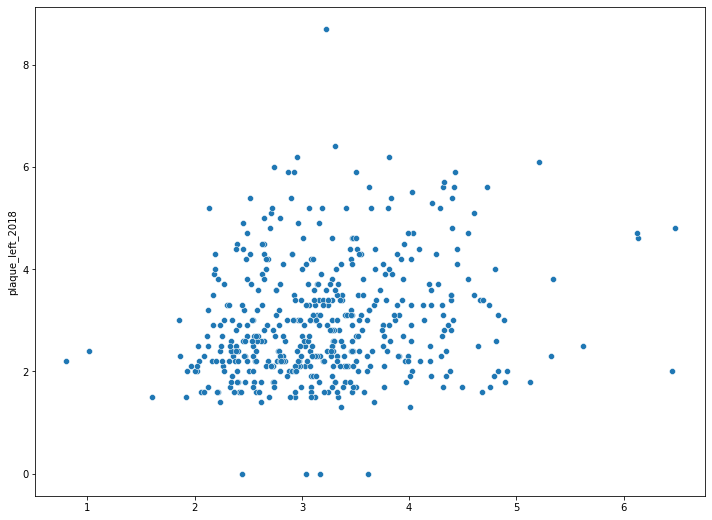

In [420]:
fig = plt.figure(figsize=(12,9))
sns.scatterplot(x=y_pred, y=y_test)

Text(0, 0.5, 'Feature')

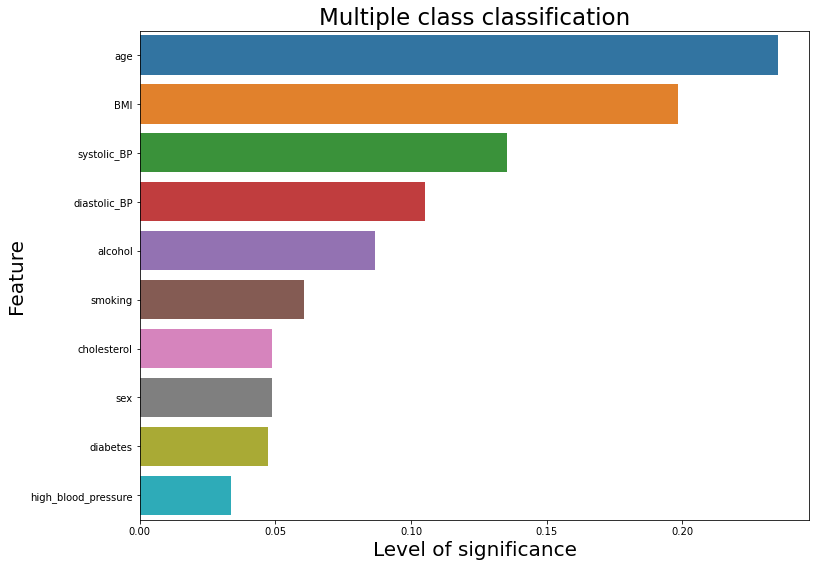

In [421]:
fig = plt.figure(figsize=(12,9))
sns.barplot(data = df_feat, x='ImportanceScore', y='Feature')


plt.title('Multiple class classification', fontsize = 23) # title with fontsize 23
plt.xlabel('Level of significance', fontsize = 20) # x-axis label with fontsize 20
plt.ylabel('Feature', fontsize = 20) # y-axis label with fontsize 20

## Decision Tree (R)

### Decision Tree Regressor (s hodnotou 2015)

In [422]:
X = df.loc[:, ['plaque_right_2015', 'age','BMI',  'systolic_BP', 'diastolic_BP', 'high_blood_pressure', 'cholesterol', 'alcohol', 'sex',  'smoking', 'diabetes']]
y = df.plaque_right_2018

In [423]:
X.shape, y.shape

((1175, 11), (1175,))

In [424]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [425]:
X_train.head()

plaque_right_2015 age        BMI  systolic_BP  diastolic_BP  \
1110                4.9  60  31.179138          120            80   
344                 2.9  72  33.078285          130            85   
1036                1.7  73  27.084159          125            75   
27                  1.6  52  33.659297          130            80   
124                 2.1  58  34.517881          110            70   

      high_blood_pressure  cholesterol  alcohol  sex  smoking  diabetes  
1110                    1            1        1    0        0         0  
344                     1            1        1    1        0         0  
1036                    0            1        1    1        0         0  
27                      0            0        1    0        0         0  
124                     1            1        1    1        0         1

In [426]:
X_test.head()

plaque_right_2015 age        BMI  systolic_BP  diastolic_BP  \
827                 1.6  75  37.113546          130           100   
588                 2.2  73  33.057851          140            80   
897                 2.6  67  39.350334          130            80   
289                 3.9  75  27.041644          130            80   
1044                5.3  69  33.251550          110            70   

      high_blood_pressure  cholesterol  alcohol  sex  smoking  diabetes  
827                     1            0        0    0        0         0  
588                     1            0        1    0        0         1  
897                     0            1        0    0        1         1  
289                     0            0        1    0        1         0  
1044                    1            1        1    1        0         1

In [427]:
alg = DecisionTreeRegressor()

In [428]:
alg.fit(X_train, y_train)

DecisionTreeRegressor()

In [429]:
y_pred = alg.predict(X_test)

In [430]:
compute_metrics_raw(y_true=y_test, y_pred=y_pred)

MAE       MSE       MAPE      SMAPE       R2       WAPE
0  0.565532  0.811617  19.266519  18.496043  0.51113  17.795929

<AxesSubplot:ylabel='plaque_right_2018'>

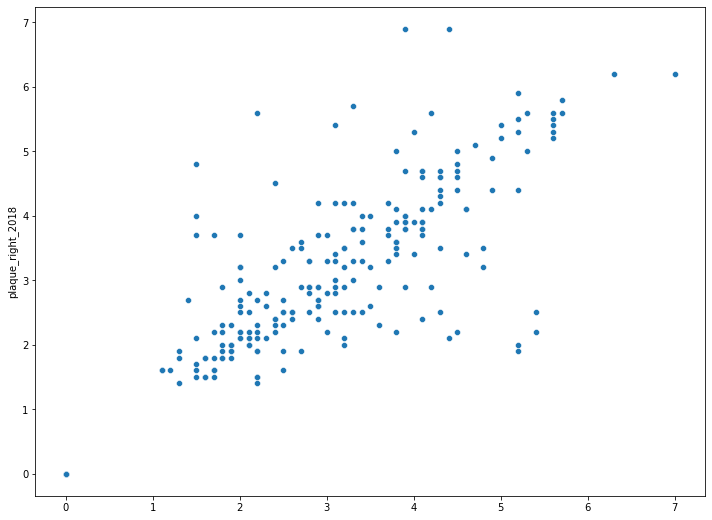

In [431]:
fig = plt.figure(figsize=(12,9))
sns.scatterplot(x=y_pred, y=y_test)

In [432]:
df_feat = pd.DataFrame({'Feature': X_train.columns, 'ImportanceScore': alg.feature_importances_}).sort_values(by='ImportanceScore', ascending=False)
df_feat.head(10)

Feature  ImportanceScore
0    plaque_right_2015         0.765006
2                  BMI         0.078976
1                  age         0.054653
4         diastolic_BP         0.030109
3          systolic_BP         0.020692
7              alcohol         0.015092
8                  sex         0.009128
5  high_blood_pressure         0.008458
6          cholesterol         0.008094
9              smoking         0.004900

<AxesSubplot:ylabel='plaque_right_2018'>

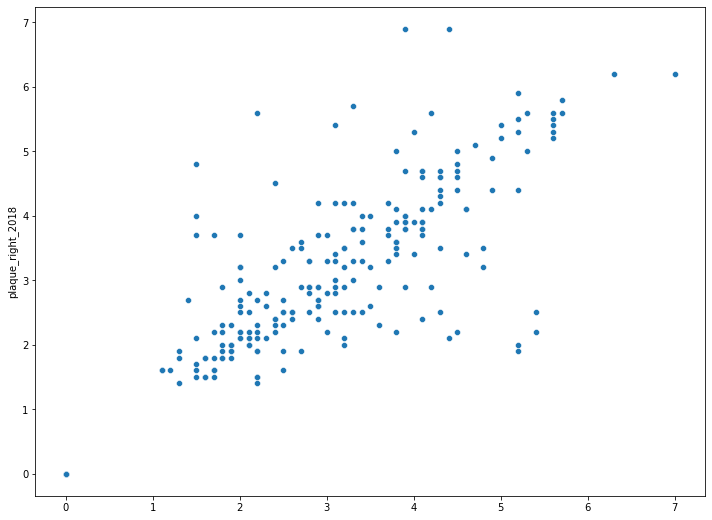

In [433]:
fig = plt.figure(figsize=(12,9))
sns.scatterplot(x=y_pred, y=y_test)

Text(0, 0.5, 'Feature')

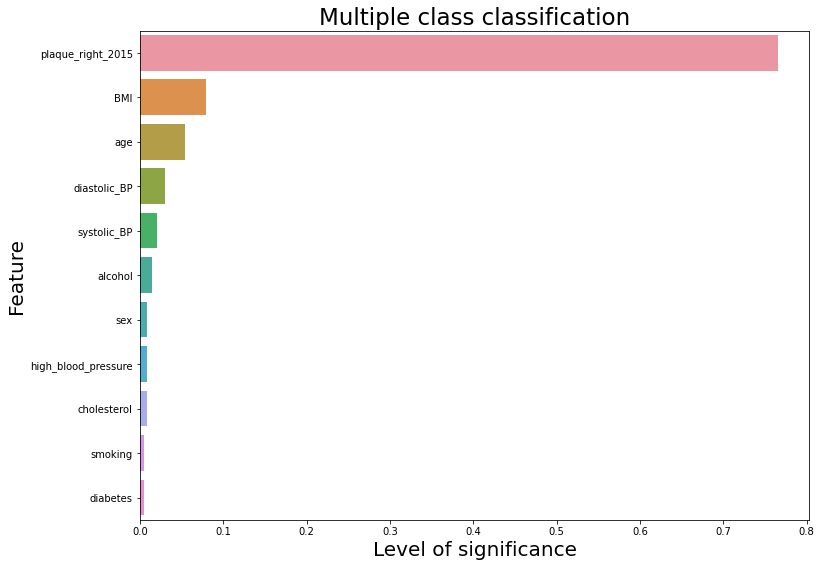

In [434]:
fig = plt.figure(figsize=(12,9))
sns.barplot(data = df_feat, x='ImportanceScore', y='Feature')


plt.title('Multiple class classification', fontsize = 23) # title with fontsize 23
plt.xlabel('Level of significance', fontsize = 20) # x-axis label with fontsize 20
plt.ylabel('Feature', fontsize = 20) # y-axis label with fontsize 20

### Decision Tree Regressor (without the right plaque 2015 value)

In [435]:
X = df.loc[:, ['age','BMI',  'systolic_BP', 'diastolic_BP', 'high_blood_pressure', 'cholesterol', 'alcohol', 'sex',  'smoking', 'diabetes']]
y = df.plaque_right_2018

In [436]:
X.shape, y.shape

((1175, 10), (1175,))

In [437]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [438]:
X_train.head()

age        BMI  systolic_BP  diastolic_BP  high_blood_pressure  \
1173  75  30.078125          130            80                    1   
375   63  22.471209          140            80                    1   
797   67  28.719723          130            80                    1   
1157  68  31.861629          130            80                    1   
922   74  32.888889          130            80                    1   

      cholesterol  alcohol  sex  smoking  diabetes  
1173            0        0    0        0         1  
375             0        1    1        0         0  
797             1        3    1        2         0  
1157            1        0    0        0         0  
922             1        0    0        0         1

In [439]:
X_test.head()

age        BMI  systolic_BP  diastolic_BP  high_blood_pressure  \
842  71  28.194284          140            80                    1   
516  71  27.513385          130            80                    1   
859  73  37.325689          130            80                    1   
310  66  24.622961          130            80                    0   
680  62  31.250000          136            90                    1   

     cholesterol  alcohol  sex  smoking  diabetes  
842            0        0    0        0         0  
516            0        1    0        0         0  
859            0        1    1        0         1  
310            0        0    0        0         0  
680            1        1    0        0         0

In [440]:
alg = DecisionTreeRegressor()

In [441]:
alg.fit(X_train, y_train)

DecisionTreeRegressor()

In [442]:
y_pred = alg.predict(X_test)

In [443]:
compute_metrics_raw(y_true=y_test, y_pred=y_pred)

MAE       MSE  MAPE      SMAPE        R2       WAPE
0  1.271489  2.675319   inf  45.237801 -0.751786  42.875592

<AxesSubplot:ylabel='plaque_right_2018'>

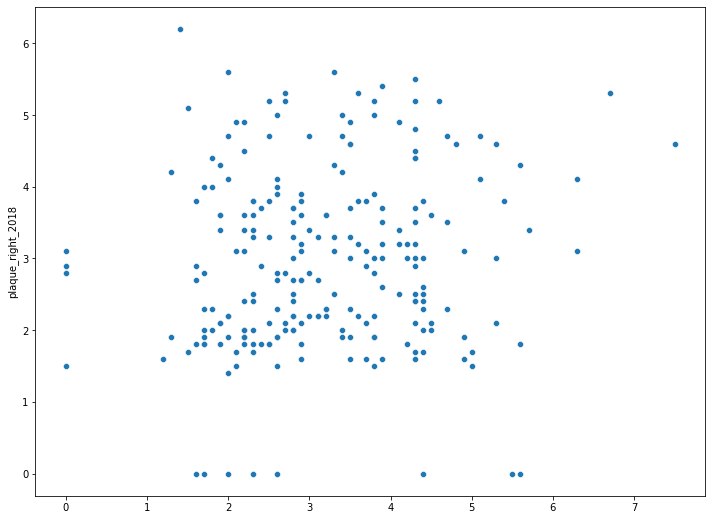

In [444]:
fig = plt.figure(figsize=(12,9))
sns.scatterplot(x=y_pred, y=y_test)

In [445]:
df_feat = pd.DataFrame({'Feature': X_train.columns, 'ImportanceScore': alg.feature_importances_}).sort_values(by='ImportanceScore', ascending=False)
df_feat.head(10)

Feature  ImportanceScore
1                  BMI         0.358072
0                  age         0.234698
2          systolic_BP         0.118954
3         diastolic_BP         0.064107
6              alcohol         0.063135
7                  sex         0.039024
5          cholesterol         0.036793
9             diabetes         0.032494
8              smoking         0.031394
4  high_blood_pressure         0.021329

Text(0, 0.5, 'Feature')

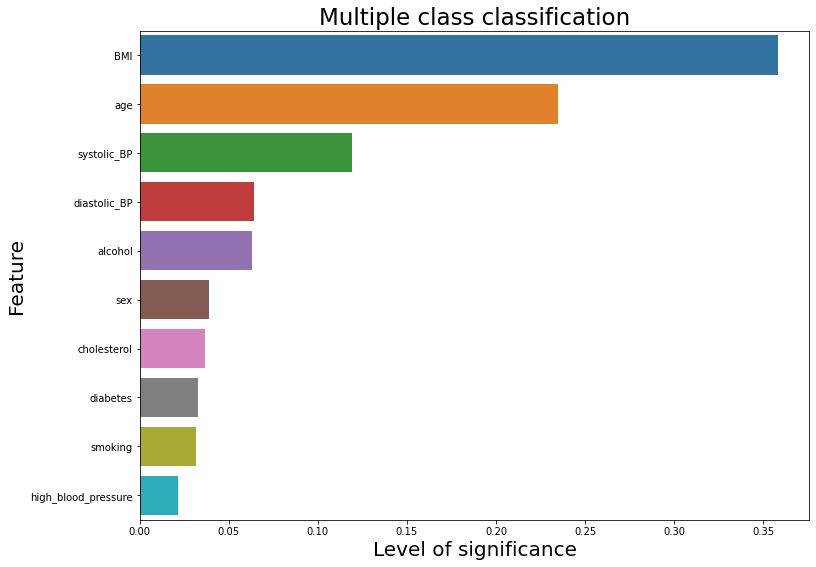

In [446]:
fig = plt.figure(figsize=(12,9))
sns.barplot(data = df_feat, x='ImportanceScore', y='Feature')


plt.title('Multiple class classification', fontsize = 23) # title with fontsize 23
plt.xlabel('Level of significance', fontsize = 20) # x-axis label with fontsize 20
plt.ylabel('Feature', fontsize = 20) # y-axis label with fontsize 20